# データセットの作成

## Settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import math
from pprint import pprint
plt.rcParams['font.family'] = 'Hiragino Maru Gothic Pro'
import random

In [2]:
# JCT token setting
jct_tokenId = '0x4a43540000000000000000000000000000000000000000000000000000000000'
jct_price = 1.0e+5

In [3]:
# Relative path to save data
from pathlib import Path

data_dir = Path('../data/data202303')
data_dir.mkdir(parents=True, exist_ok=True)
data_relative_path = '../data/data202303/'

## Sample csv format

In [4]:
sample_create_token_df = pd.read_csv('../data/sample/csv/createToken_decode.csv')
sample_create_token_df

,tokenId,tokenName,price,tokenTypeId,updateTime
0,0x20221110132152000000000000000000000000000000...,ST00001,10000000,0x30783030303031000000000000000000000000000000...,1668054112
1,0x20221110132152000000000000000000000000000000...,ST00002,10000000,0x30783030303031000000000000000000000000000000...,1668054112
2,0x20221110132152000000000000000000000000000000...,ST00003,10000000,0x30783030303031000000000000000000000000000000...,1668054112
3,0x20221110132152000000000000000000000000000000...,ST00004,10000000,0x30783030303031000000000000000000000000000000...,1668054112
4,0x20221110132152000000000000000000000000000000...,ST00005,10000000,0x30783030303031000000000000000000000000000000...,1668054112
...,...,...,...,...,...
351,0x20221110132152000000000000000000000000000000...,ST00352,10000000,0x30783030303031000000000000000000000000000000...,1668054112
352,0x20221110132152000000000000000000000000000000...,ST00353,10000000,0x30783030303031000000000000000000000000000000...,1668054112
353,0x20221110132152000000000000000000000000000000...,ST00354,10000000,0x30783030303031000000000000000000000000000000...,1668054112
354,0x20221110132152000000000000000000000000000000...,ST00355,10000000,0x30783030303031000000000000000000000000000000...,1668054112


In [5]:
sample_create_trading_df = pd.read_csv('../data/sample/csv/createTrading_decode.csv')
sample_create_trading_df

,tradingId,lender,borrowerTokenIds,lenderTokenIds,borrowerTokenAmounts,lenderTokenAmounts,startTime,finishTime,rate,adjustmentToken
0,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
1,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
2,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
3,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
4,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
...,...,...,...,...,...,...,...,...,...,...
8662,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
8663,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
8664,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
8665,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...


In [6]:
sample_update_token_df = pd.read_csv('../data/sample/csv/updateToken_decode.csv')
sample_update_token_df

,tokenId,price,updateTime
0,0x20221110132152000000000000000000000000000000...,9000000,1668054263
1,0x20221110132152000000000000000000000000000000...,9000000,1668054263
2,0x20221110132152000000000000000000000000000000...,9000000,1668054263
3,0x20221110132152000000000000000000000000000000...,9000000,1668054263
4,0x20221110132152000000000000000000000000000000...,9000000,1668054263
...,...,...,...
351,0x20221110132152000000000000000000000000000000...,9000000,1668054263
352,0x20221110132152000000000000000000000000000000...,9000000,1668054263
353,0x20221110132152000000000000000000000000000000...,9000000,1668054263
354,0x20221110132152000000000000000000000000000000...,9000000,1668054263


## Mock data distributions

### Number of Trade

In [7]:
ave_gc_trade_num = 438
ave_sc_trade_num = 2833
ave_bond_trade_num = 8667

stock_trade_term_list = [1, 5, 19, 60, 180, 2]
bond_trade_term_list = [1, 5, 19, 60, 180]
stock_trade_term_percent_list = [0.24, 0.38, 0.07, 0.02, 0.05, 0.24]
bond_trade_term_percent_list = [0.37, 0.15, 0.29, 0.16, 0.04]

max_gc_trade_num = math.ceil(np.dot(np.array(stock_trade_term_list), np.array(stock_trade_term_percent_list)) * ave_gc_trade_num)
max_sc_trade_num = math.ceil(np.dot(np.array(stock_trade_term_list), np.array(stock_trade_term_percent_list)) * ave_sc_trade_num)
max_bond_trade_num = math.ceil(np.dot(np.array(bond_trade_term_list), np.array(bond_trade_term_percent_list)) * ave_bond_trade_num)
print('max gc num: ', max_gc_trade_num)
print('max sc num: ', max_sc_trade_num)
print('max bond num: ', max_bond_trade_num)

max gc num:  6198
max sc num:  40087
max bond num:  203068


In [8]:
np.array([1758, 5020]) * 0.075

array([131.85, 376.5 ])

In [9]:
a_trade_num = 8667 + 3271

b_trade_nums = {
    '100%': {
        'gc': 6198,
        'sc': 40087,
        'bond': 203068,
    },
    '150%': {
        'gc': 9297,
        'sc': 60131,
        'bond': 304602,
    },
    '50%': {
        'gc': 3099,
        'sc': 20044,
        'bond': 101534,
    },
    '30%': {
        'gc': 1860,
        'sc': 12027,
        'bond': 60921,
    },
    '25%': {
        'gc': 1550,
        'sc': 10022,
        'bond': 50767,
    },
    '15%': {
        'gc': 928,
        'sc': 6014,
        'bond': 30461,
    },
    '7.5%': {
        'gc': 465,
        'sc': 3007,
        'bond': 15231,
    },
}

b_security_nums = {
    '100%': {
        'stock': 1758,
        'bond': 5020,
    },
    '150%': {
        'stock': 2637,
        'bond': 7530,
    },
    '50%': {
        'stock': 879,
        'bond': 2510,
    },
    '30%': {
        'stock': 528,
        'bond': 1506,
    },
    '25%': {
        'stock': 440,
        'bond': 1255,
    },
    '15%': {
        'stock': 264,
        'bond': 753,
    },
    '7.5%': {
        'stock': 132,
        'bond': 377,
    },
}

In [10]:
for key, value in b_security_nums.items():
    print(key, value)

100% {'stock': 1758, 'bond': 5020}
150% {'stock': 2637, 'bond': 7530}
50% {'stock': 879, 'bond': 2510}
30% {'stock': 528, 'bond': 1506}
25% {'stock': 440, 'bond': 1255}
15% {'stock': 264, 'bond': 753}
7.5% {'stock': 132, 'bond': 377}


### Price

In [11]:
# price_df を格納するobjの初期化
all_price_dfs = {
    '100%': {},
    '150%': {},
    '50%': {},
    '30%': {},
    '25%': {},
    '15%': {},
    '7.5%': {},
}

#### 株レポGC取引

株レポGC取引: 
             10億円以内         10億円超        100億円超        500億円超
ratio  1.500000e-01  6.000000e-01  2.000000e-01  5.000000e-02
min    1.000000e+08  1.000000e+09  1.000000e+10  5.000000e+10
max    1.000000e+09  1.000000e+10  5.000000e+10  1.000000e+11


<AxesSubplot:title={'center':'株レポGC取引: 概観'}>

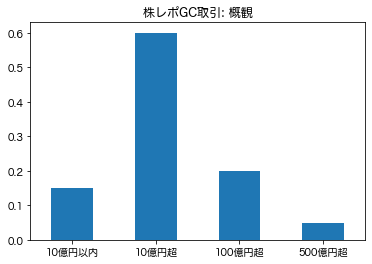

In [12]:
gc_price_column_labels = ['10億円以内', '10億円超', '100億円超', '500億円超']
gc_price_dist = pd.DataFrame([[0.15, 0.6, 0.2, 0.05], [1.0e+8, 1.0e+9, 1.0e+10, 5.0e+10], [1.0e+9, 1.0e+10, 5.0e+10, 1.0e+11]],
                             columns=gc_price_column_labels,
                             index=['ratio', 'min', 'max'])
gc_price_ave = 81.5e+8
print('株レポGC取引: ')
pprint(gc_price_dist)
print('='*50)

plt.title('株レポGC取引: 概観')
gc_price_dist.T['ratio'].plot(kind='bar', rot=0)

Text(0.5, 1.0, '株レポGC取引: ヒストグラム')

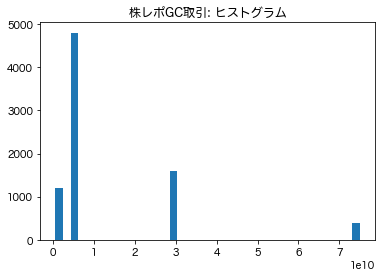

In [13]:
gc_trade_num = 8000
gc_ave_price_list = (gc_price_dist.T['min'] + gc_price_dist.T['max']) / 2
gc_sample = [[ave]*int(gc_price_dist.T['ratio'][index] * gc_trade_num)  for (index, ave) in enumerate(gc_ave_price_list)]

plt.hist(list(itertools.chain.from_iterable(gc_sample)), bins=40)
plt.title('株レポGC取引: ヒストグラム')

In [14]:
def get_gc_price_df(trade_num):
    gc_price_max = gc_price_dist['500億円超']['max']
    gc_price_min = gc_price_dist['10億円以内']['min']
    mock_gc_price_df = pd.DataFrame(np.random.triangular(gc_price_min, gc_price_ave, gc_price_max, trade_num)) * 1.0e+5
    mock_gc_price_df.hist(bins=100, figsize=(30, 20), xlabelsize=20, ylabelsize=20)
    plt.title(f'株レポGC取引: 擬似データ分布（三角分布, {trade_num}件）', fontsize=24)
    return mock_gc_price_df

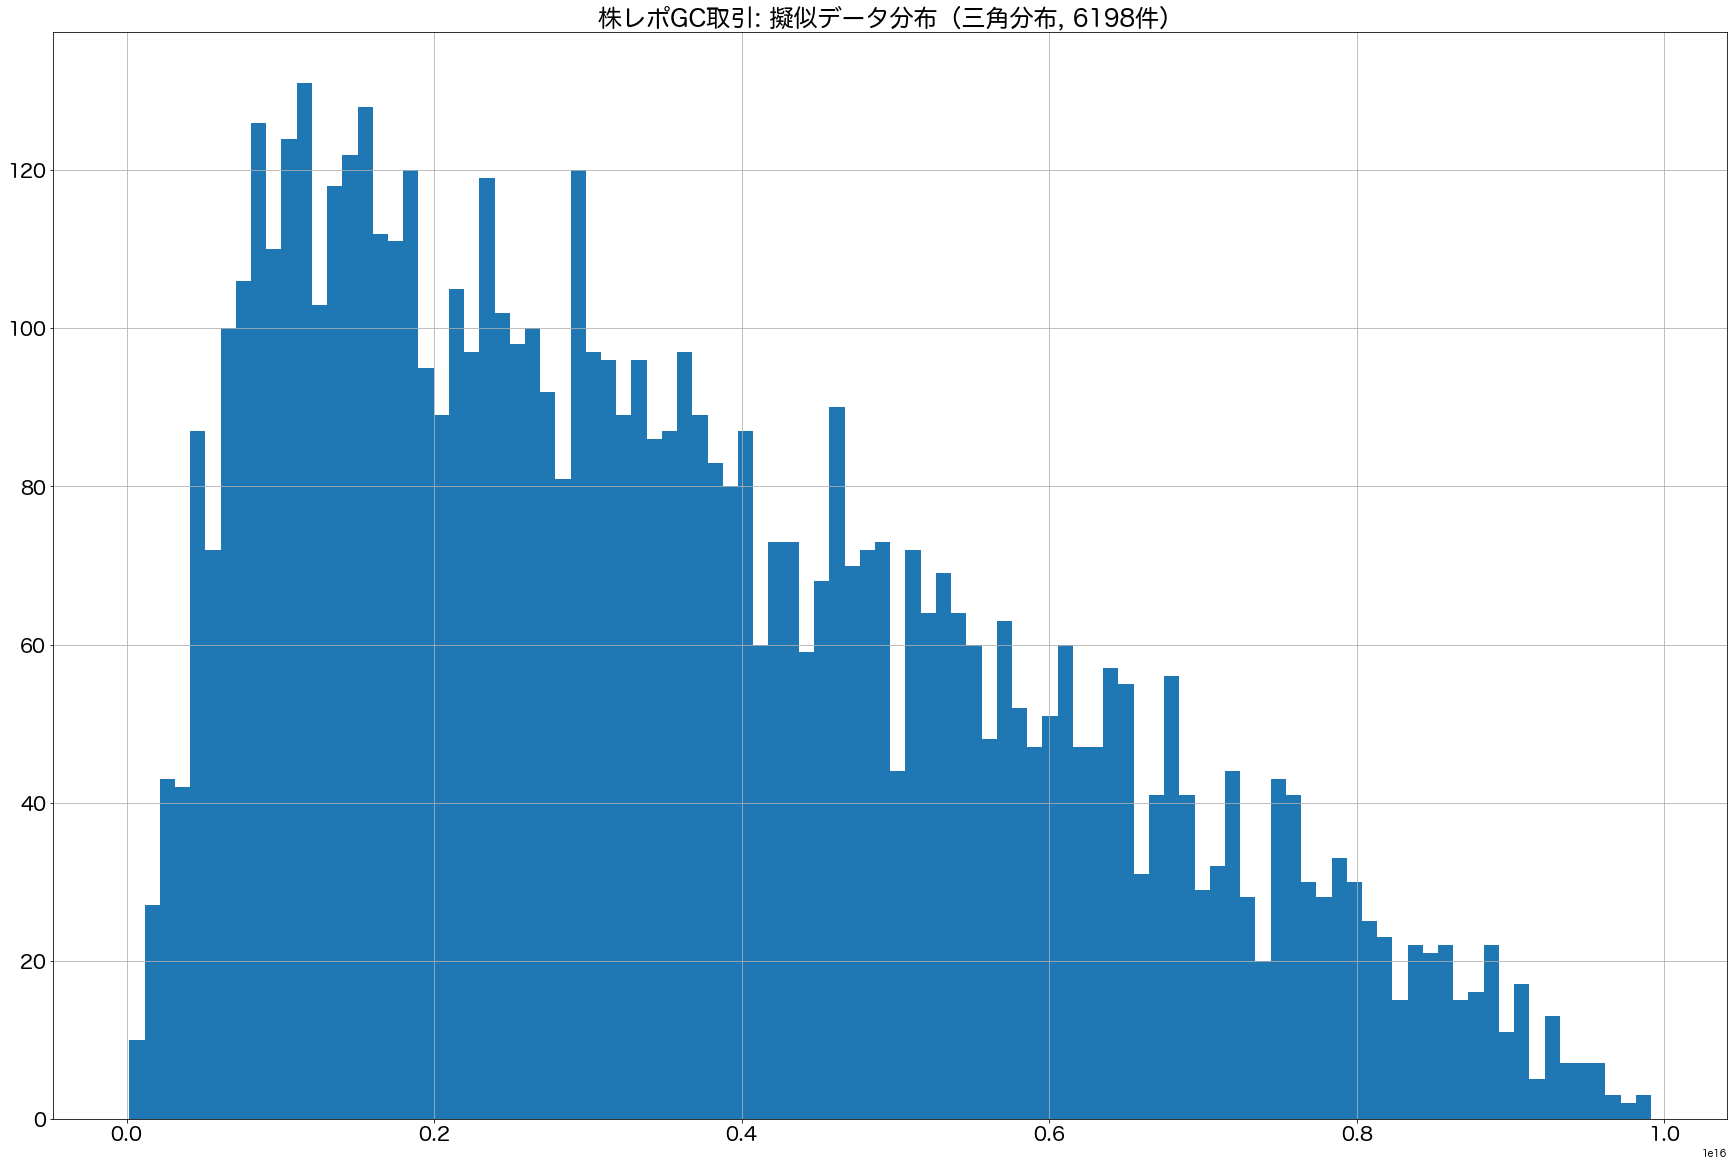

In [15]:
# 三角分布で類似分布を作成
# gc_price_max = gc_price_dist['500億円超']['max']
# gc_price_min = gc_price_dist['10億円以内']['min']
# mock_gc_price_df = pd.DataFrame(np.random.triangular(gc_price_min, gc_price_ave, gc_price_max, gc_trade_num)) * 1.0e+5
# mock_gc_price_df.hist(bins=100, figsize=(30, 20))
# plt.title('株レポGC取引: 擬似データ分布（三角分布）')
mock_gc_trade_8000_df = get_gc_price_df(b_trade_nums['100%']['gc'])

{'100%': {'gc':                  0
  0     8.580279e+15
  1     2.753331e+15
  2     1.667391e+15
  3     1.468086e+15
  4     6.751486e+15
  ...            ...
  6193  1.525629e+15
  6194  5.694848e+15
  6195  8.402993e+14
  6196  2.984510e+15
  6197  2.136864e+15
  
  [6198 rows x 1 columns]},
 '150%': {'gc':                  0
  0     4.794098e+15
  1     4.218252e+14
  2     2.926173e+15
  3     3.425974e+15
  4     3.989727e+15
  ...            ...
  9292  7.001704e+15
  9293  8.231549e+15
  9294  2.460526e+15
  9295  2.469943e+15
  9296  1.119668e+15
  
  [9297 rows x 1 columns]},
 '50%': {'gc':                  0
  0     4.399952e+15
  1     3.733597e+15
  2     8.104800e+14
  3     8.385980e+15
  4     2.983735e+15
  ...            ...
  3094  6.618158e+15
  3095  4.897868e+15
  3096  4.856848e+15
  3097  8.520987e+14
  3098  1.435920e+15
  
  [3099 rows x 1 columns]},
 '30%': {'gc':                  0
  0     2.532631e+15
  1     6.741055e+14
  2     4.296229e+14
  3     3.976

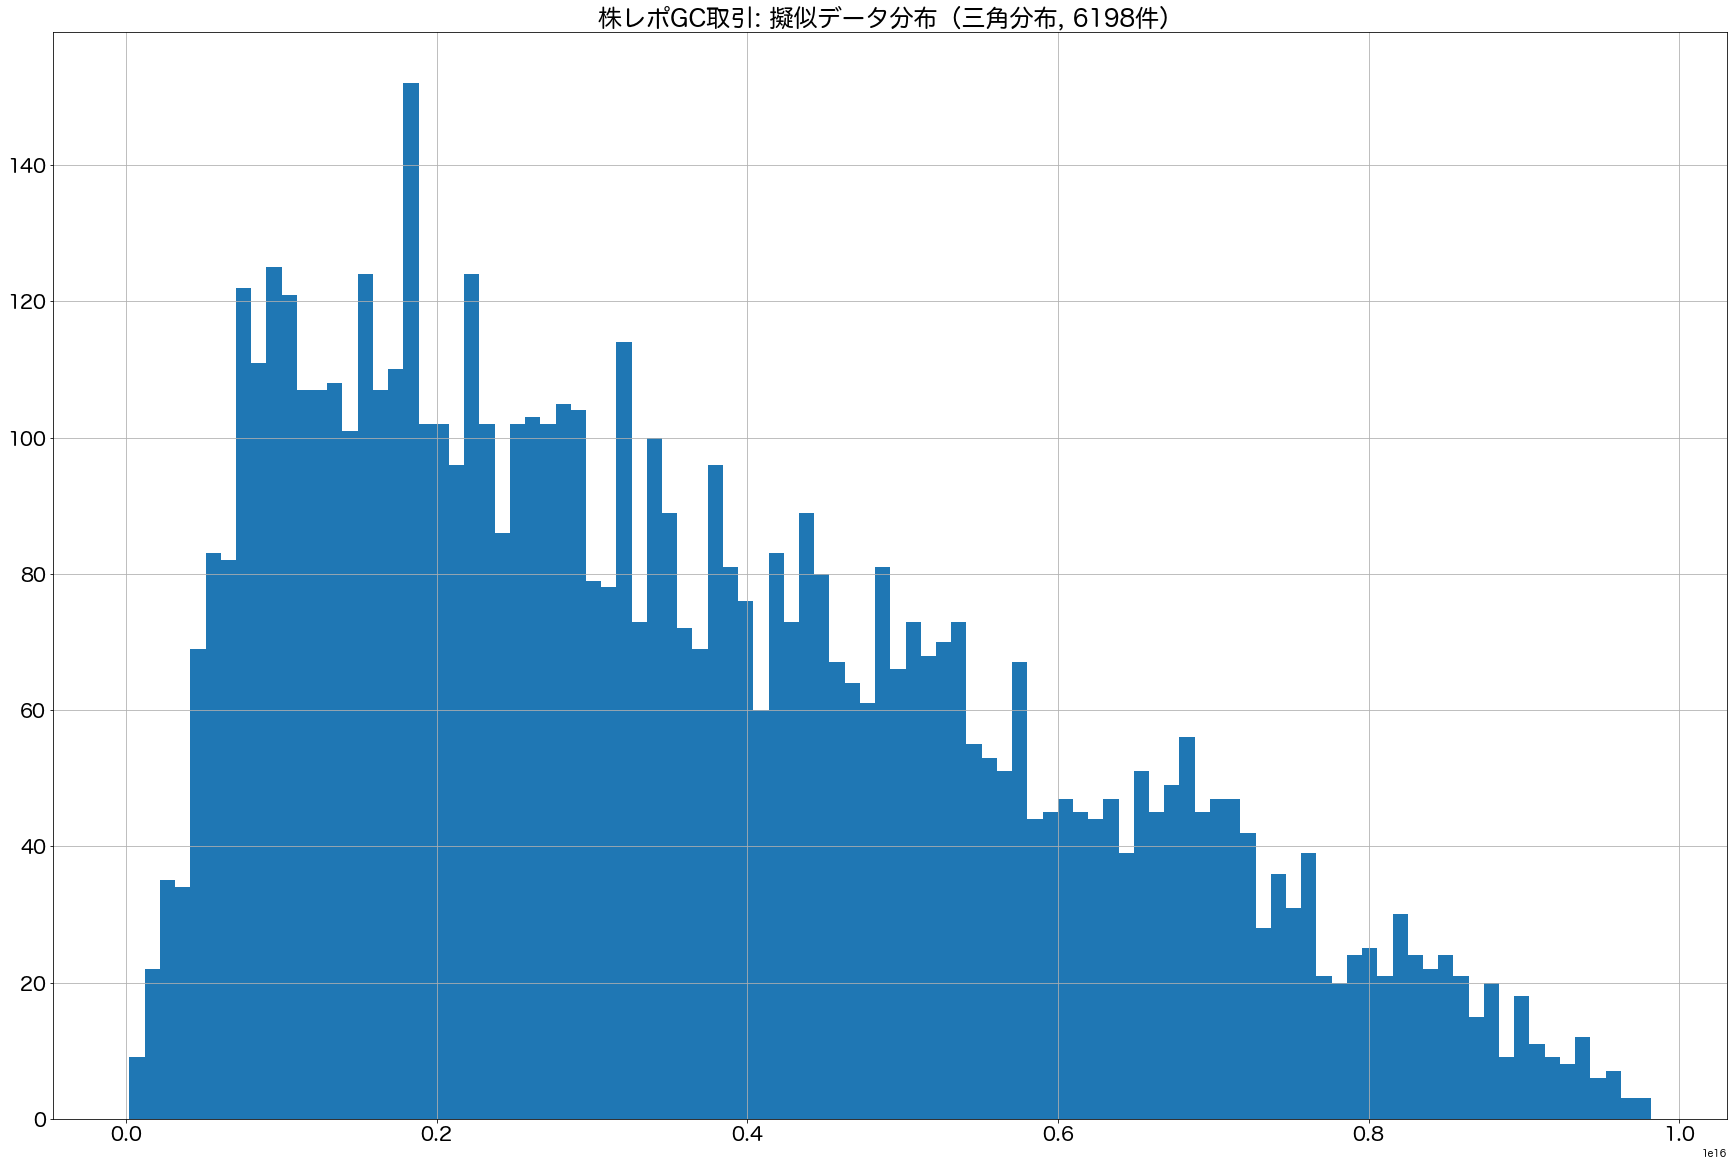

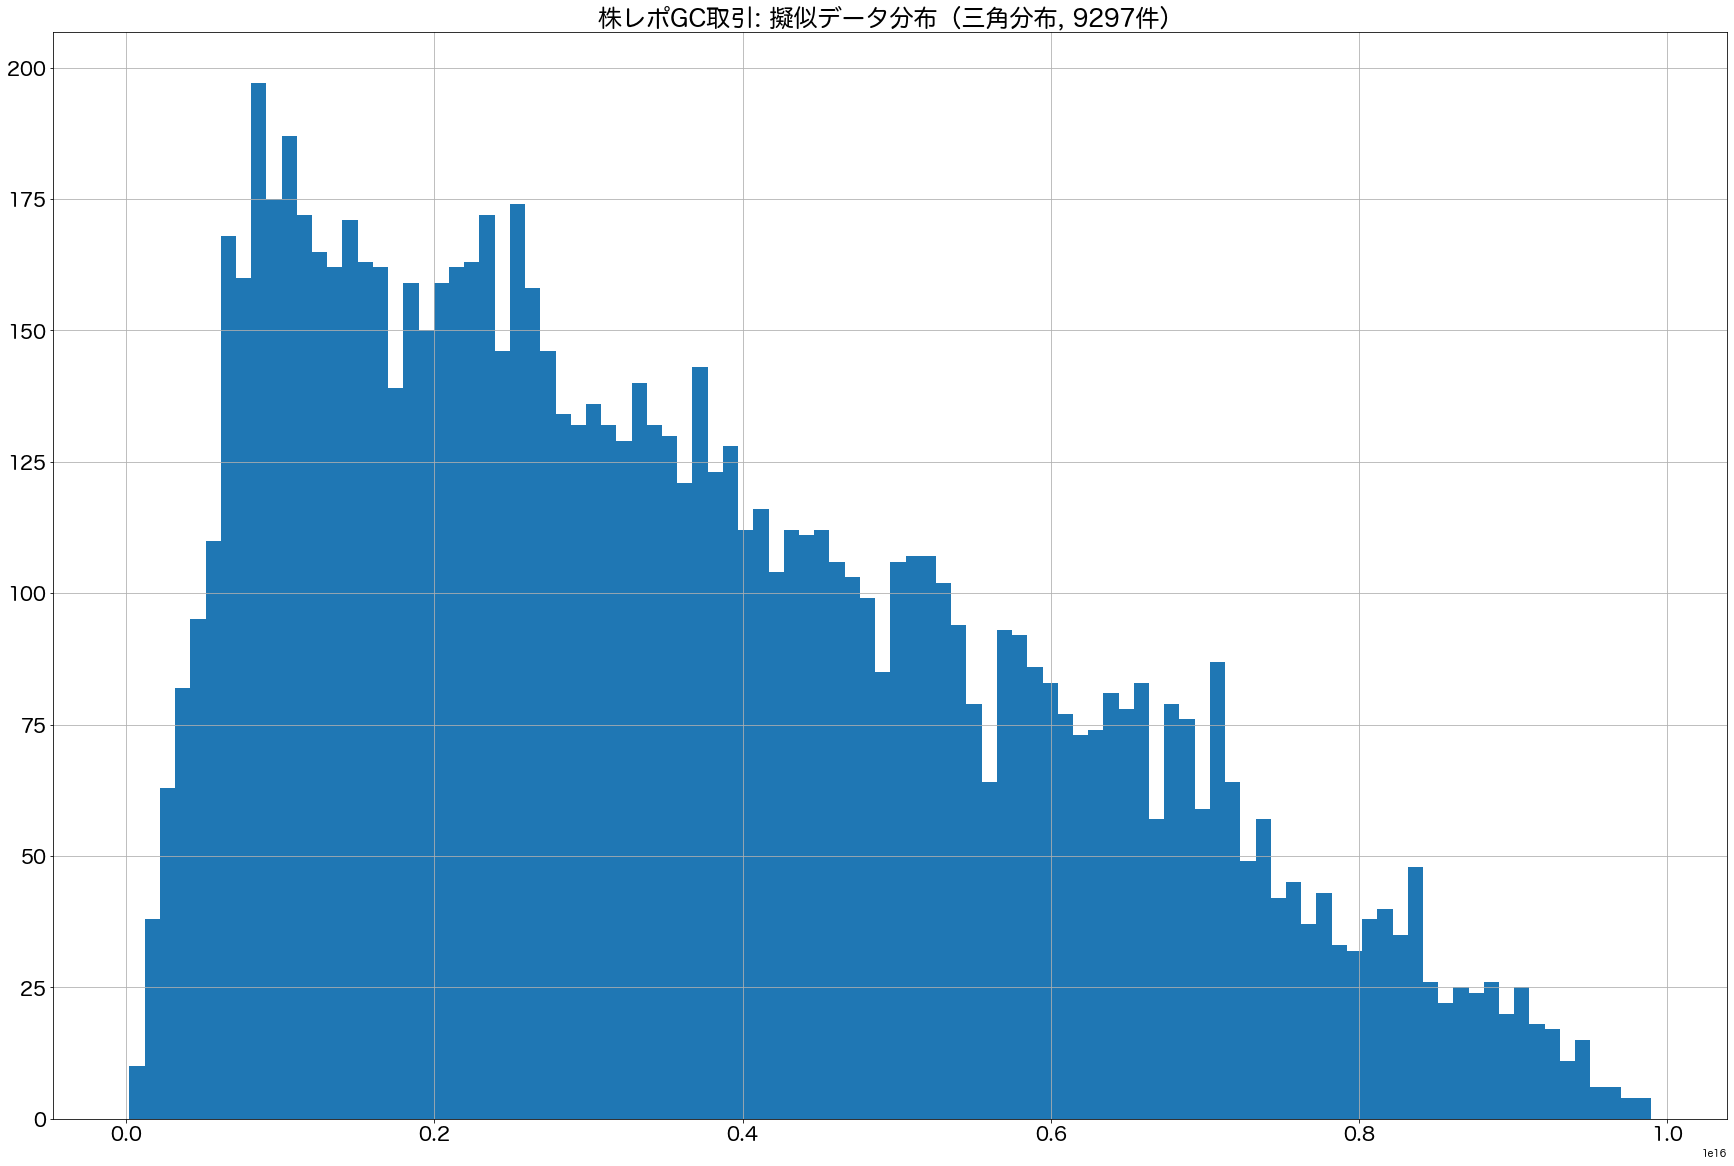

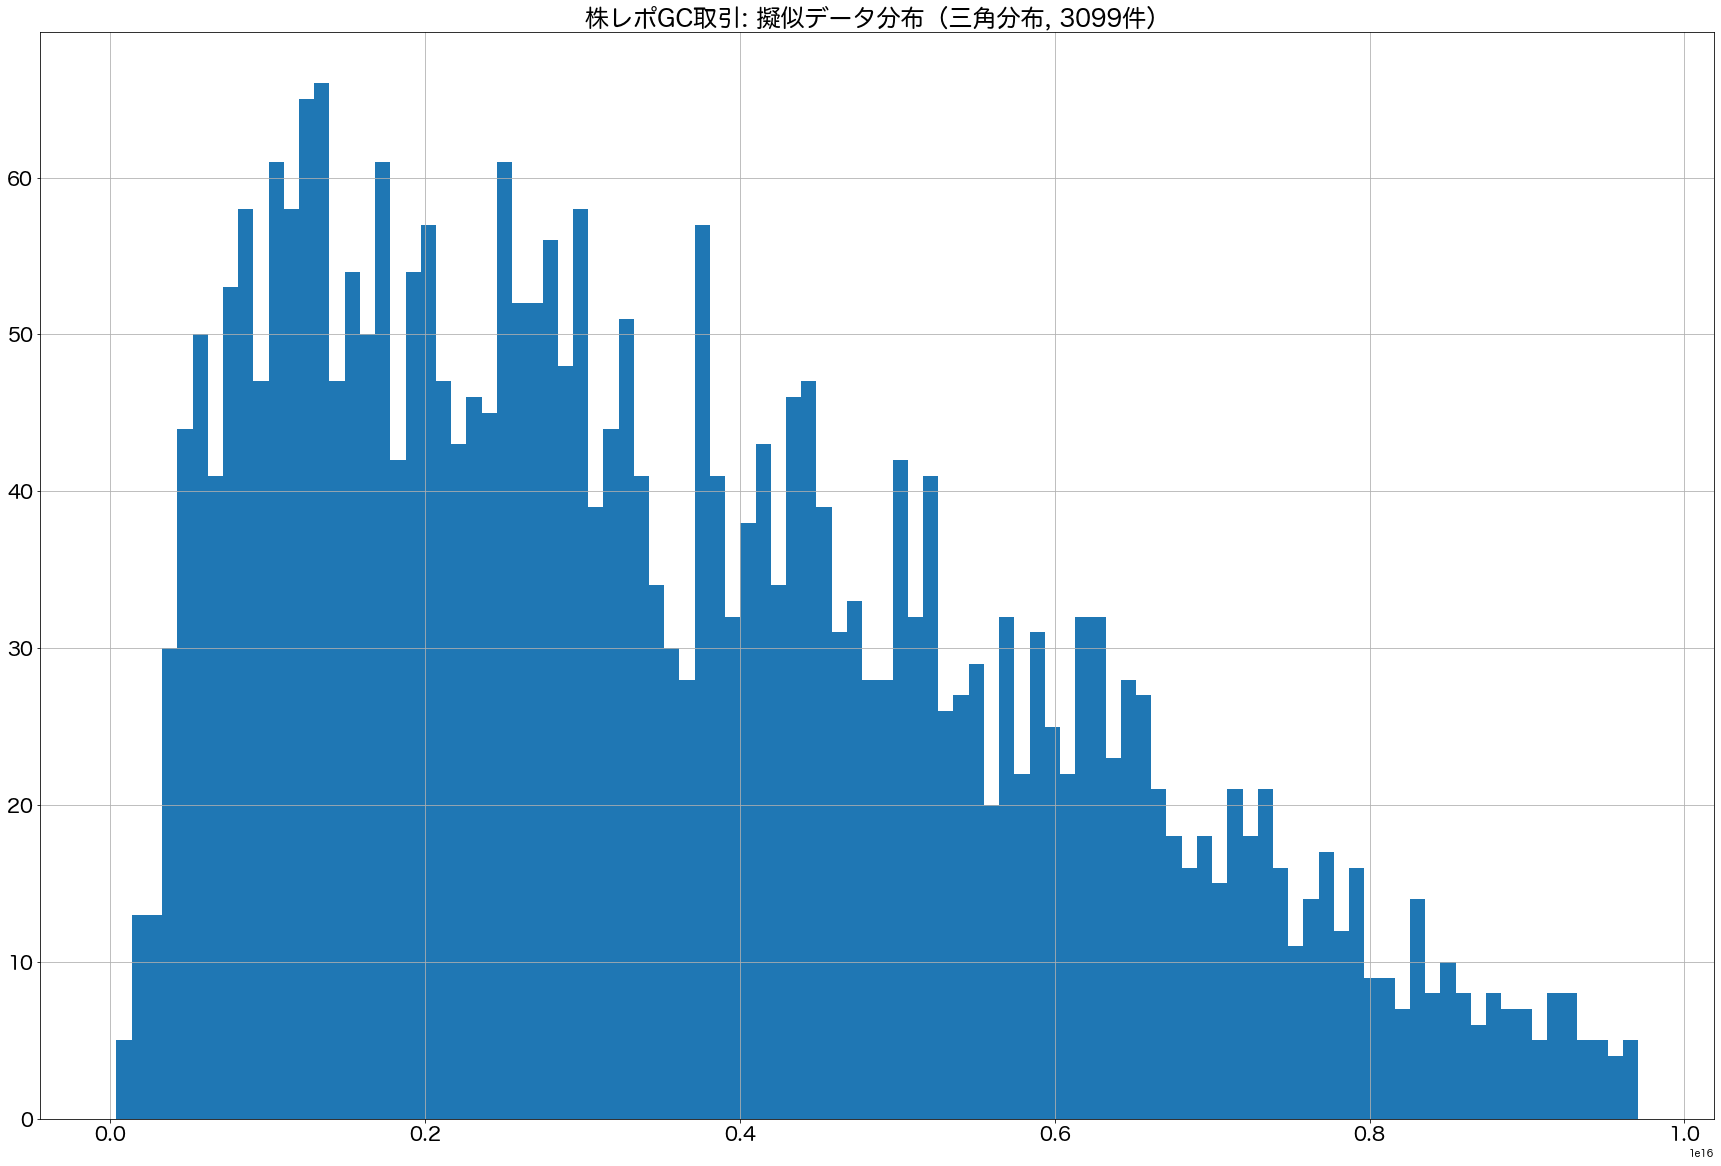

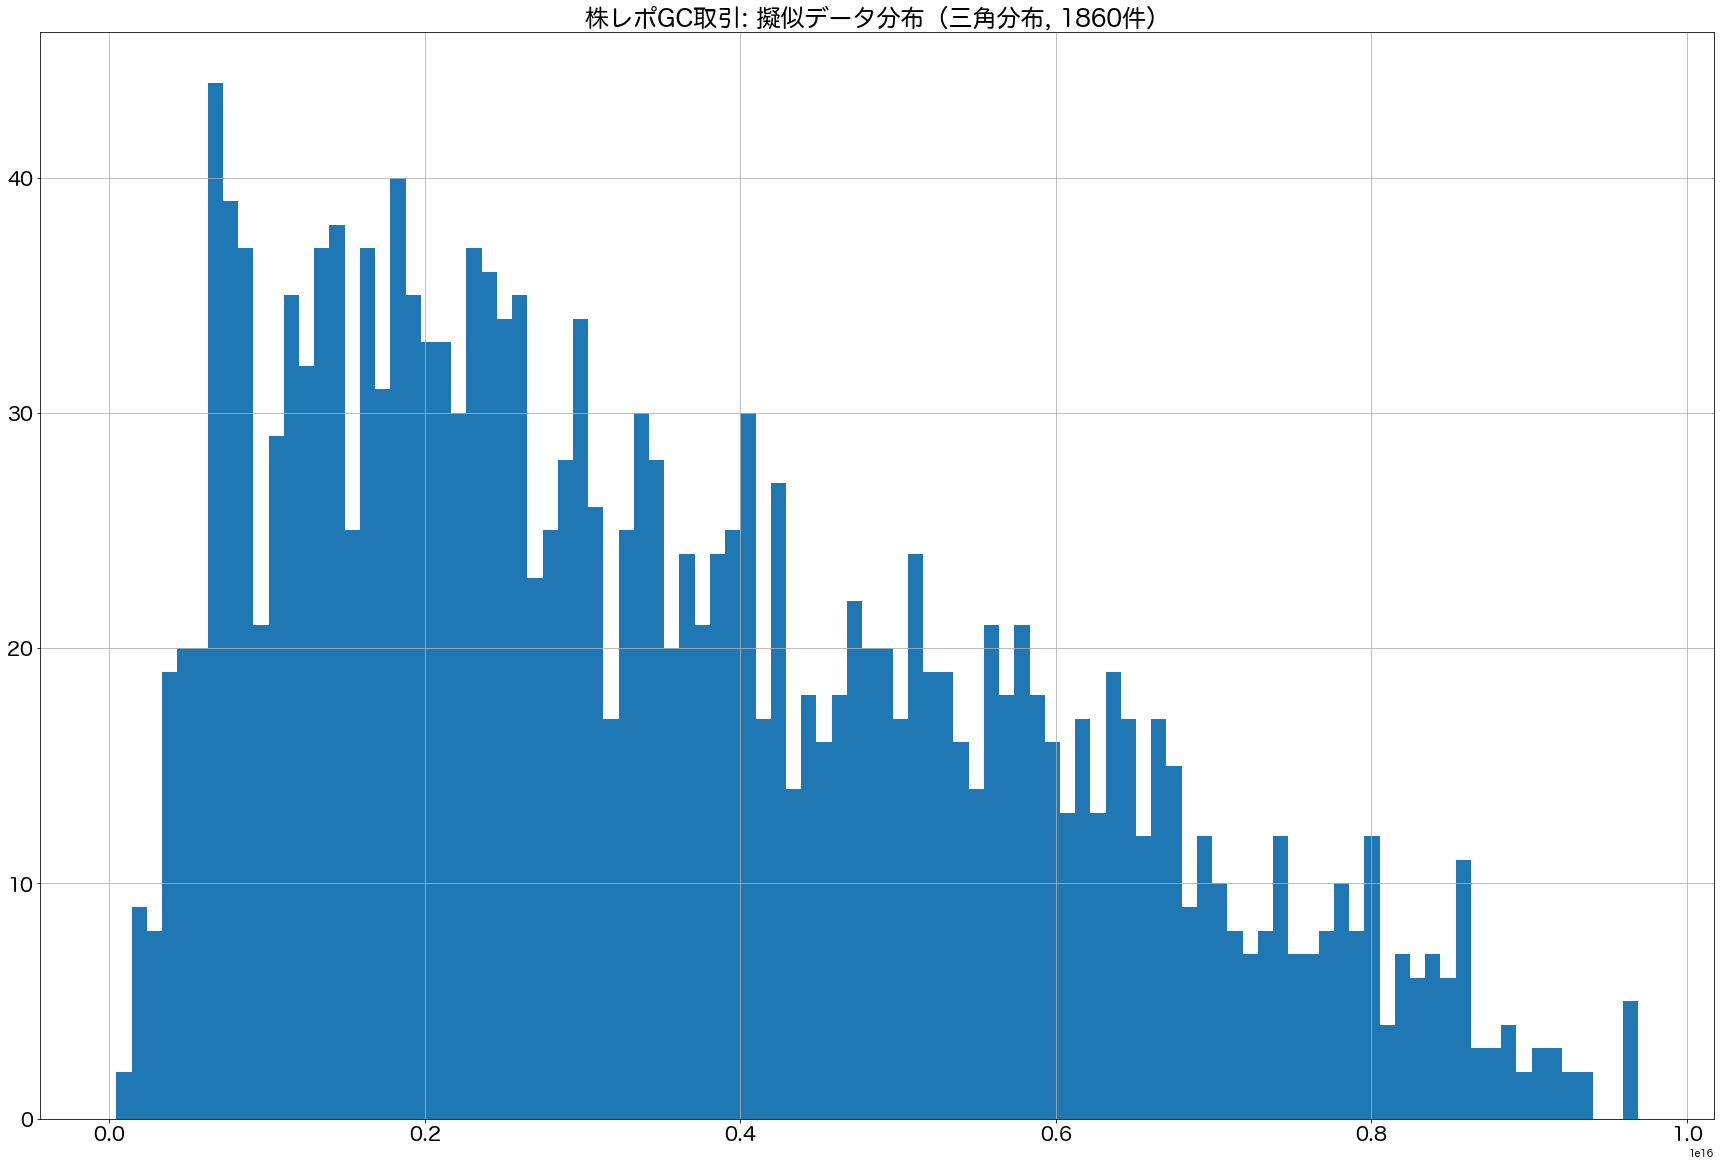

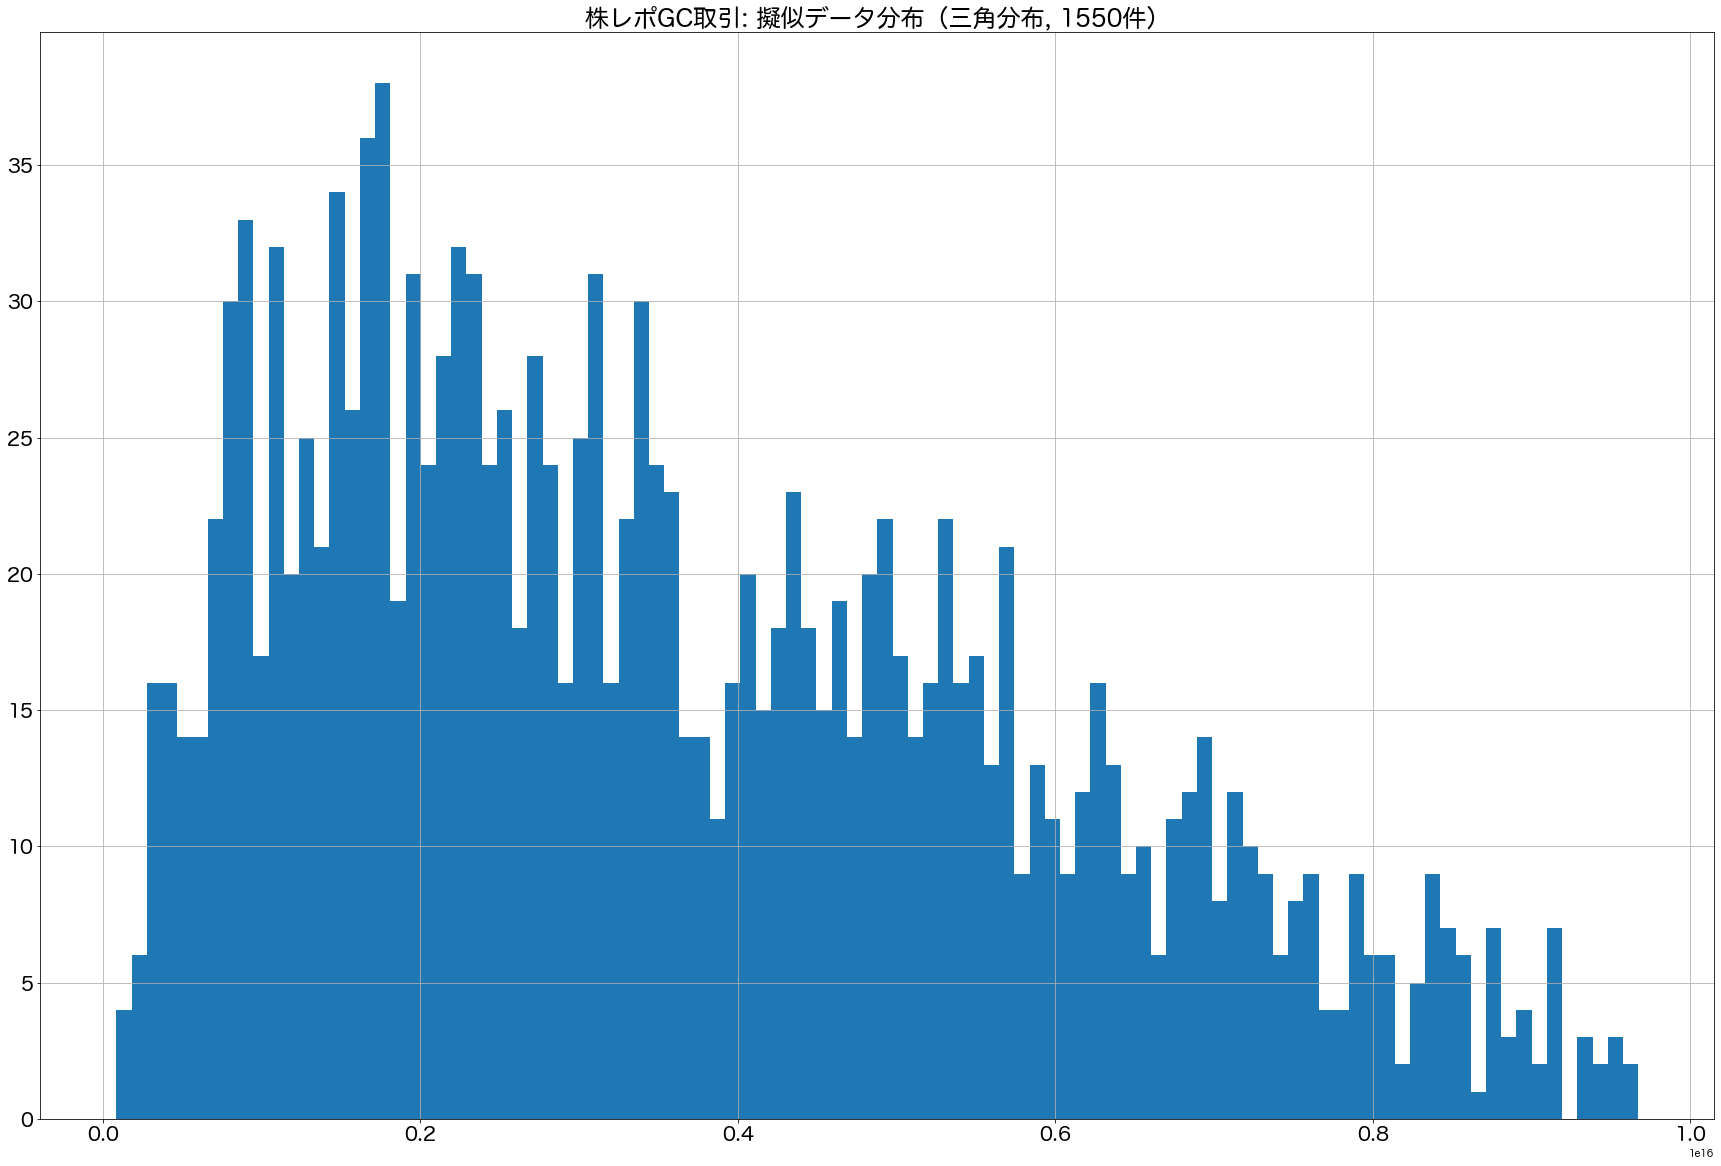

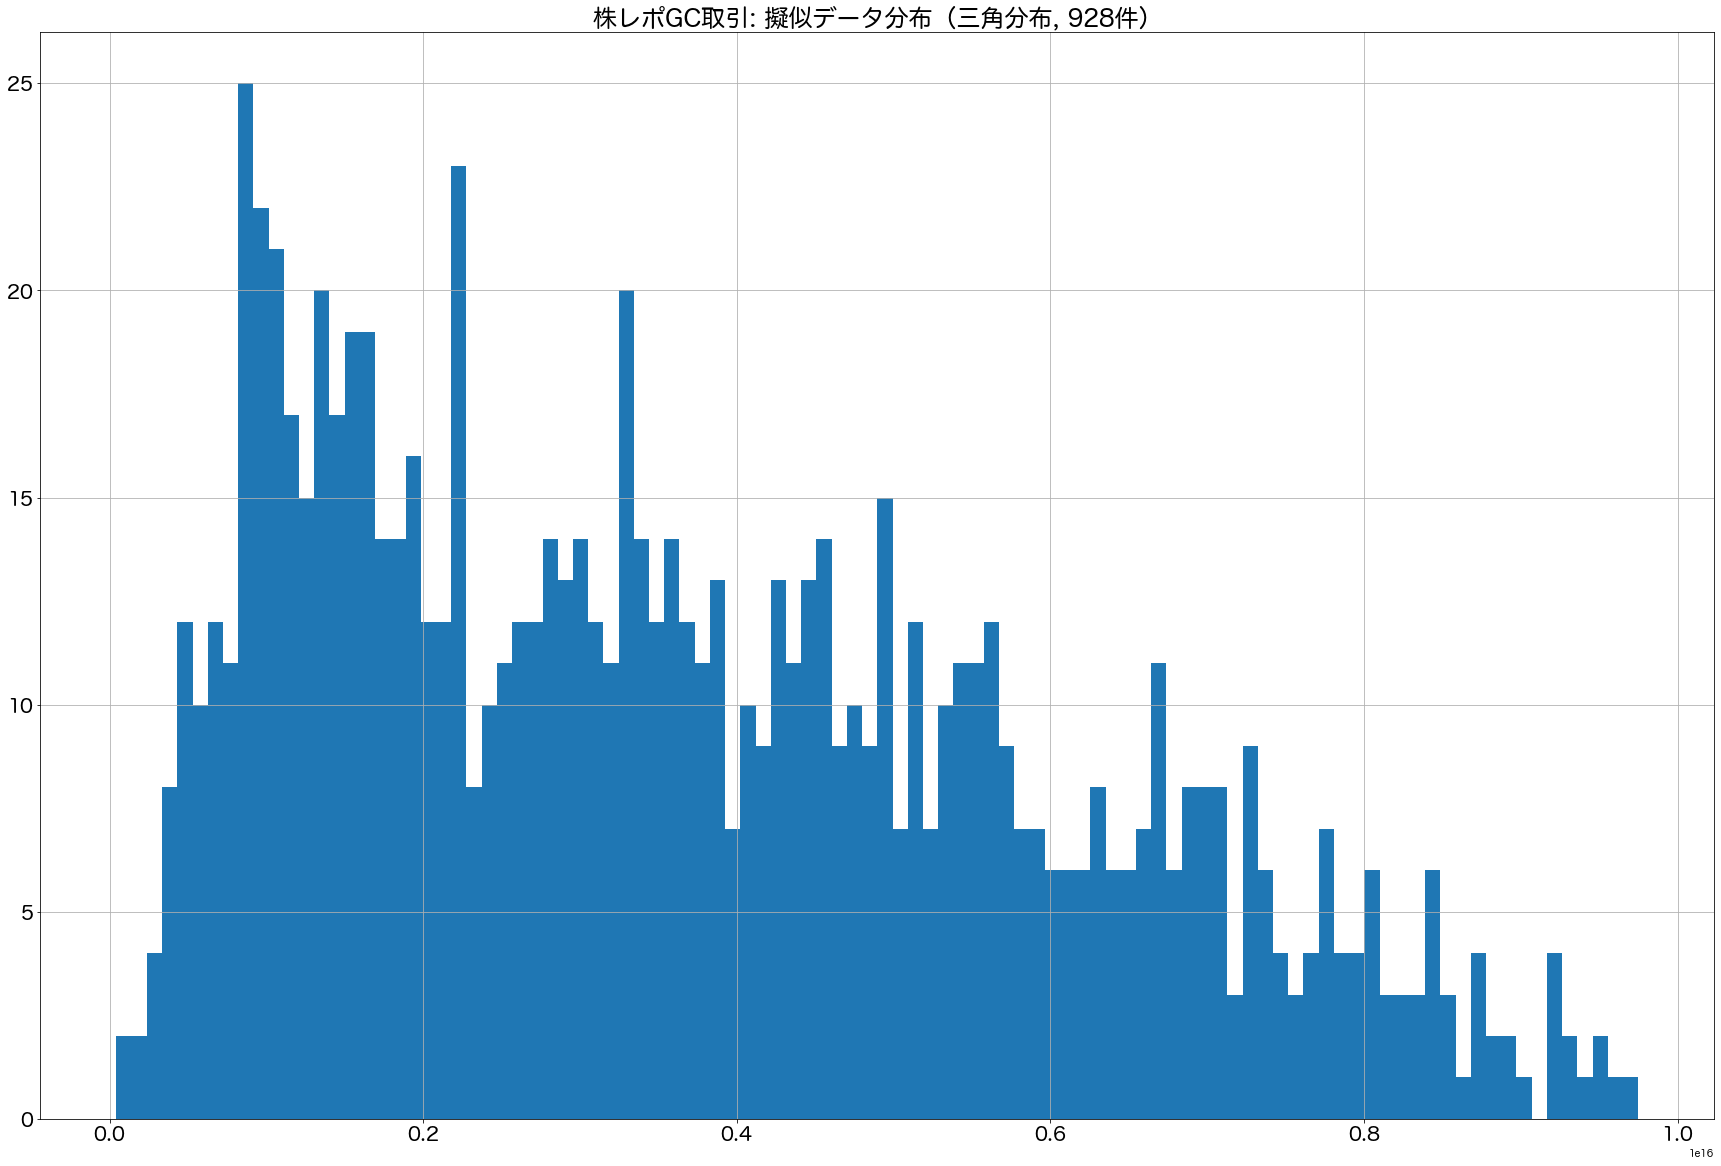

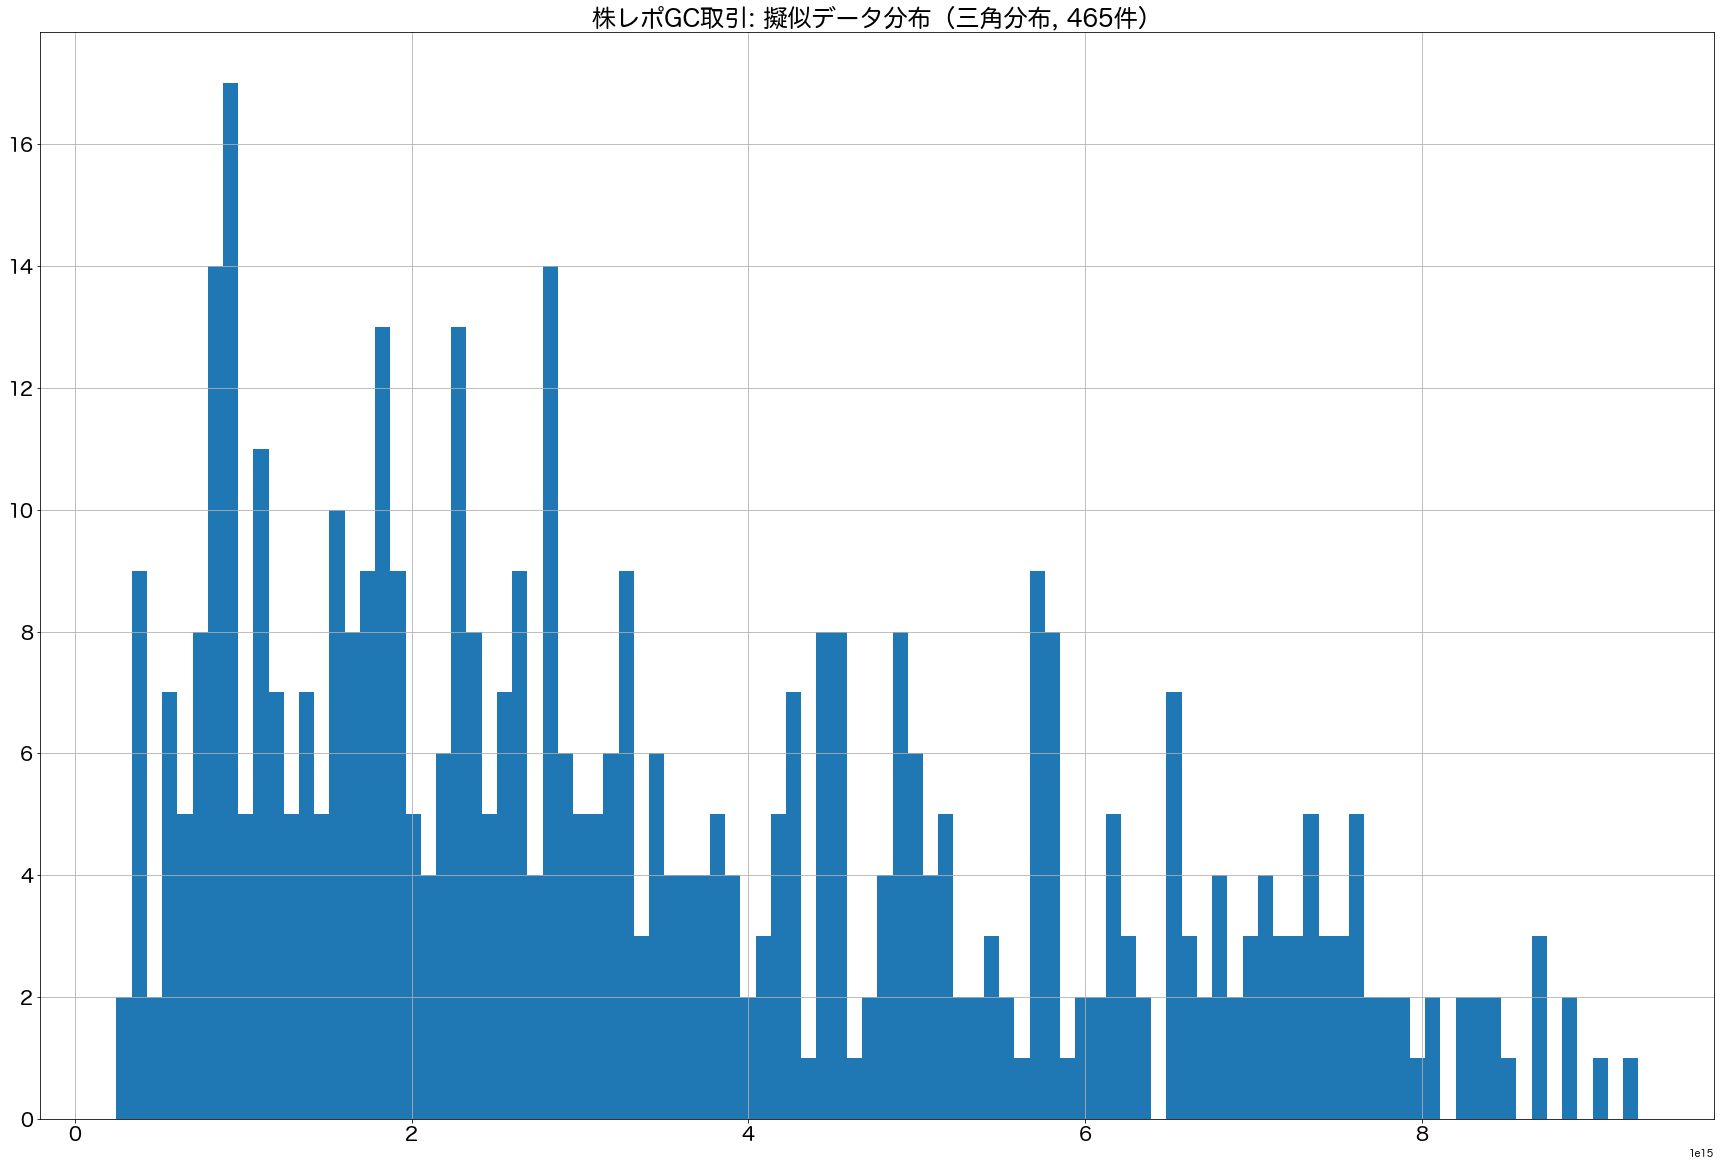

In [16]:
for _key, _value in b_trade_nums.items():
    _num = _value['gc']
    all_price_dfs[_key]['gc'] = get_gc_price_df(_num)
all_price_dfs

#### 株レポSC取引

株レポ: SC取引金額
              1億円以内          1億円超          2億円超          5億円超         10億円超
ratio  7.400000e-01  9.000000e-02  1.100000e-01  4.000000e-02  2.000000e-02
min    1.000000e+03  1.000000e+08  2.000000e+08  5.000000e+08  1.000000e+09
max    1.000000e+08  2.000000e+08  5.000000e+08  1.000000e+09  1.000000e+10
株レポ: SC取引金額概観


<AxesSubplot:>

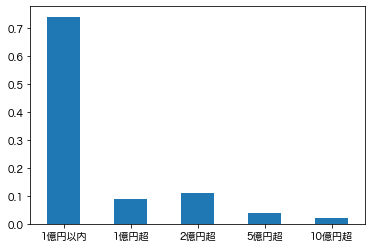

In [17]:
sc_price_column_labels = ['1億円以内', '1億円超', '2億円超', '5億円超', '10億円超']
sc_price_dist = pd.DataFrame([[0.74, 0.09, 0.11, 0.04, 0.02], [1.0e+3, 1.0e+8, 2.0e+8, 5.0e+8, 1.0e+9], [1.0e+8, 2.0e+8, 5.0e+8, 1.0e+9, 1.0e+10]],
                             columns=sc_price_column_labels,
                             index=['ratio', 'min', 'max'])
sc_price_ave = 1.34e+8
print('株レポ: SC取引金額')
pprint(sc_price_dist)
print('='*50)
print('株レポ: SC取引金額概観')
sc_price_dist.T['ratio'].plot(kind='bar', rot=0)

株レポ: SC取引金額ヒストグラム


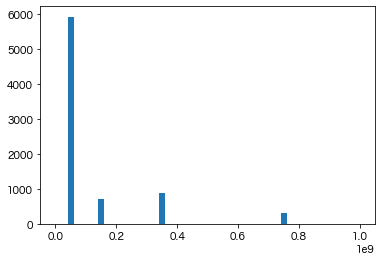

In [18]:
sc_trade_num = 8000
sc_ave_price_list = (sc_price_dist.T['min'] + sc_price_dist.T['max']) / 2
sc_sample = [[ave]*int(sc_price_dist.T['ratio'][index] * sc_trade_num)  for (index, ave) in enumerate(sc_ave_price_list)]
plt.hist(list(itertools.chain.from_iterable(sc_sample)), bins=50, range=(0, 1.0e+9))
print('株レポ: SC取引金額ヒストグラム')

In [19]:
def get_sc_price_df(trade_num):
    sc_price_max = sc_price_dist['10億円超']['max']
    sc_price_min = sc_price_dist['1億円以内']['min']
    mock_sc_price_df = pd.DataFrame(np.random.triangular(sc_price_min, sc_price_ave, sc_price_max, trade_num)) * 1.0e+5
    mock_sc_price_df.hist(bins=100, figsize=(30, 20))
    plt.title(f'株レポSC取引: 擬似データ分布（三角分布, {trade_num}件）', fontsize=24)
    return mock_sc_price_df

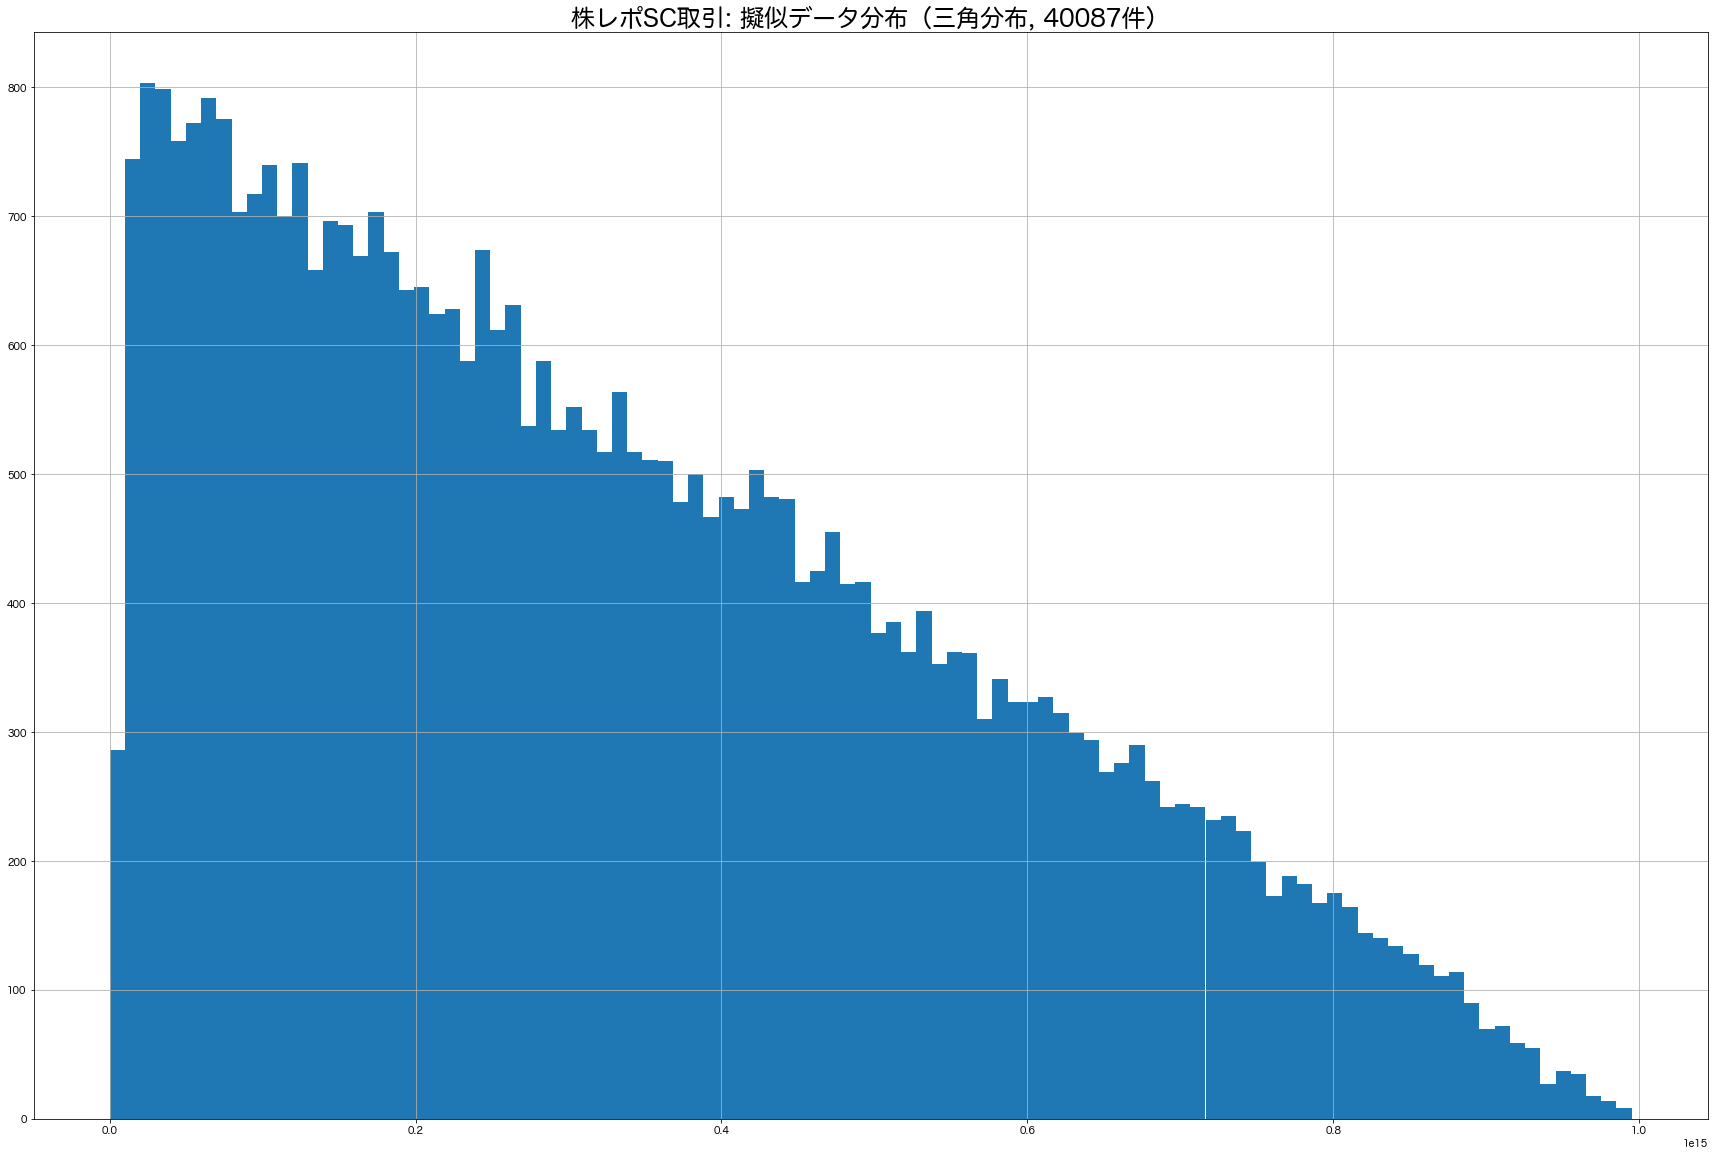

In [20]:
mock_sc_trade_8000_df = get_sc_price_df(b_trade_nums['100%']['sc'])

{'gc':                  0
 0     8.580279e+15
 1     2.753331e+15
 2     1.667391e+15
 3     1.468086e+15
 4     6.751486e+15
 ...            ...
 6193  1.525629e+15
 6194  5.694848e+15
 6195  8.402993e+14
 6196  2.984510e+15
 6197  2.136864e+15
 
 [6198 rows x 1 columns],
 'sc':                   0
 0      7.216693e+14
 1      4.694652e+14
 2      2.483840e+14
 3      2.611287e+14
 4      1.054932e+14
 ...             ...
 40082  4.033779e+14
 40083  5.012576e+14
 40084  8.553692e+14
 40085  6.113798e+14
 40086  4.003150e+14
 
 [40087 rows x 1 columns]}

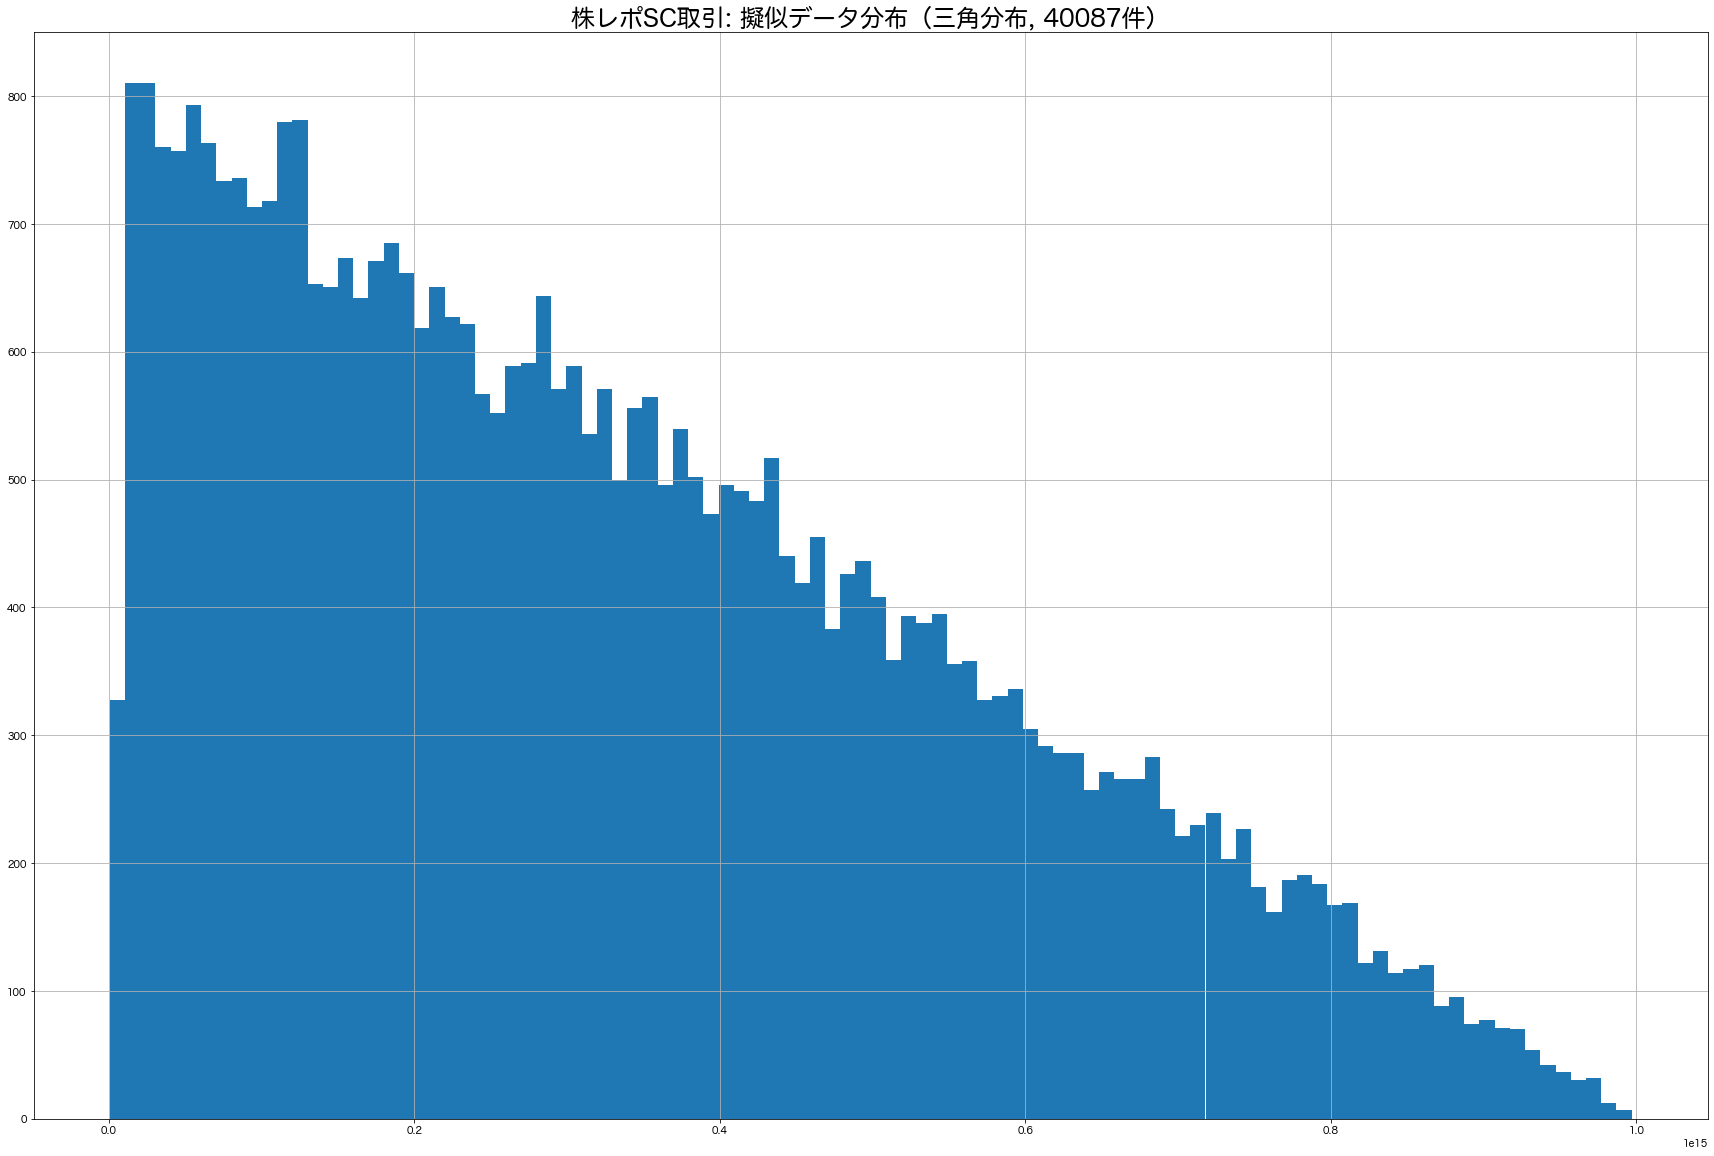

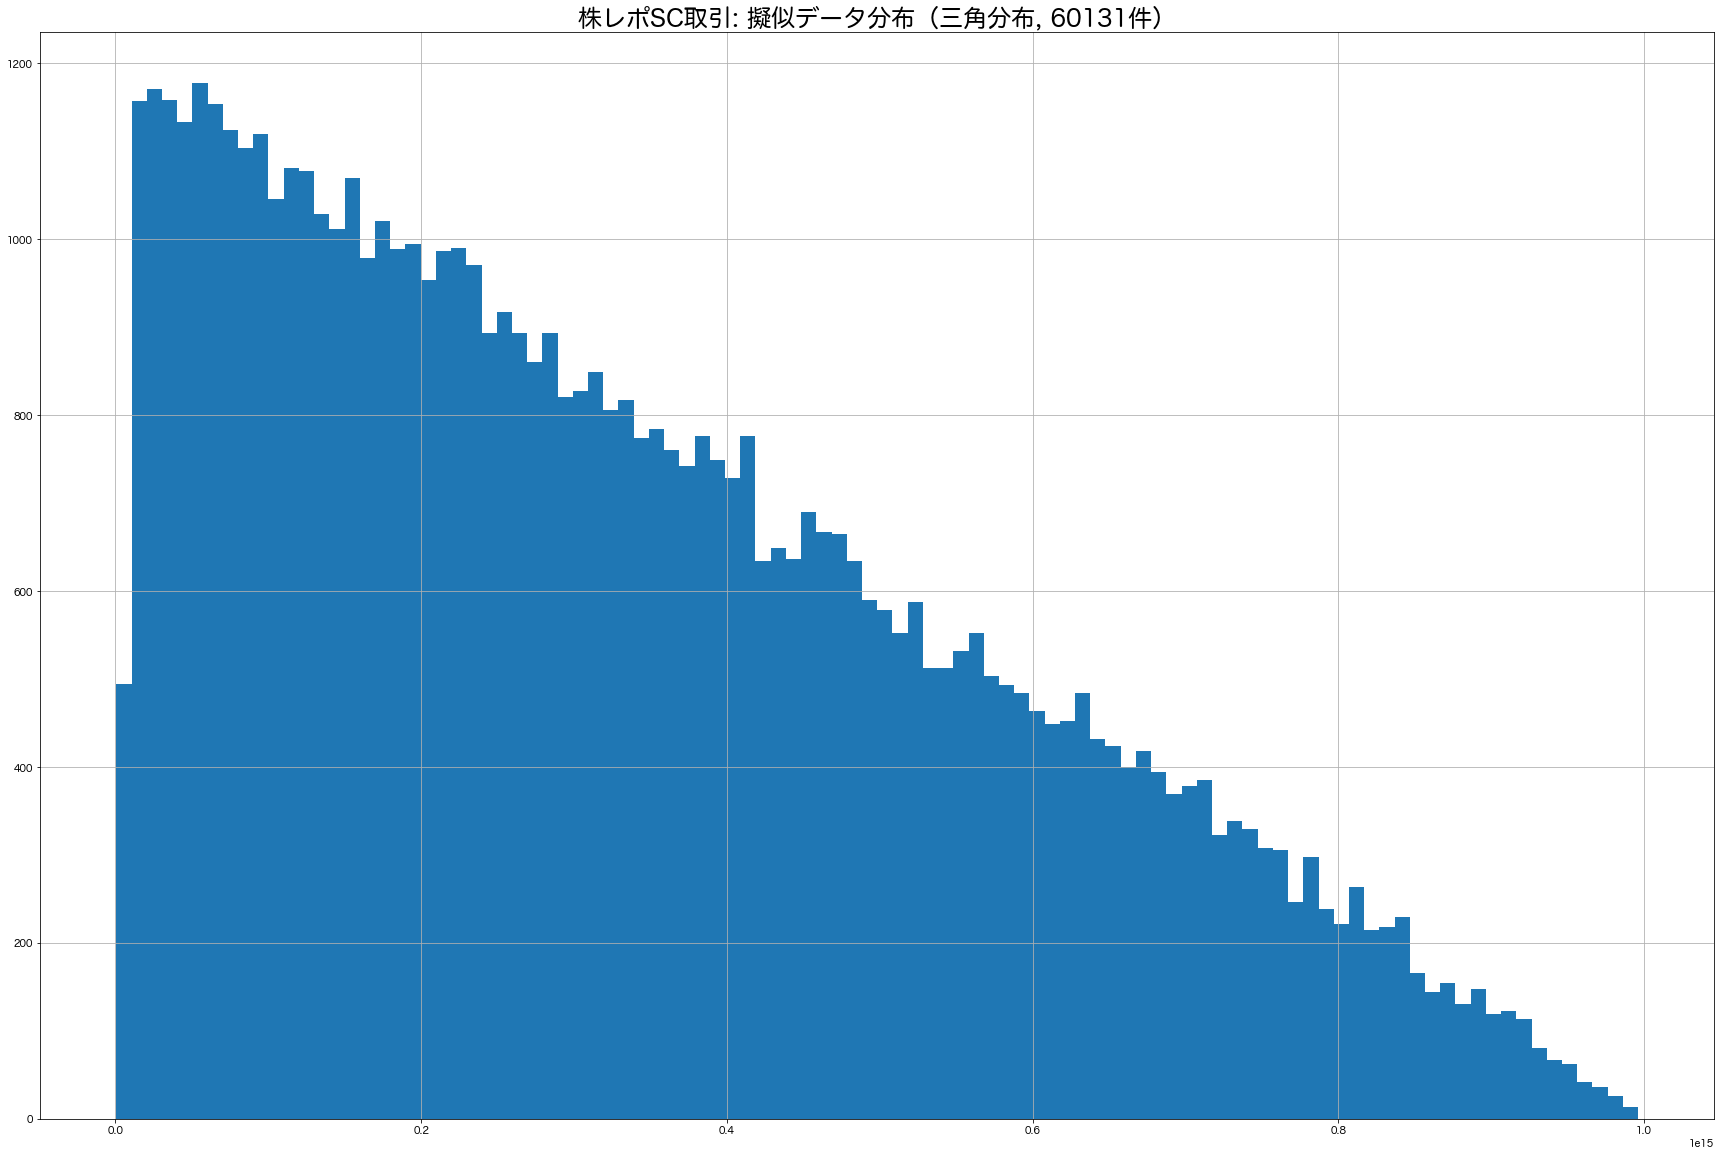

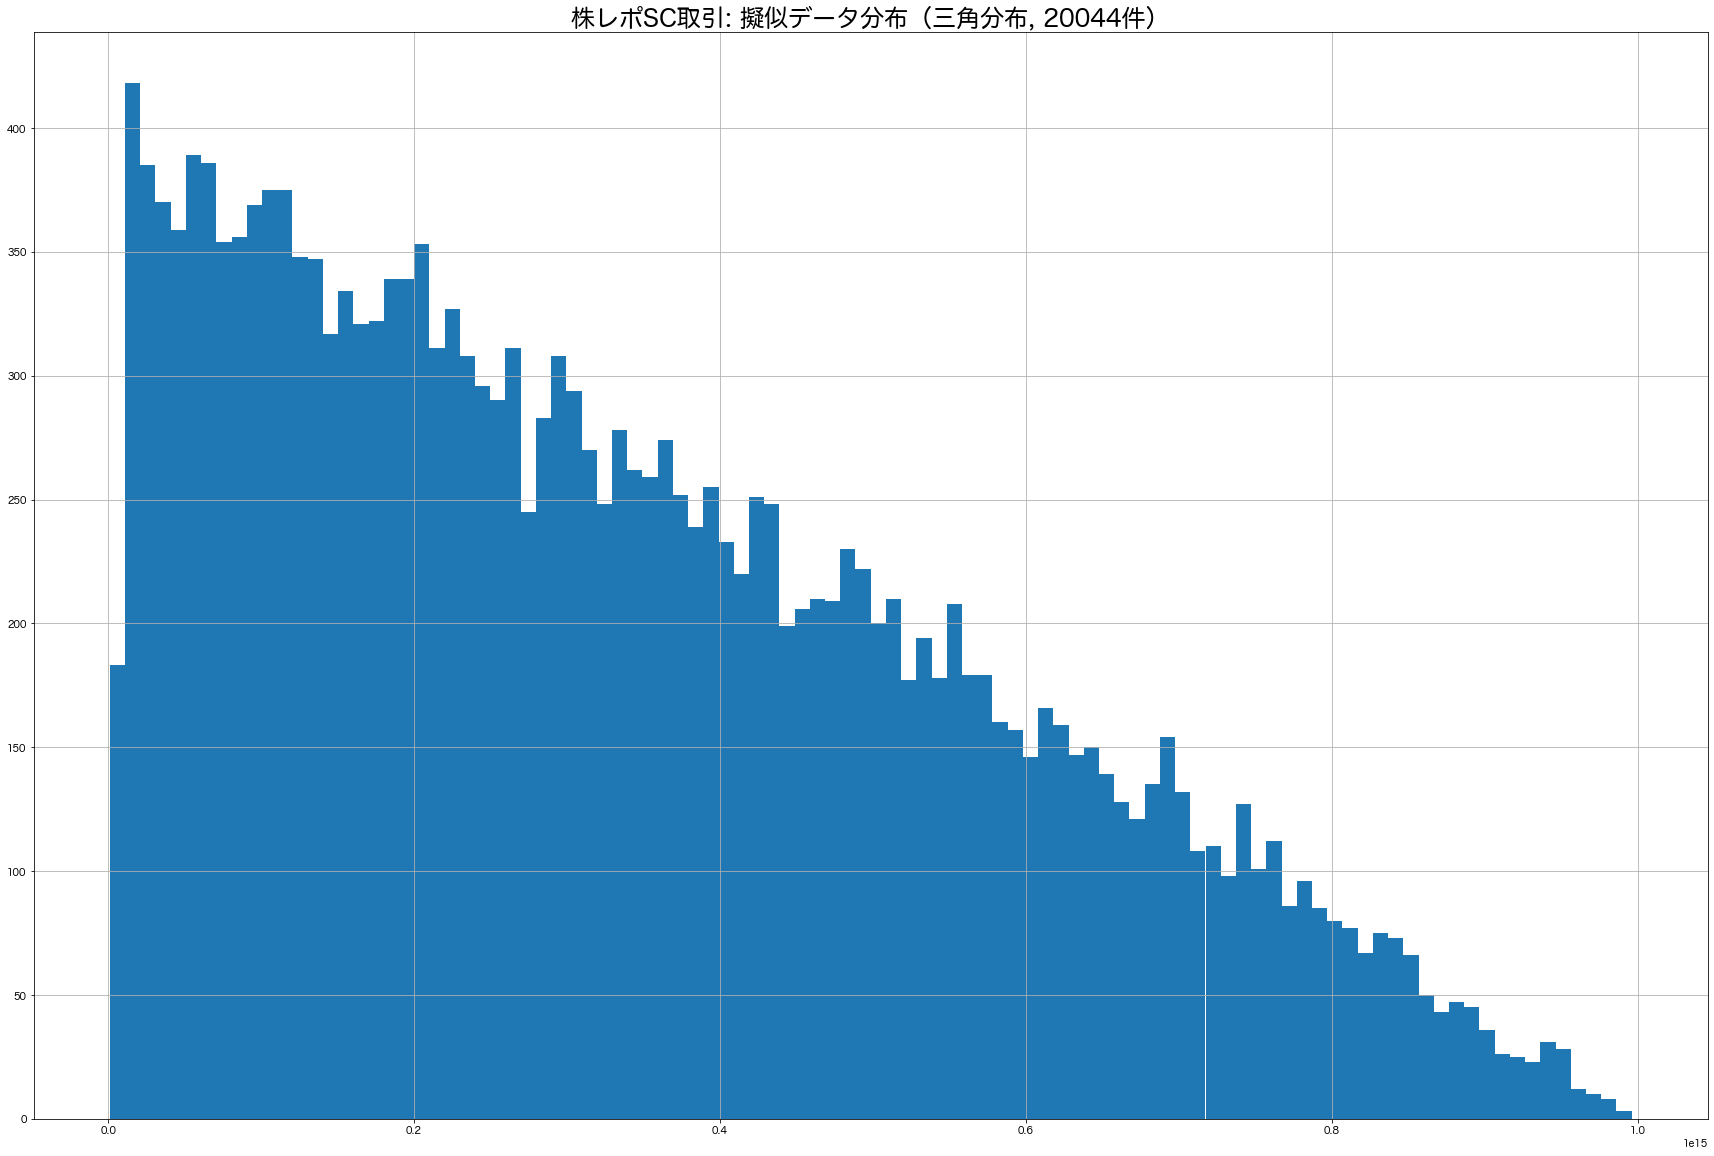

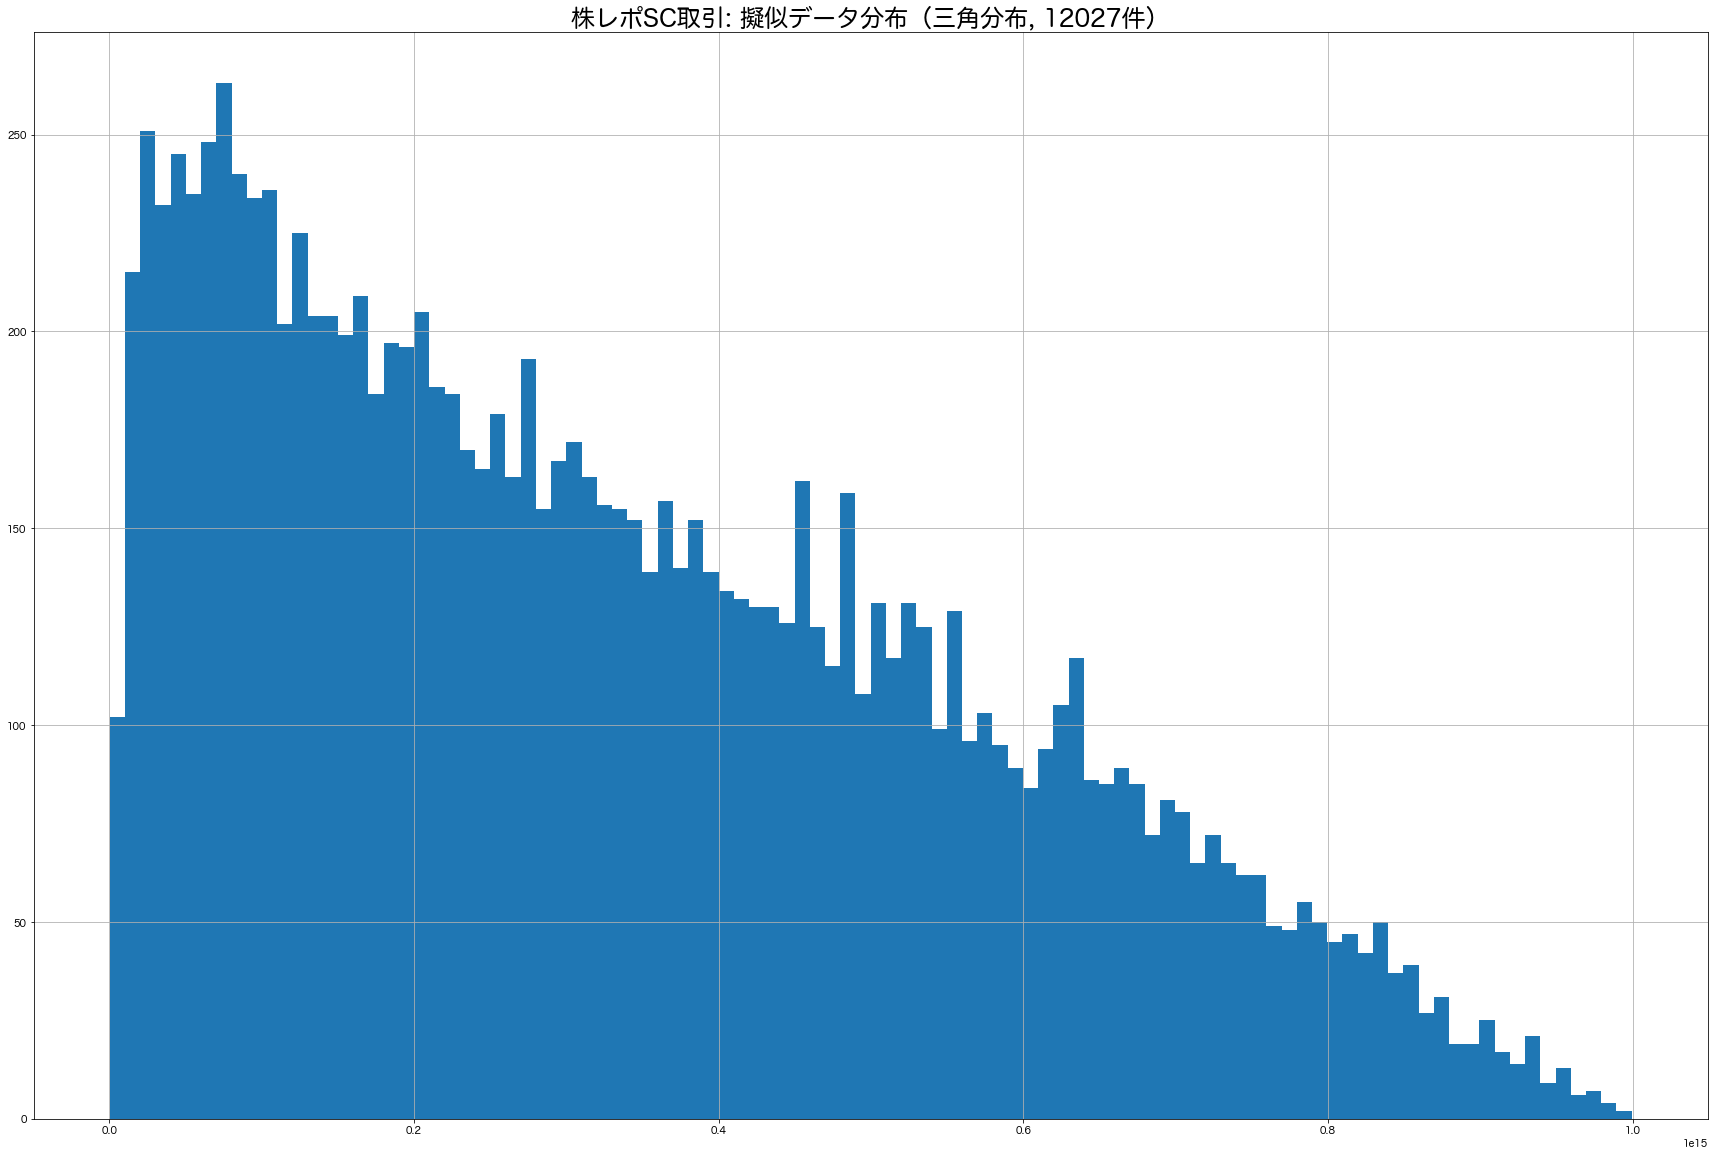

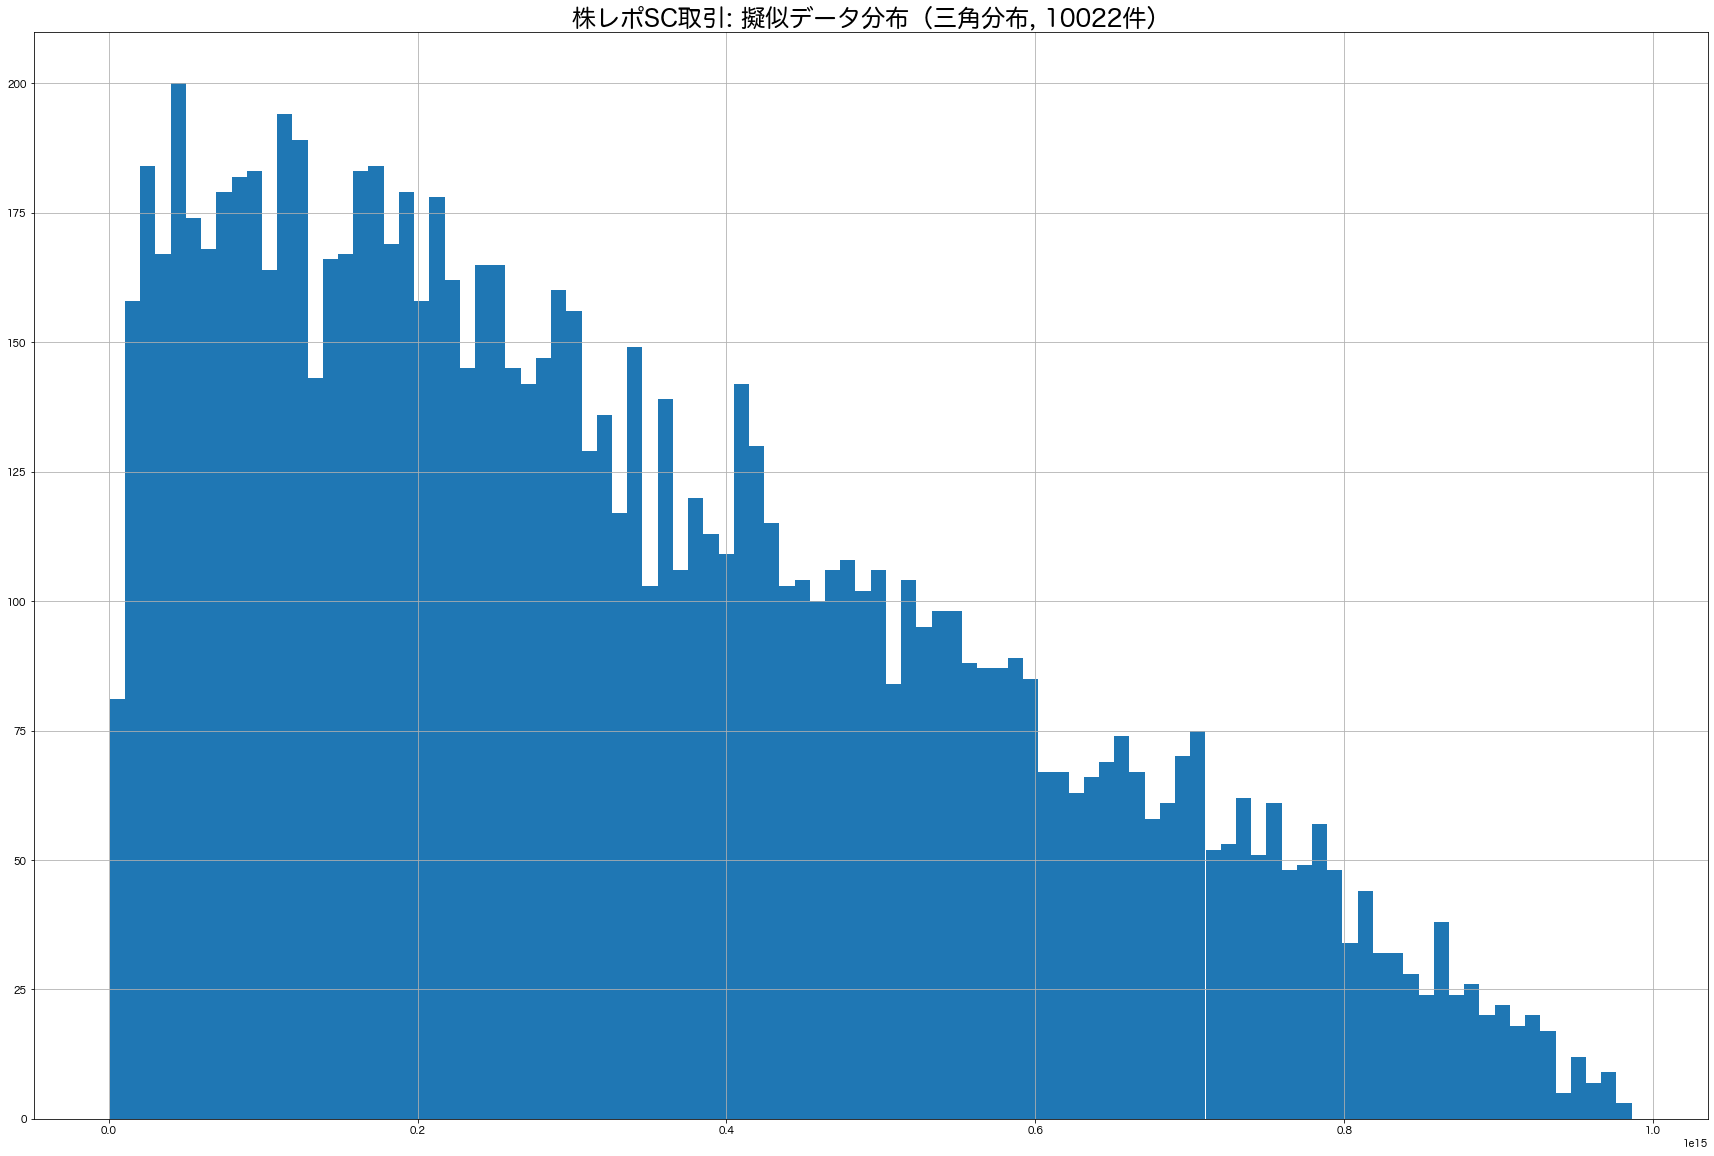

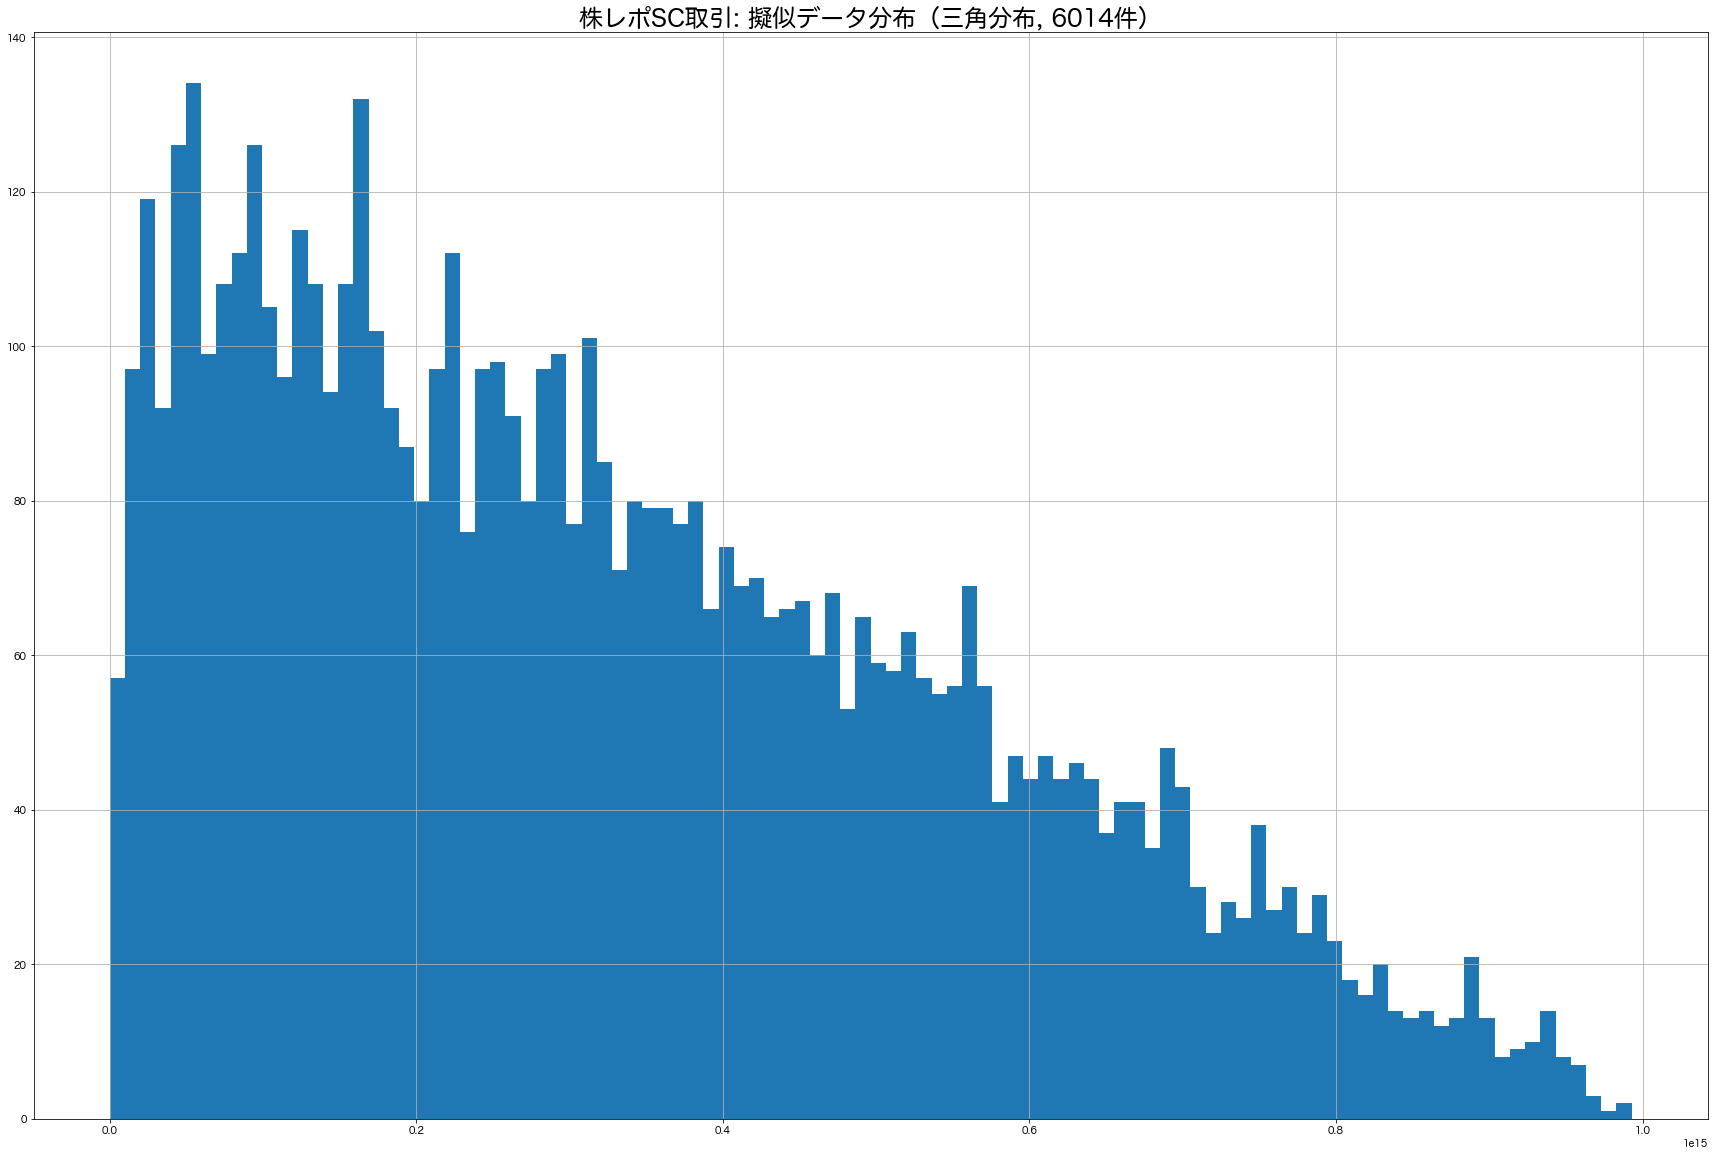

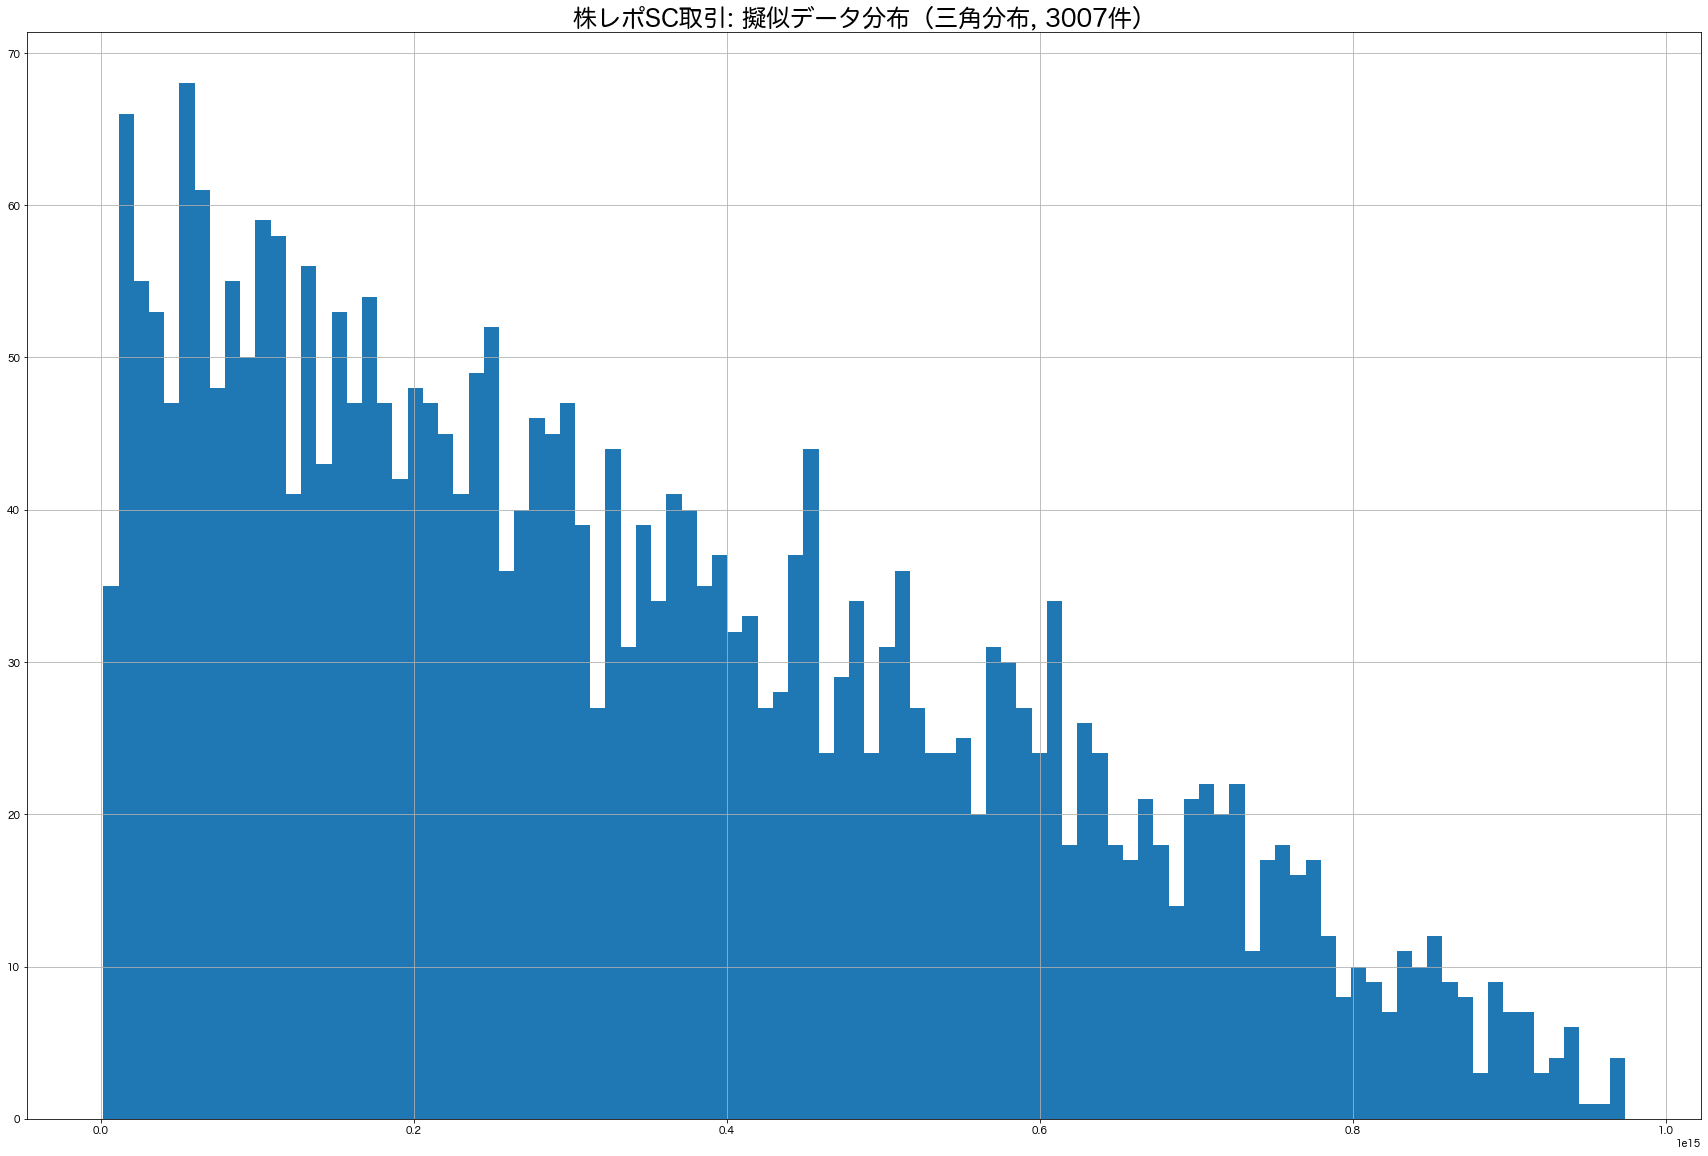

In [21]:
for _key, _value in b_trade_nums.items():
    _num = _value['sc']
    all_price_dfs[_key]['sc'] = get_sc_price_df(_num)
all_price_dfs['100%']

#### 債券

債券レポ取引: 
             10億円以内         10億円超         50億円超        100億円超        500億円超
ratio  1.200000e-01  3.100000e-01  1.900000e-01  3.100000e-01  7.000000e-02
min    1.000000e+08  1.000000e+09  5.000000e+09  1.000000e+10  5.000000e+10
max    1.000000e+09  5.000000e+09  1.000000e+10  5.000000e+10  5.000000e+11


<AxesSubplot:title={'center':'債券レポ取引: 概観'}>

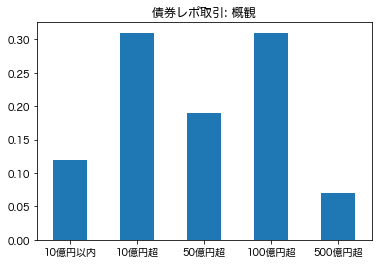

In [22]:
bond_price_column_labels = ['10億円以内', '10億円超', '50億円超', '100億円超', '500億円超']
bond_price_dist = pd.DataFrame([[0.12, 0.31, 0.19, 0.31, 0.07], [1.0e+8, 1.0e+9, 5.0e+9, 1.0e+10, 5.0e+10], [1.0e+9, 5.0e+9, 1.0e+10, 5.0e+10, 5.0e+11]],
                             columns=bond_price_column_labels,
                             index=['ratio', 'min', 'max'])
bond_price_ave = 113.0e+8
print('債券レポ取引: ')
pprint(bond_price_dist)
print('='*50)

plt.title('債券レポ取引: 概観')
bond_price_dist.T['ratio'].plot(kind='bar', rot=0)

債券レポ: 取引金額ヒストグラム


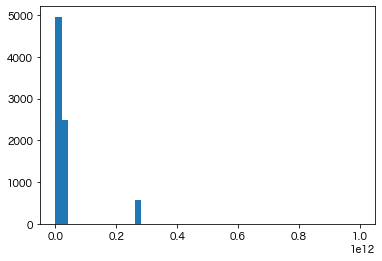

In [23]:
bond_trade_num = 8000
bond_ave_price_list = (bond_price_dist.T['min'] + bond_price_dist.T['max']) / 2
bond_sample = [[ave]*int(bond_price_dist.T['ratio'][index] * bond_trade_num)  for (index, ave) in enumerate(bond_ave_price_list)]
plt.hist(list(itertools.chain.from_iterable(bond_sample)), bins=50, range=(0, 1.0e+12))
print('債券レポ: 取引金額ヒストグラム')

In [24]:
def get_bond_price_df(trade_num):
    bond_price_max = bond_price_dist['500億円超']['max']
    bond_price_min = bond_price_dist['10億円以内']['min']
    mock_bond_price_df = pd.DataFrame(np.random.triangular(bond_price_min, bond_price_ave, bond_price_max, trade_num)) * 1.0e+5
    mock_bond_price_df.hist(bins=100, figsize=(30, 20))
    plt.title(f'債券レポ取引: 擬似データ分布（三角分布, {trade_num}件）', fontsize=24)
    return mock_bond_price_df

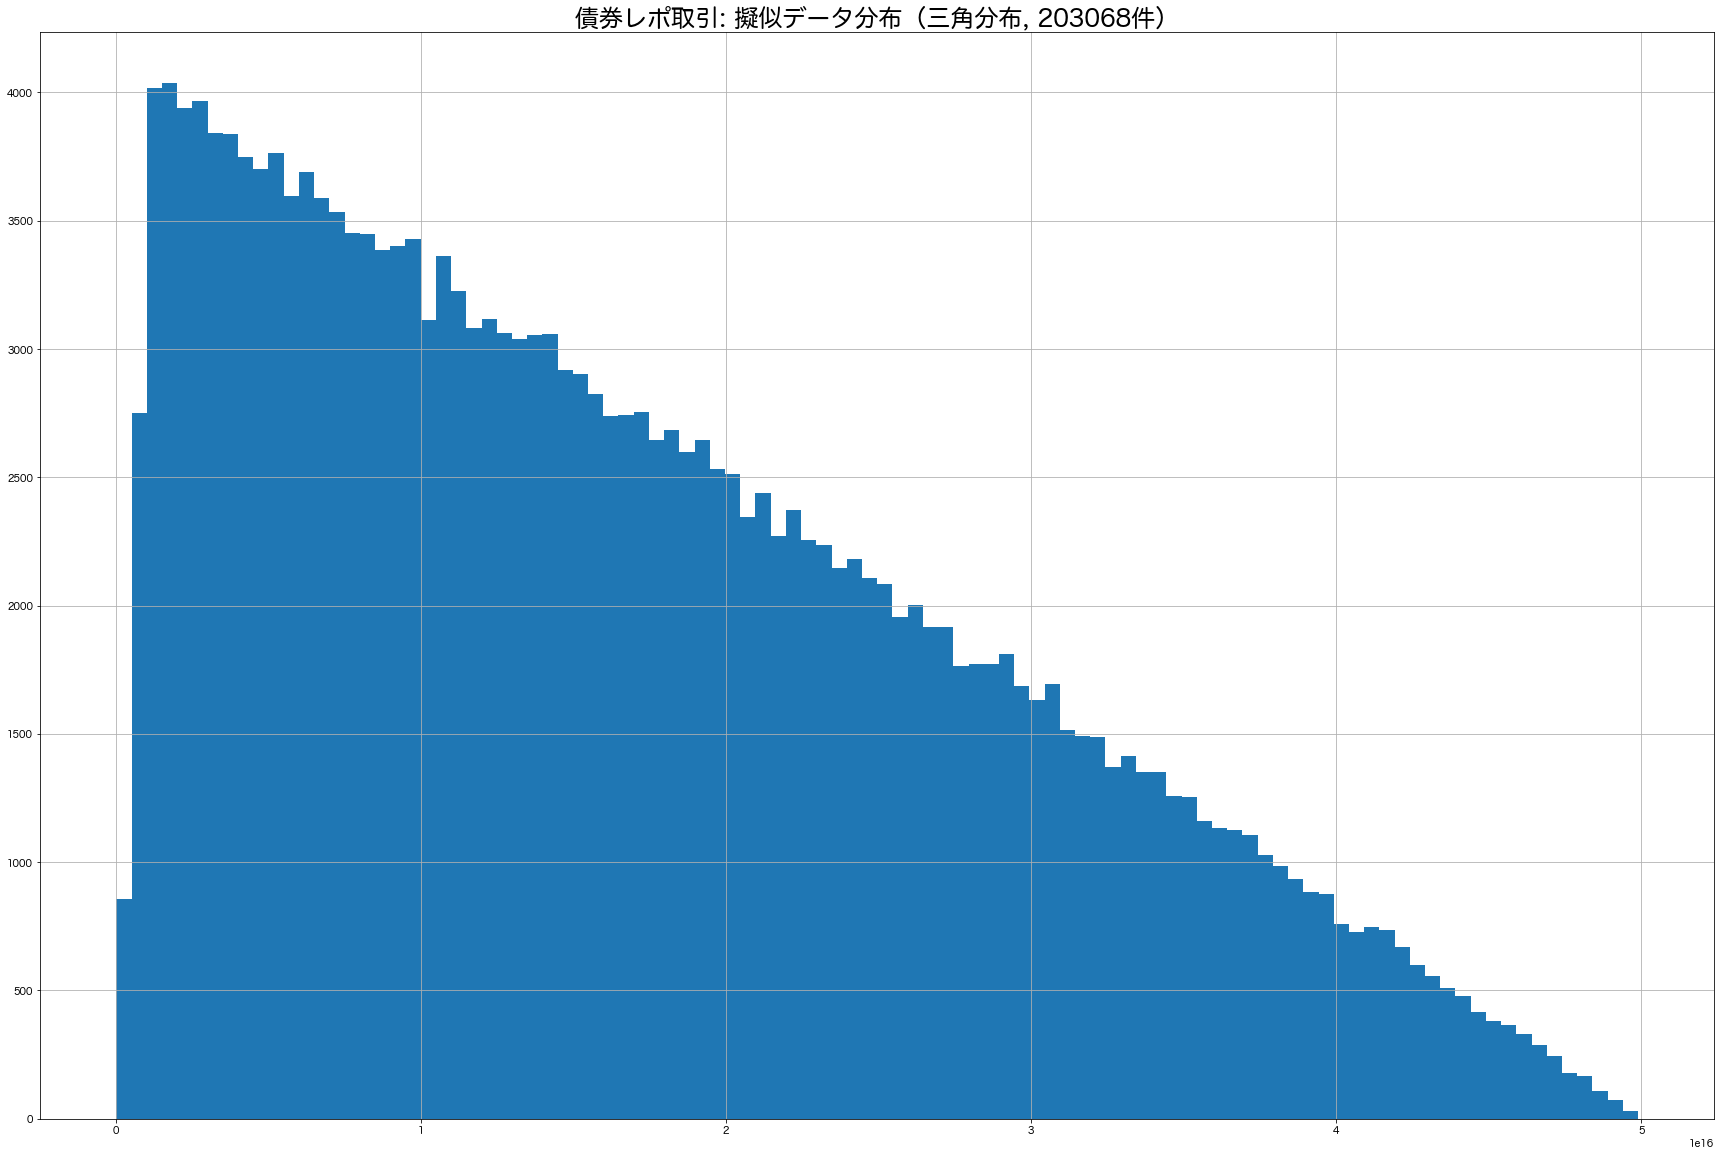

In [25]:
mock_bond_trade_8000_df = get_bond_price_df(b_trade_nums['100%']['bond'])

{'gc':                  0
 0     8.580279e+15
 1     2.753331e+15
 2     1.667391e+15
 3     1.468086e+15
 4     6.751486e+15
 ...            ...
 6193  1.525629e+15
 6194  5.694848e+15
 6195  8.402993e+14
 6196  2.984510e+15
 6197  2.136864e+15
 
 [6198 rows x 1 columns],
 'sc':                   0
 0      7.216693e+14
 1      4.694652e+14
 2      2.483840e+14
 3      2.611287e+14
 4      1.054932e+14
 ...             ...
 40082  4.033779e+14
 40083  5.012576e+14
 40084  8.553692e+14
 40085  6.113798e+14
 40086  4.003150e+14
 
 [40087 rows x 1 columns],
 'bond':                    0
 0       6.568320e+15
 1       1.168207e+16
 2       1.784163e+15
 3       6.370500e+15
 4       2.950779e+16
 ...              ...
 203063  2.098581e+16
 203064  5.113298e+15
 203065  1.328766e+16
 203066  1.576462e+16
 203067  1.689941e+16
 
 [203068 rows x 1 columns]}

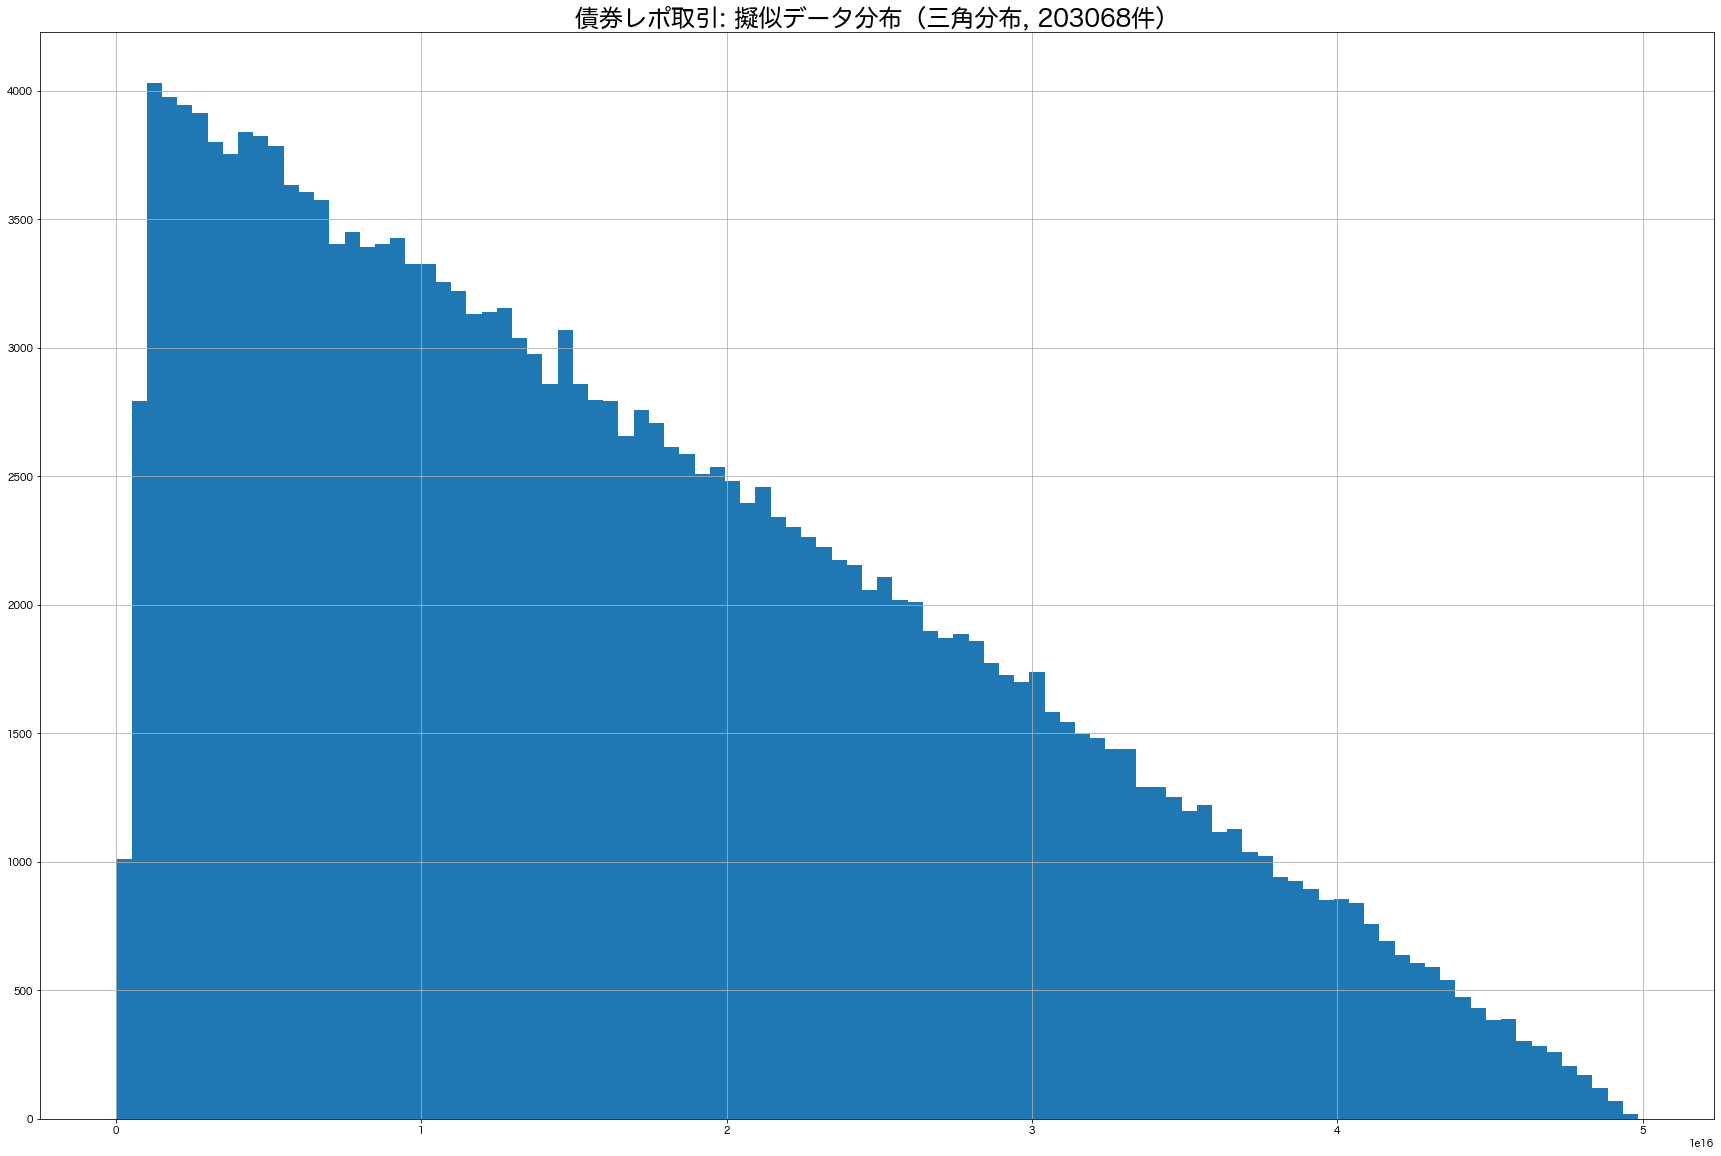

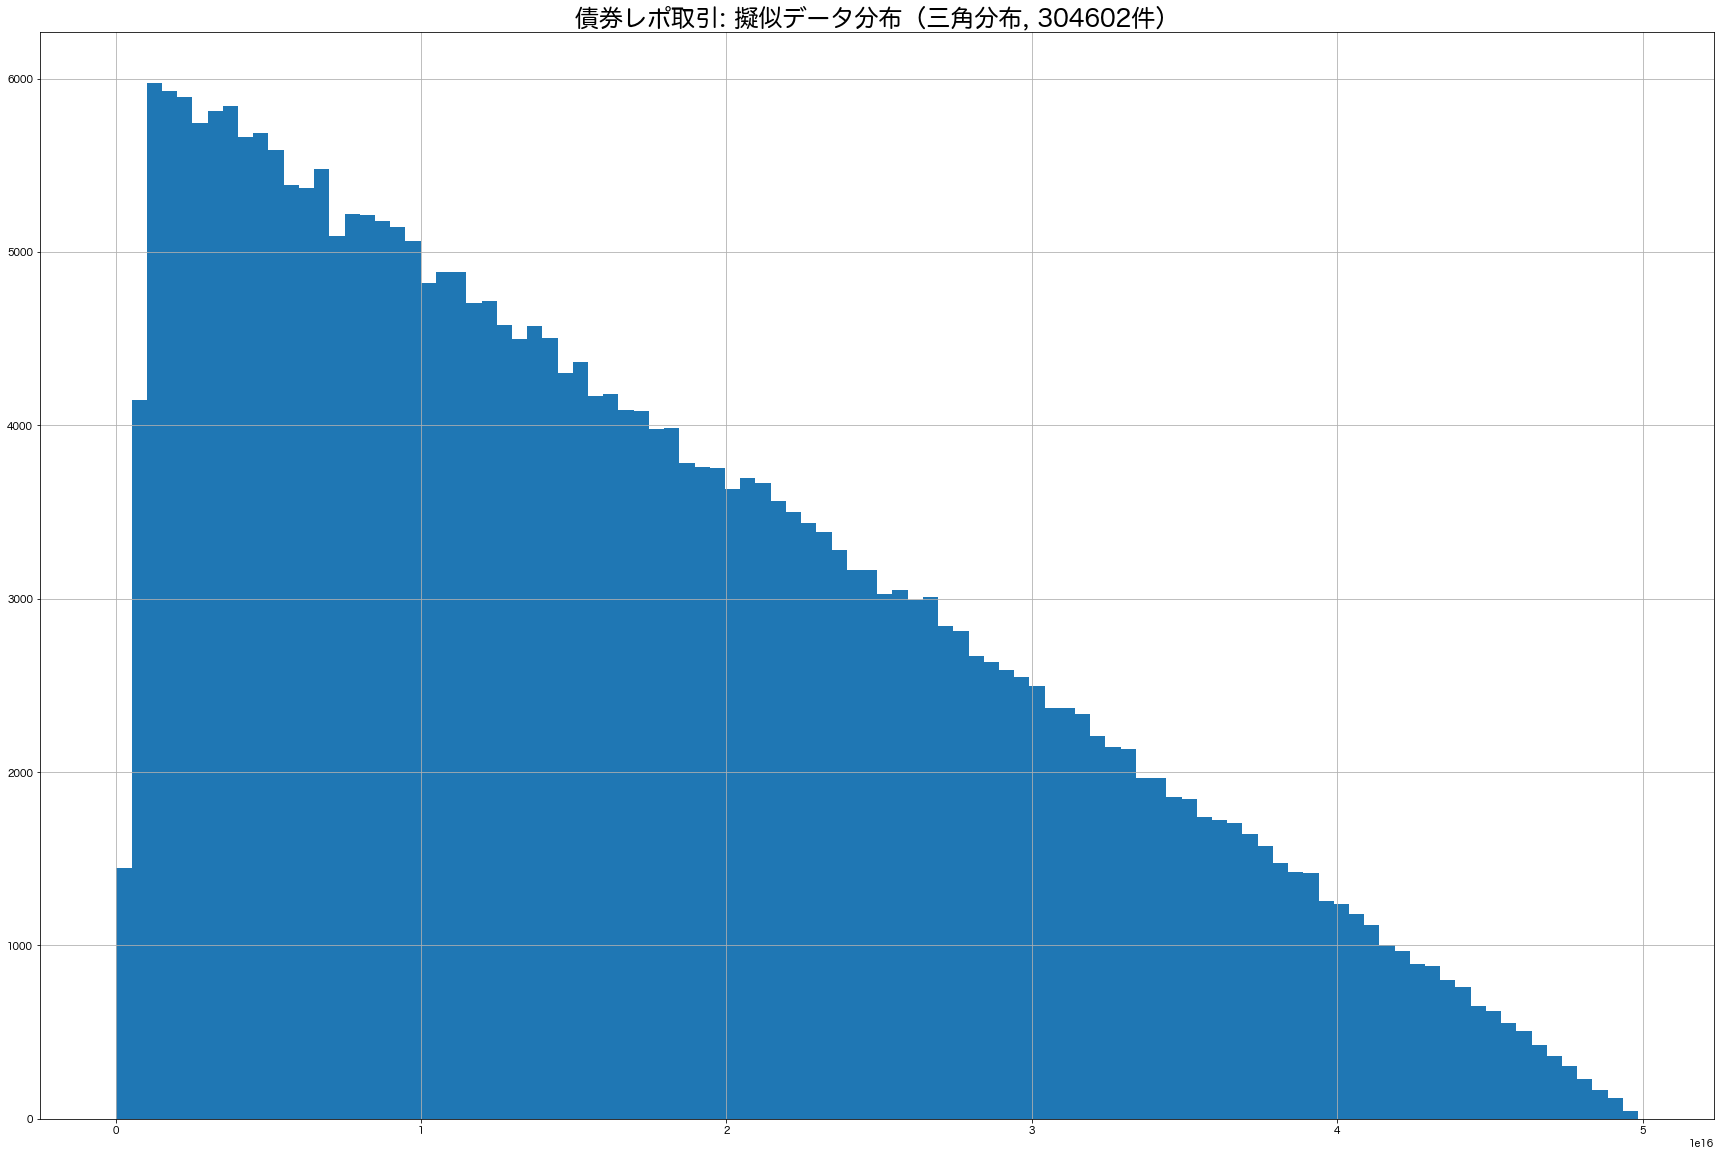

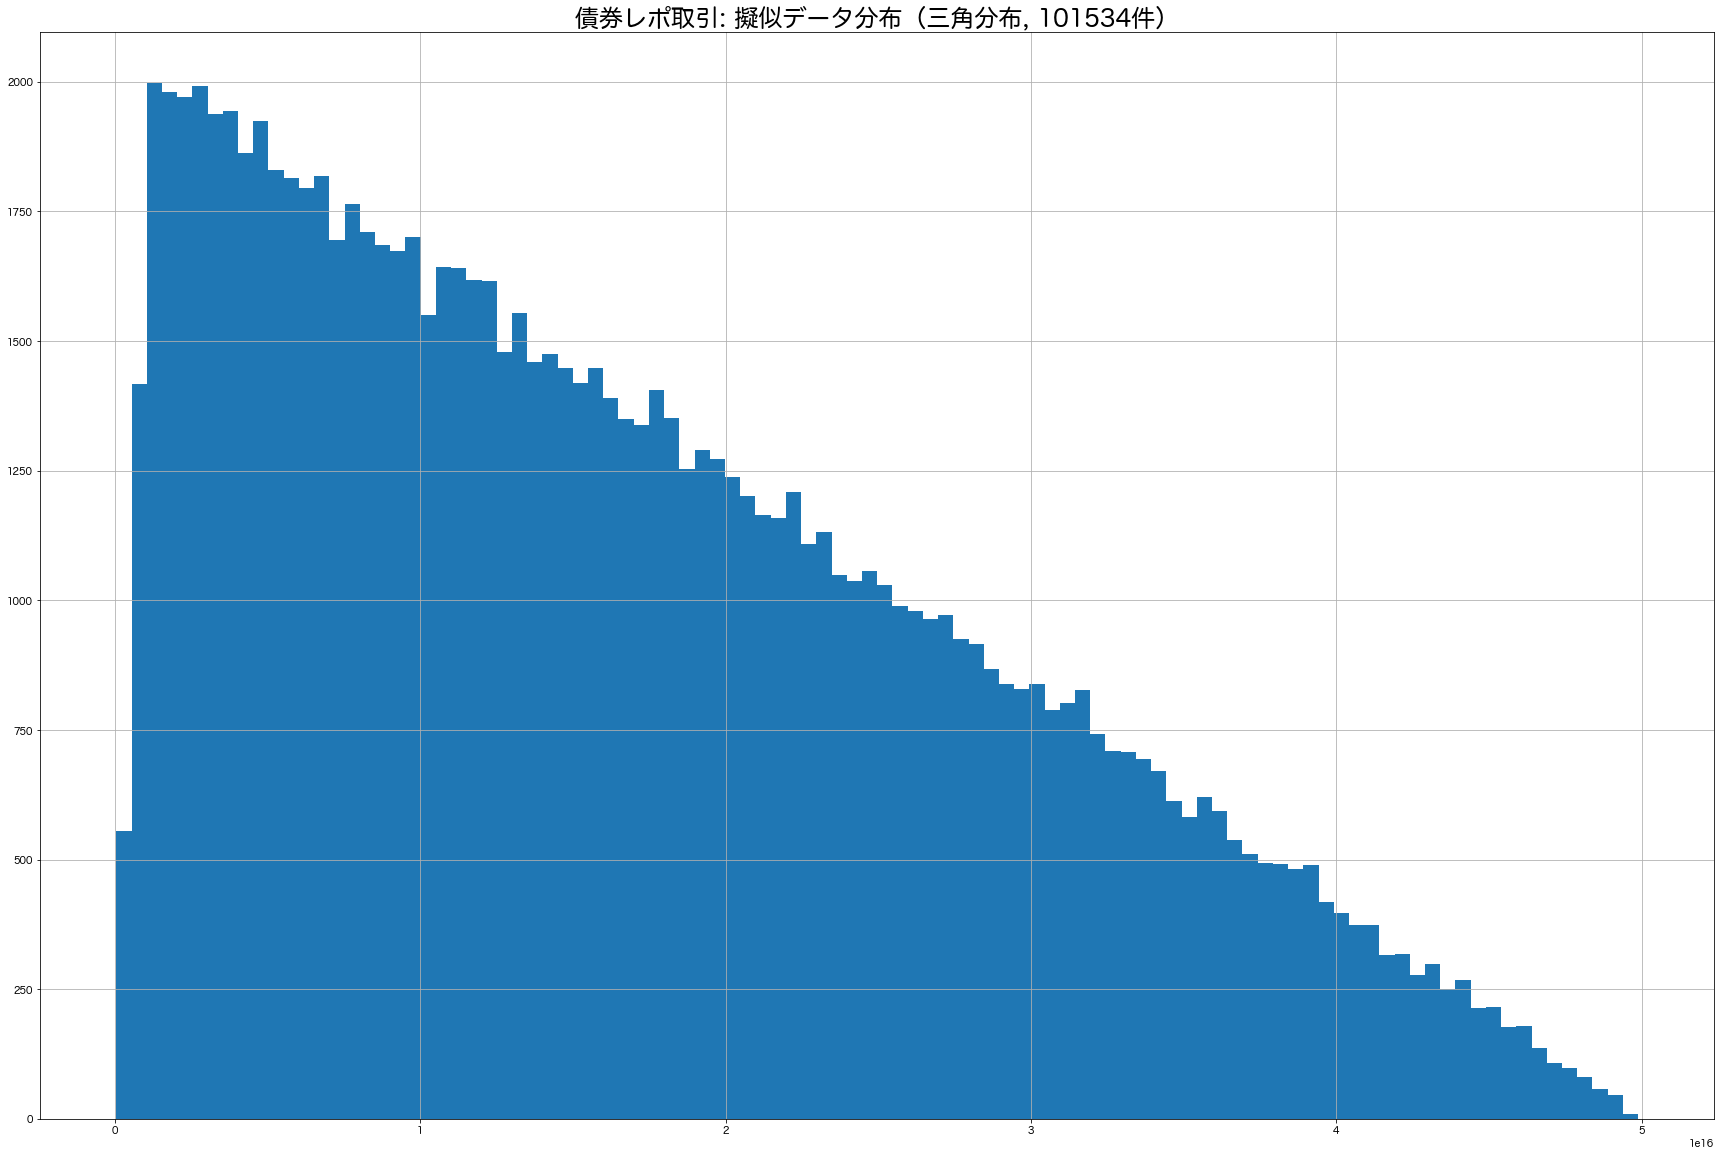

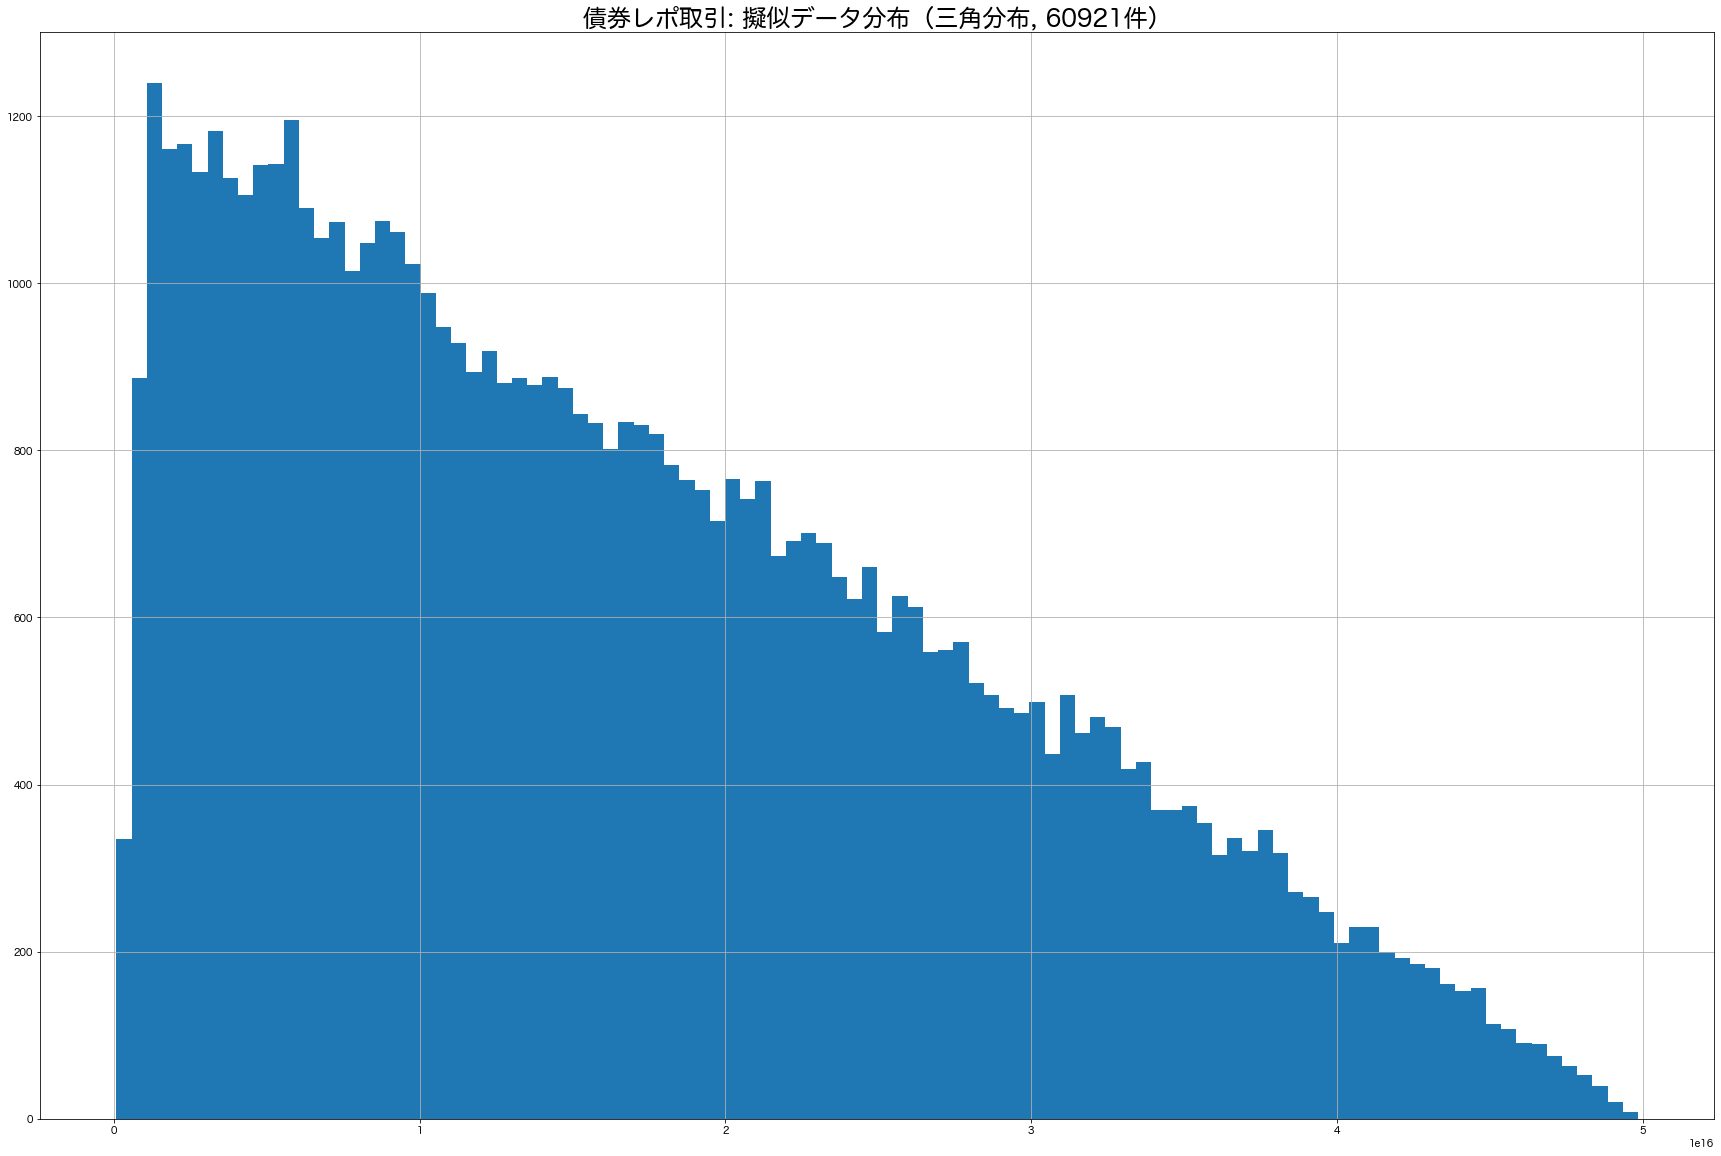

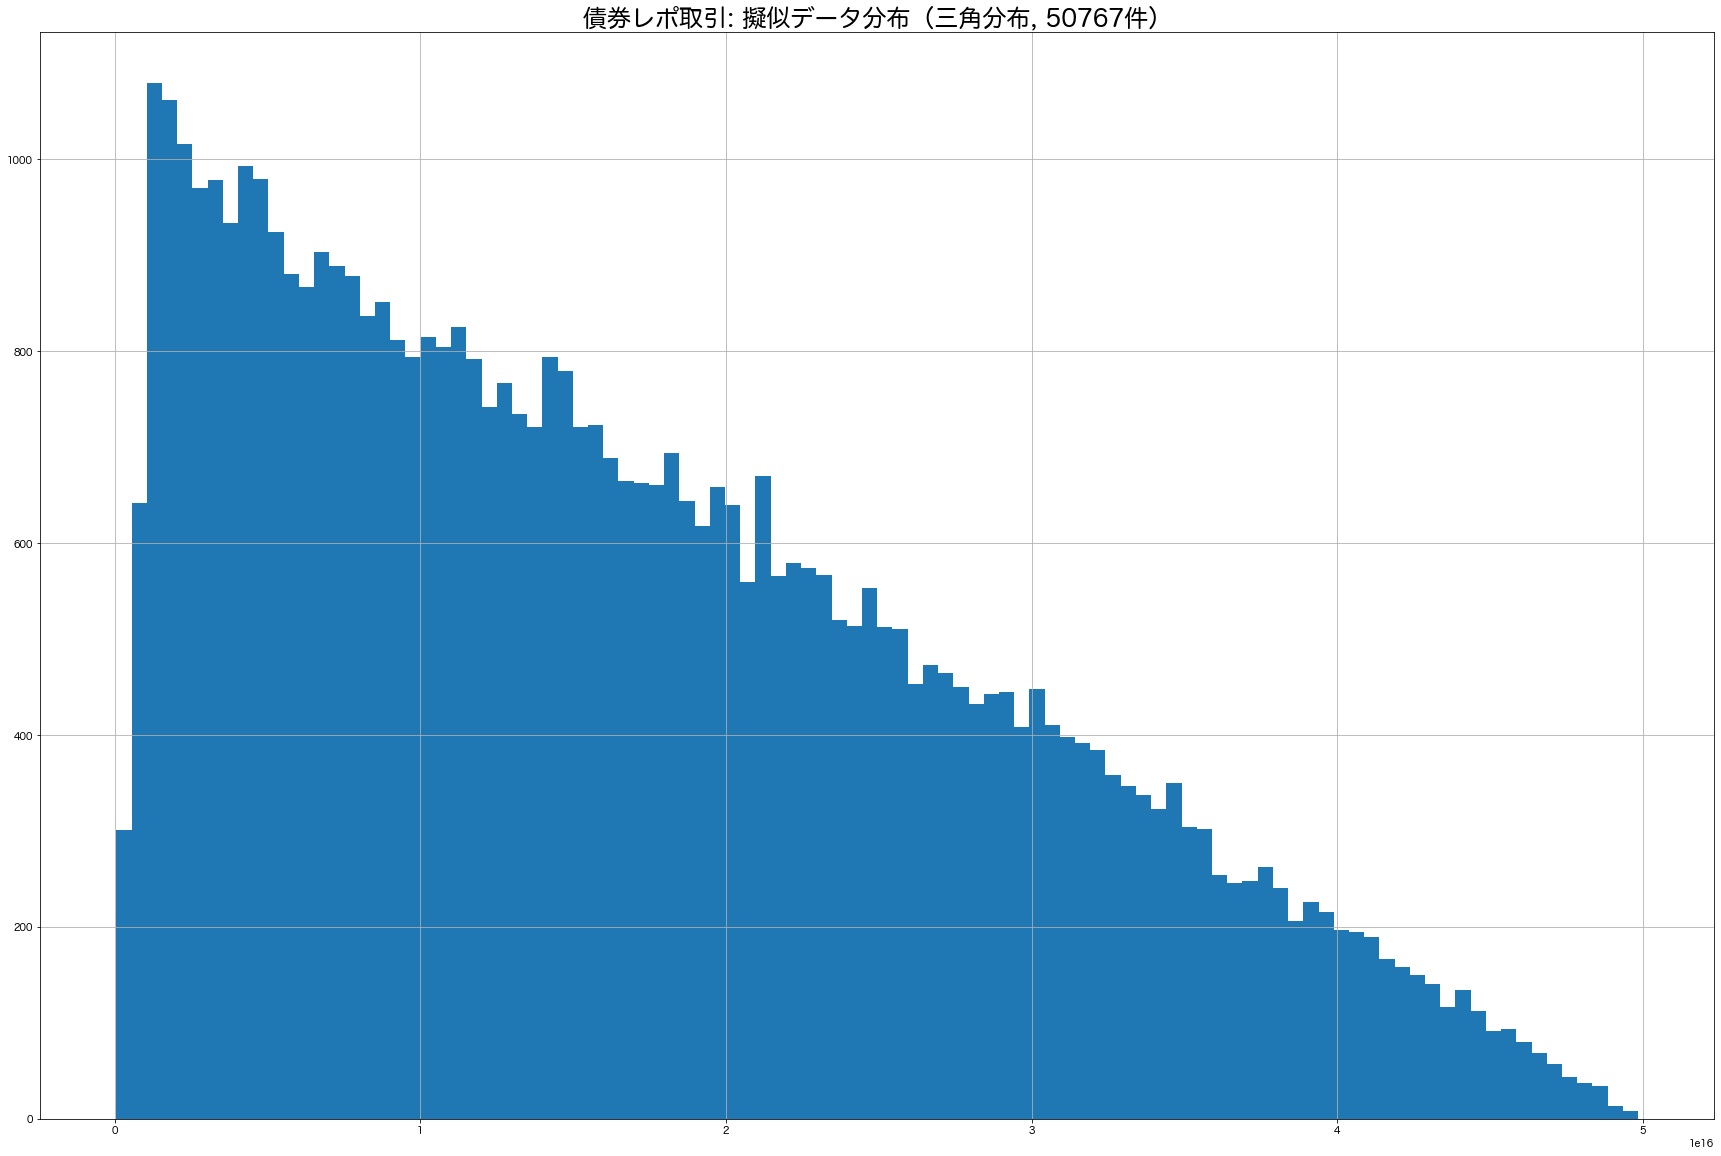

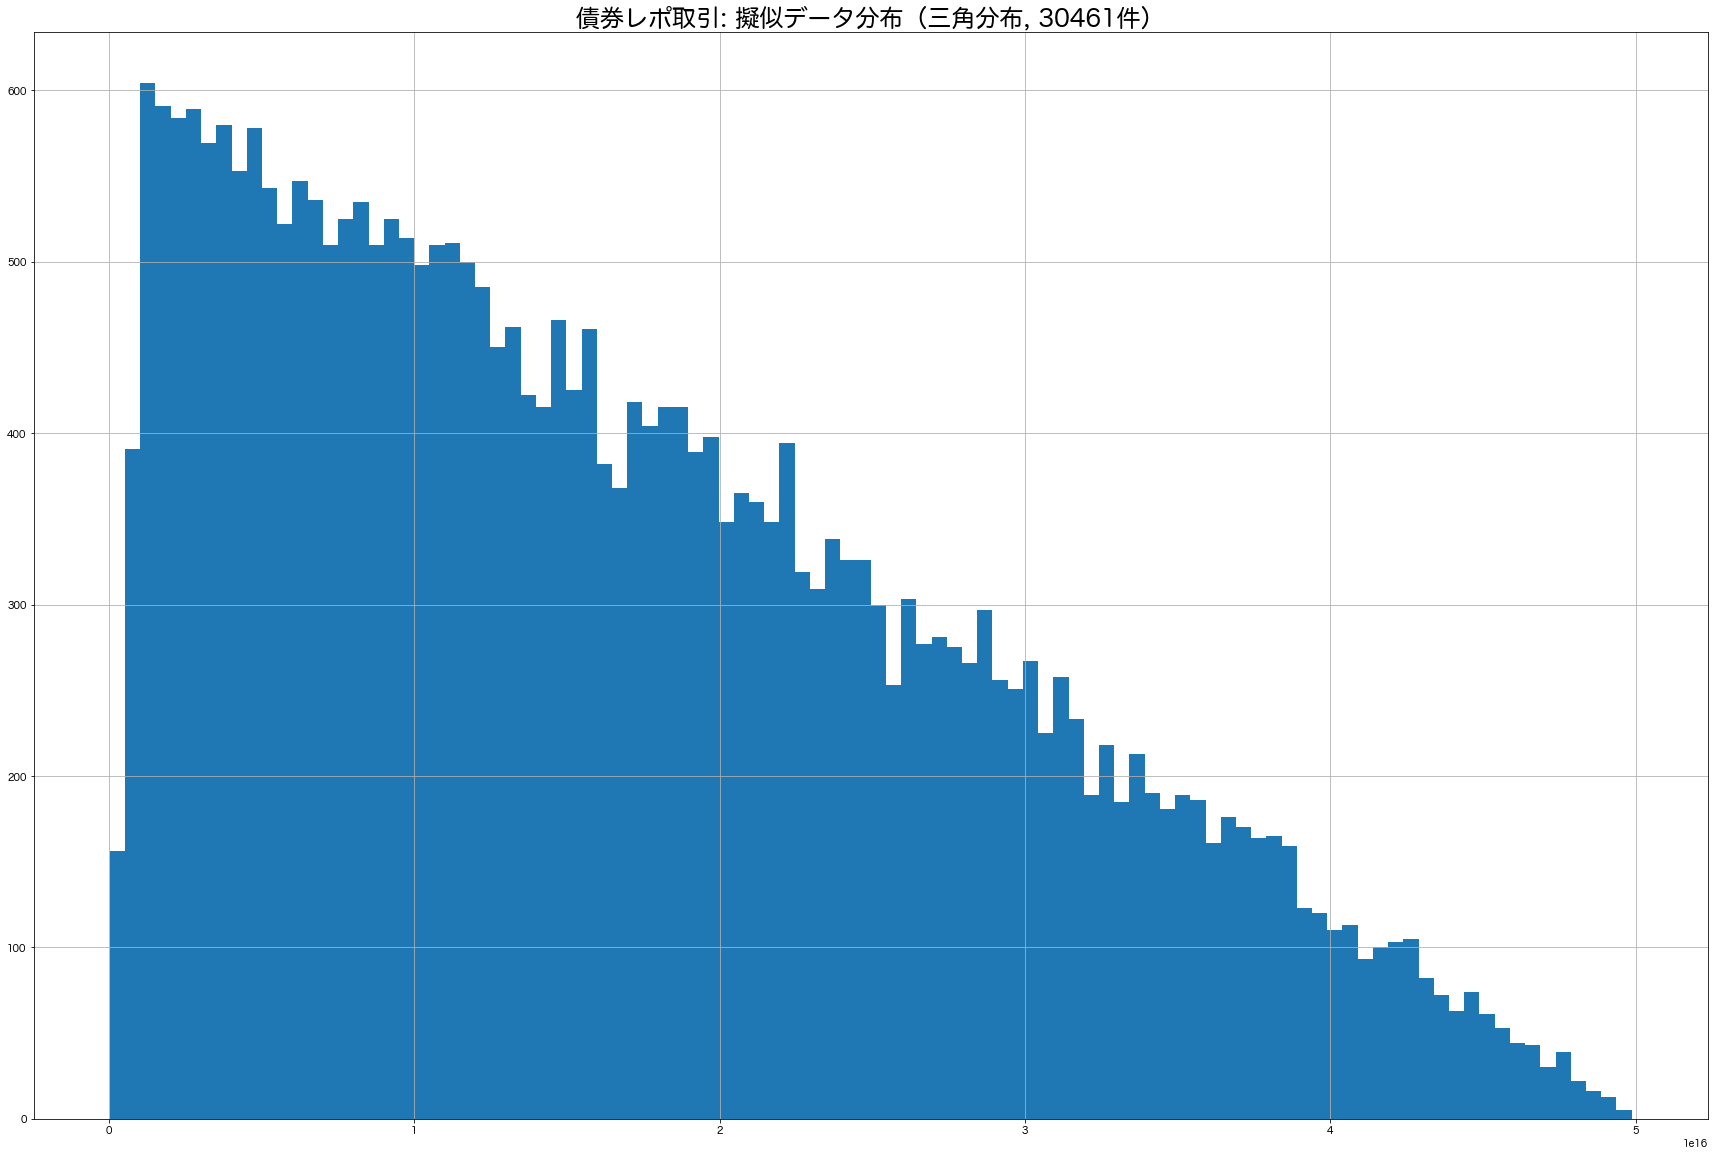

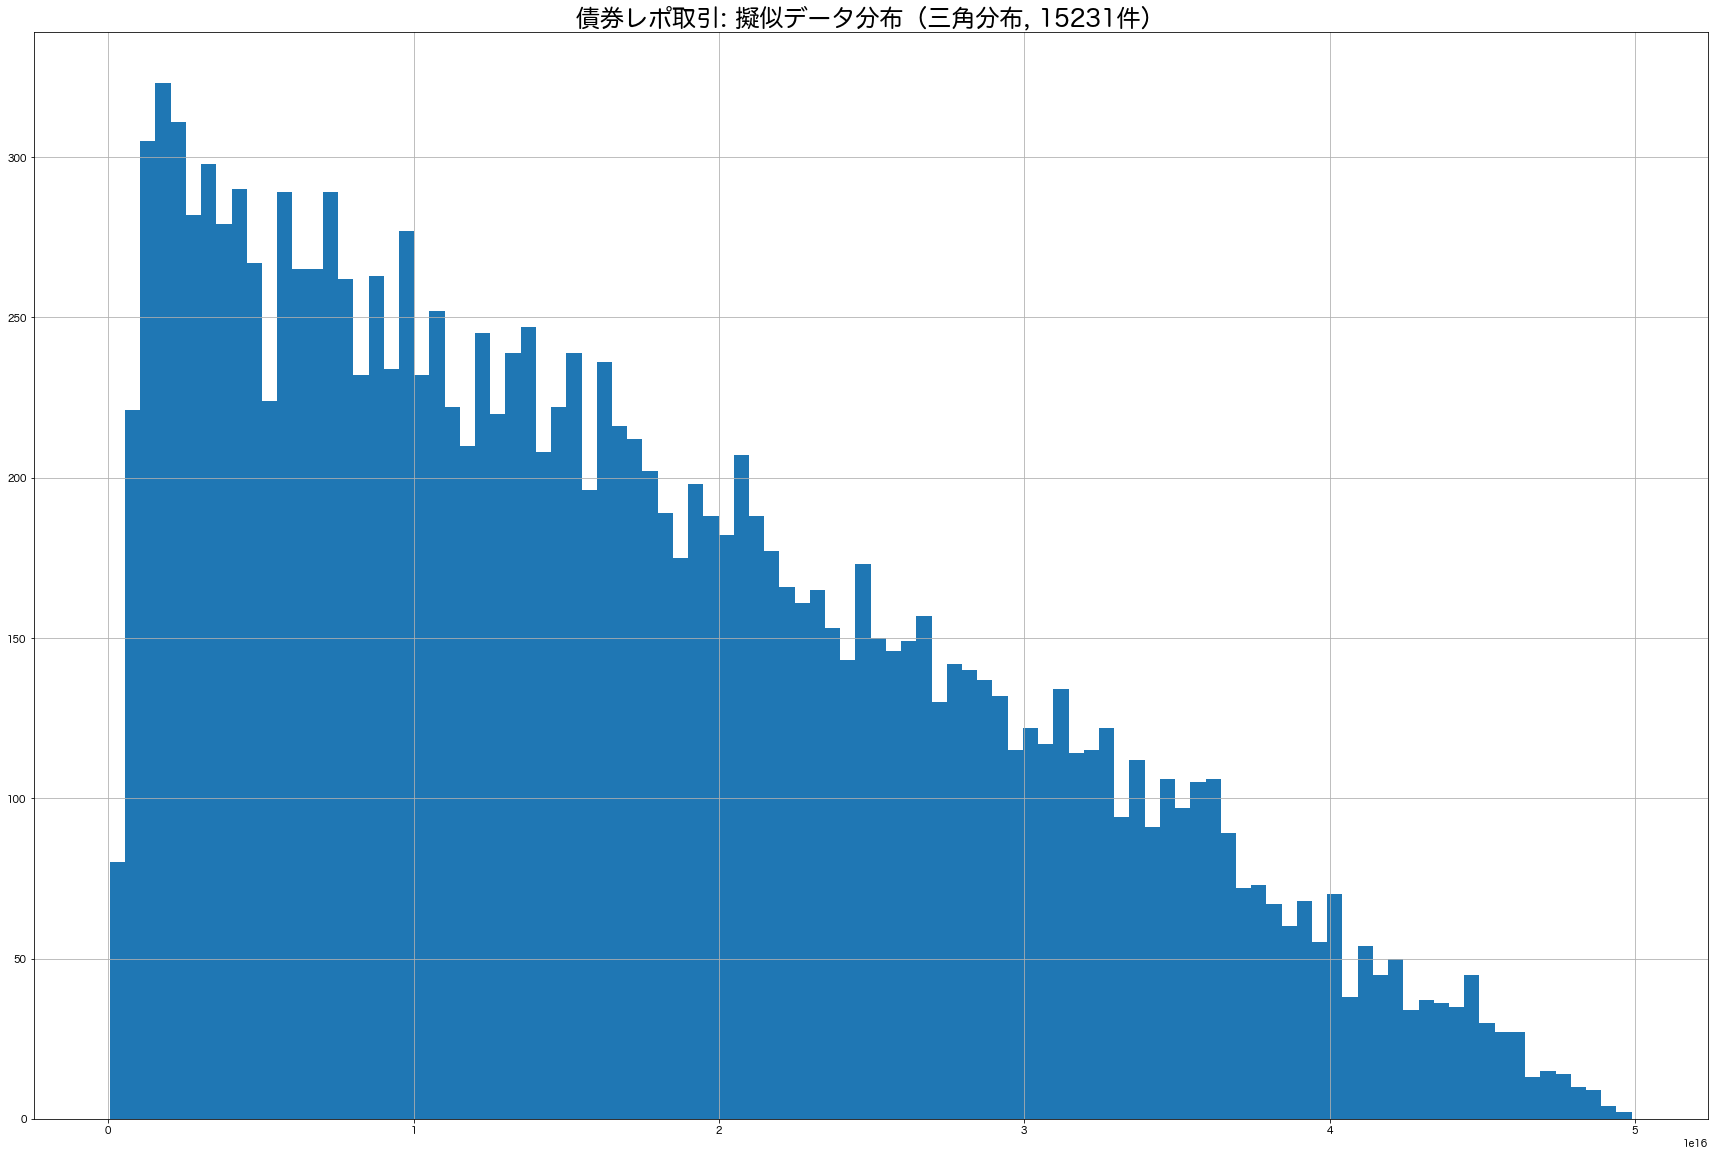

In [26]:
for _key, _value in b_trade_nums.items():
    _num = _value['bond']
    all_price_dfs[_key]['bond'] = get_bond_price_df(_num)
all_price_dfs['100%']

### Number of securities per trade

In [27]:
# security_num_df を格納するobjの初期化
all_security_num_dfs = {
    '100%': {},
    '150%': {},
    '50%': {},
    '30%': {},
    '25%': {},
    '15%': {},
    '7.5%': {},
}

#### GC取引

株レポ: GC取引銘柄数
         1   2~10  11~50  51~100    101~
ratio  0.1   0.45    0.3     0.1    0.05
min    1.0   2.00   11.0    51.0  101.00
max    1.0  10.00   50.0   100.0  200.00


Text(0.5, 1.0, '株レポGC取引: 銘柄数')

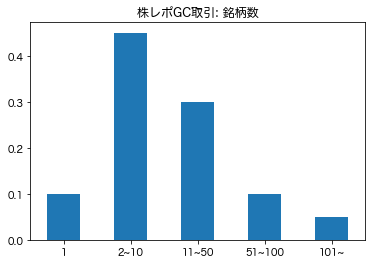

In [28]:
security_num_column_labels = ['1', '2~10', '11~50', '51~100', '101~']
gc_security_num_dist = pd.DataFrame([[0.1, 0.45, 0.3, 0.1, 0.05], [1, 2, 11, 51, 101], [1, 10, 50, 100, 200]],
                             columns=security_num_column_labels,
                             index=['ratio', 'min', 'max'])
gc_security_num_ave = 24.55
print('株レポ: GC取引銘柄数')
pprint(gc_security_num_dist)
print('='*50)

gc_security_num_dist.T['ratio'].plot(kind='bar', rot=0)
plt.title('株レポGC取引: 銘柄数')

Text(0.5, 1.0, '株レポGC取引: ヒストグラム')

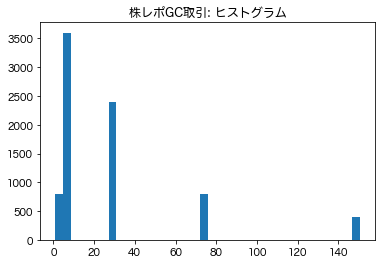

In [29]:
gc_trade_num = 8000
gc_ave_security_num_list = (gc_security_num_dist.T['min'] + gc_security_num_dist.T['max']) / 2
gc_security_num_sample = [[ave]*int(gc_security_num_dist.T['ratio'][index] * gc_trade_num)  for (index, ave) in enumerate(gc_ave_security_num_list)]

plt.hist(list(itertools.chain.from_iterable(gc_security_num_sample)), bins=40)
plt.title('株レポGC取引: ヒストグラム')

In [30]:
def get_gc_num_df(trade_num):
    gc_security_num_max = gc_security_num_dist['101~']['max']
    gc_security_num_min = gc_security_num_dist['1']['min'] - 1
    mock_gc_security_num_df = pd.DataFrame(np.ceil(np.random.triangular(gc_security_num_min, gc_security_num_ave, gc_security_num_max, trade_num)), dtype=int)
    mock_gc_security_num_df.hist(bins=100, figsize=(30, 20), xlabelsize=20, ylabelsize=20)
    plt.title('株レポGC取引: 擬似データ分布（三角分布）')
    return mock_gc_security_num_df

,0
0,109
1,74
2,86
3,116
4,59
...,...
1753,59
1754,83
1755,44
1756,96


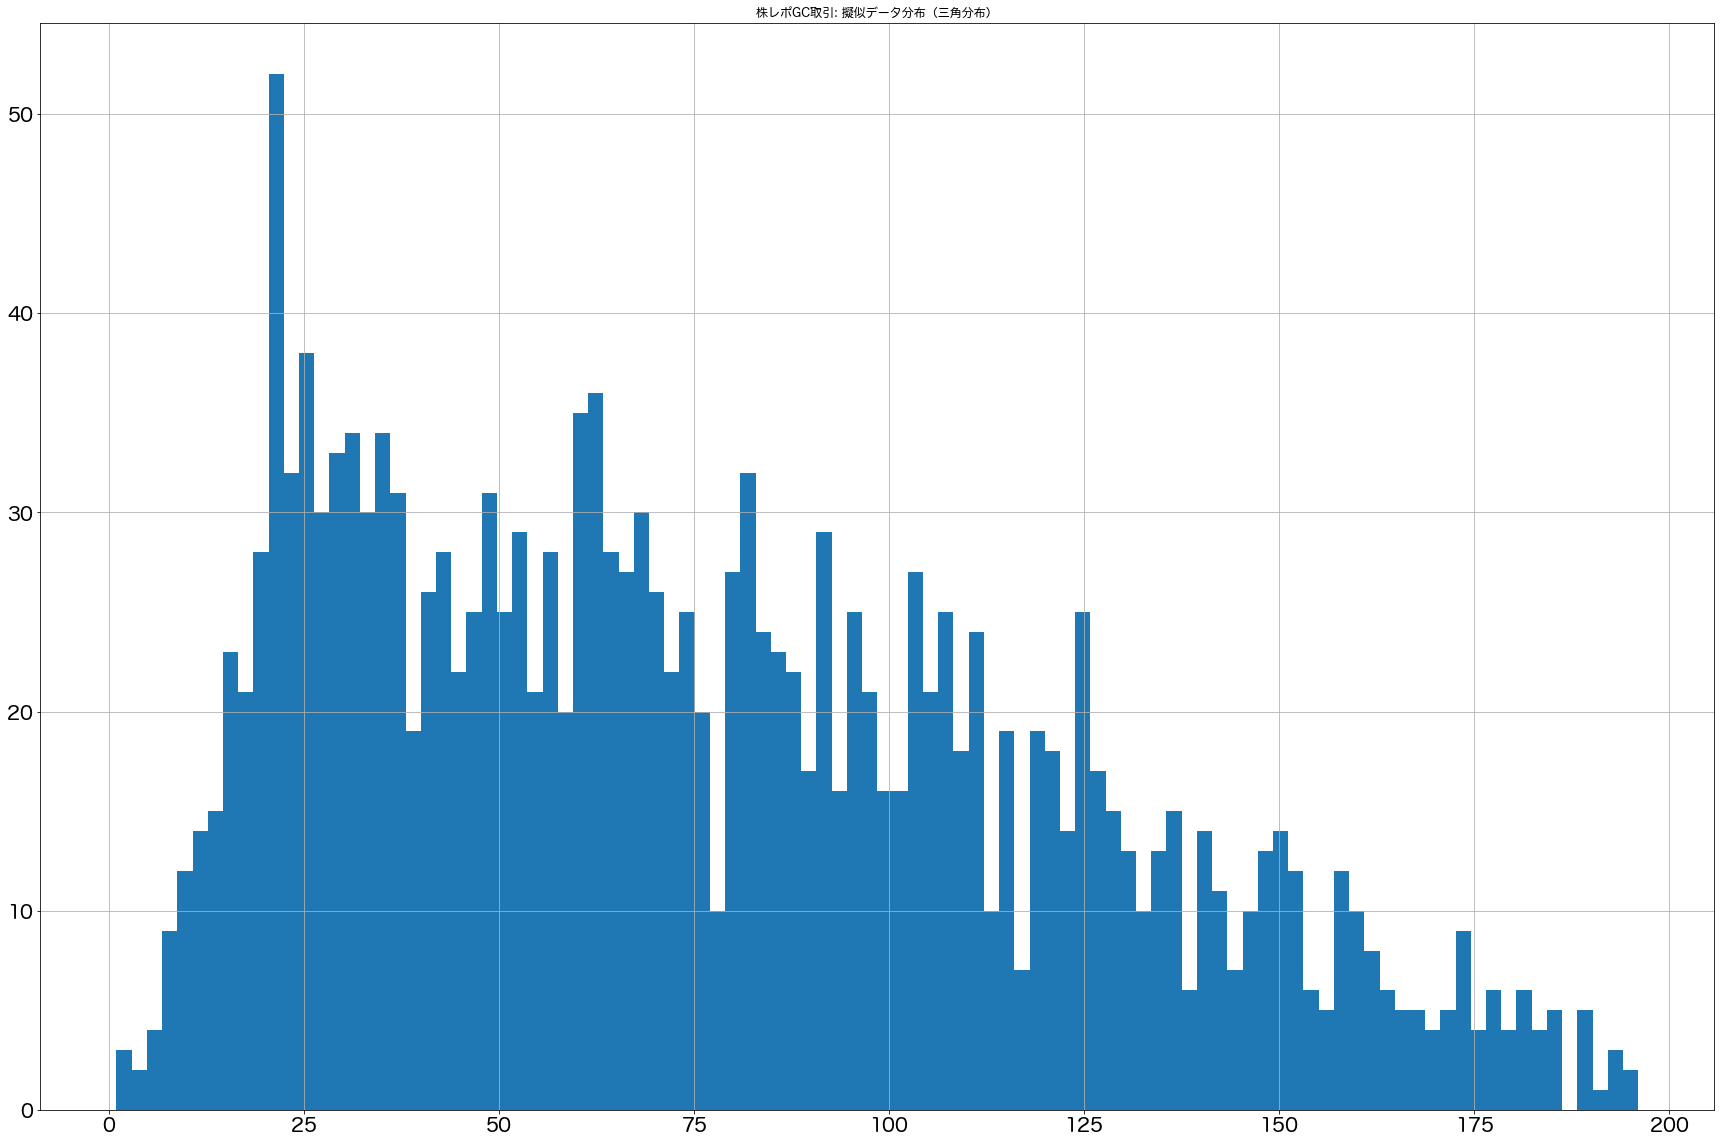

In [31]:
# 三角分布で類似分布を作成
get_gc_num_df(b_security_nums['100%']['stock'])

{'100%': {'gc':         0
  0      26
  1      18
  2      64
  3      24
  4      70
  ...   ...
  6193   74
  6194   66
  6195   84
  6196  148
  6197   20
  
  [6198 rows x 1 columns]},
 '150%': {'gc':         0
  0      15
  1      28
  2      46
  3     181
  4      30
  ...   ...
  9292  156
  9293   38
  9294    9
  9295   68
  9296   36
  
  [9297 rows x 1 columns]},
 '50%': {'gc':         0
  0      39
  1      24
  2      40
  3      91
  4      79
  ...   ...
  3094   45
  3095  126
  3096   77
  3097   68
  3098  147
  
  [3099 rows x 1 columns]},
 '30%': {'gc':         0
  0     109
  1     129
  2      79
  3     111
  4      21
  ...   ...
  1855   13
  1856   63
  1857   27
  1858  120
  1859   70
  
  [1860 rows x 1 columns]},
 '25%': {'gc':         0
  0      58
  1     128
  2      76
  3      53
  4      84
  ...   ...
  1545   68
  1546   37
  1547   37
  1548  122
  1549   57
  
  [1550 rows x 1 columns]},
 '15%': {'gc':        0
  0     60
  1     87
  2    116
 

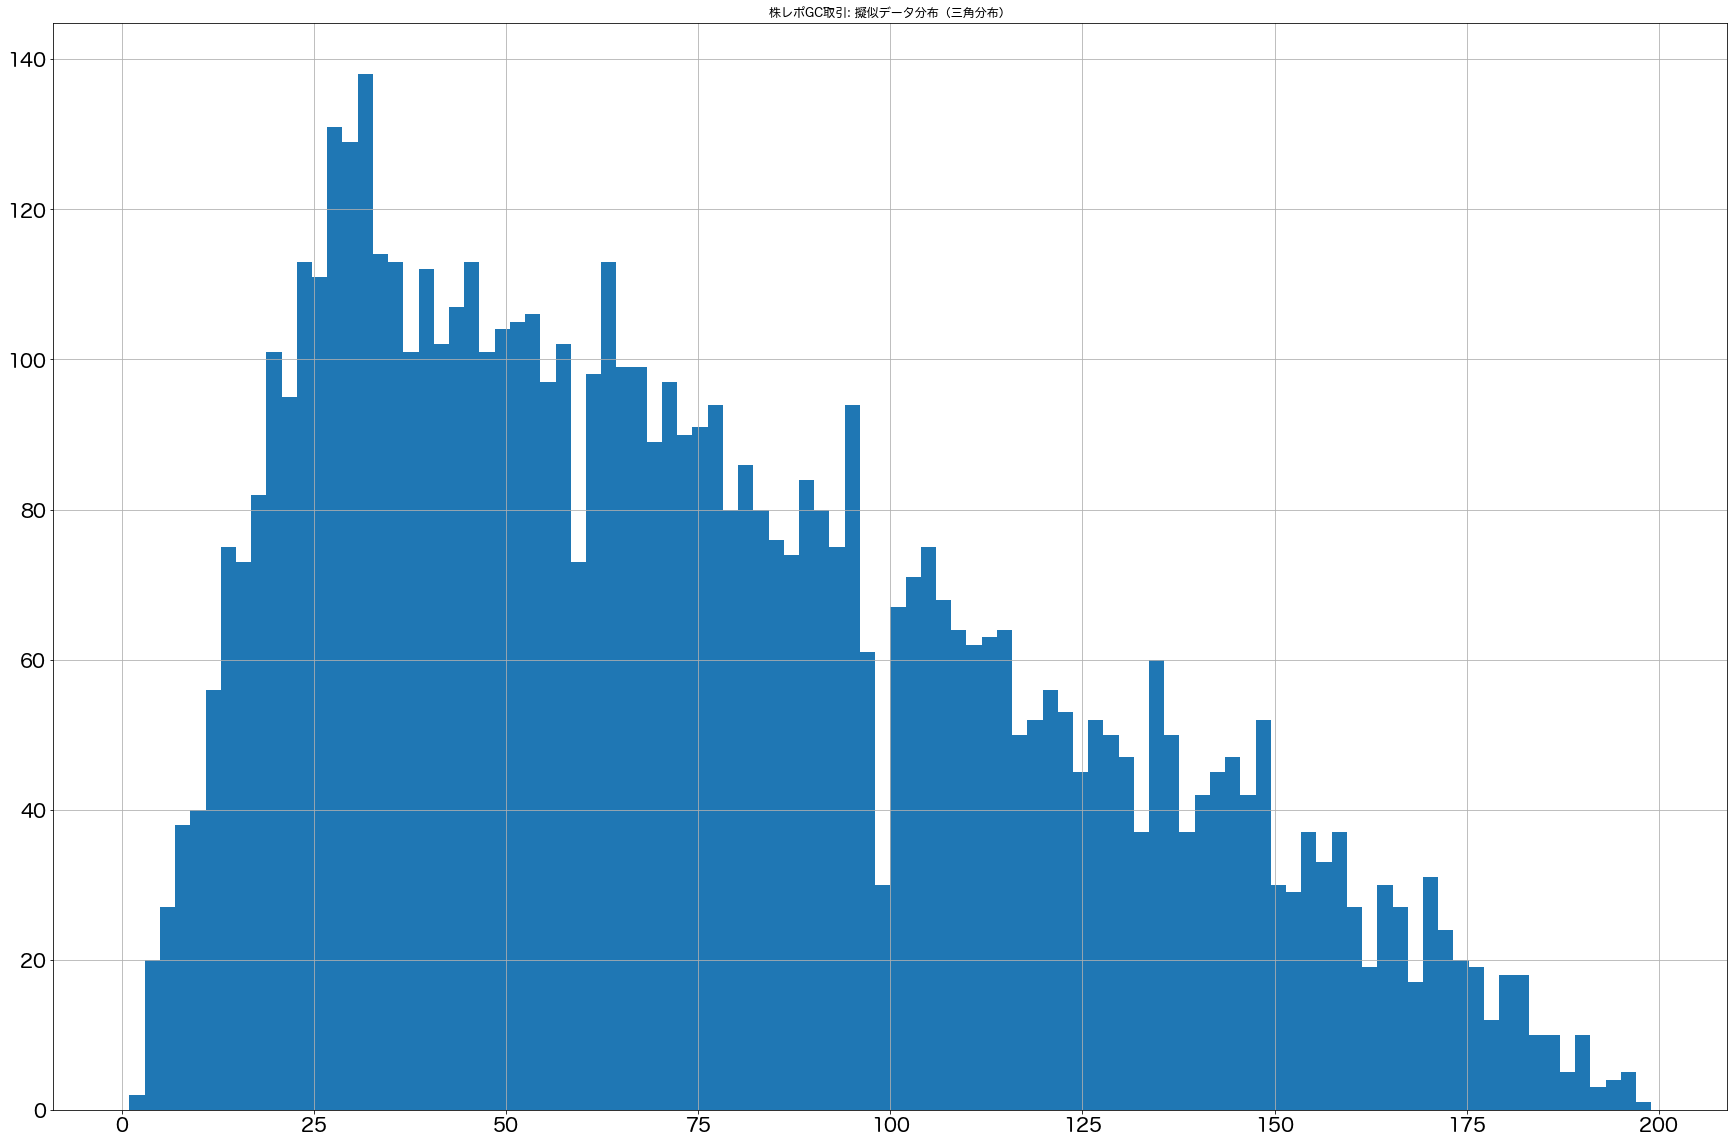

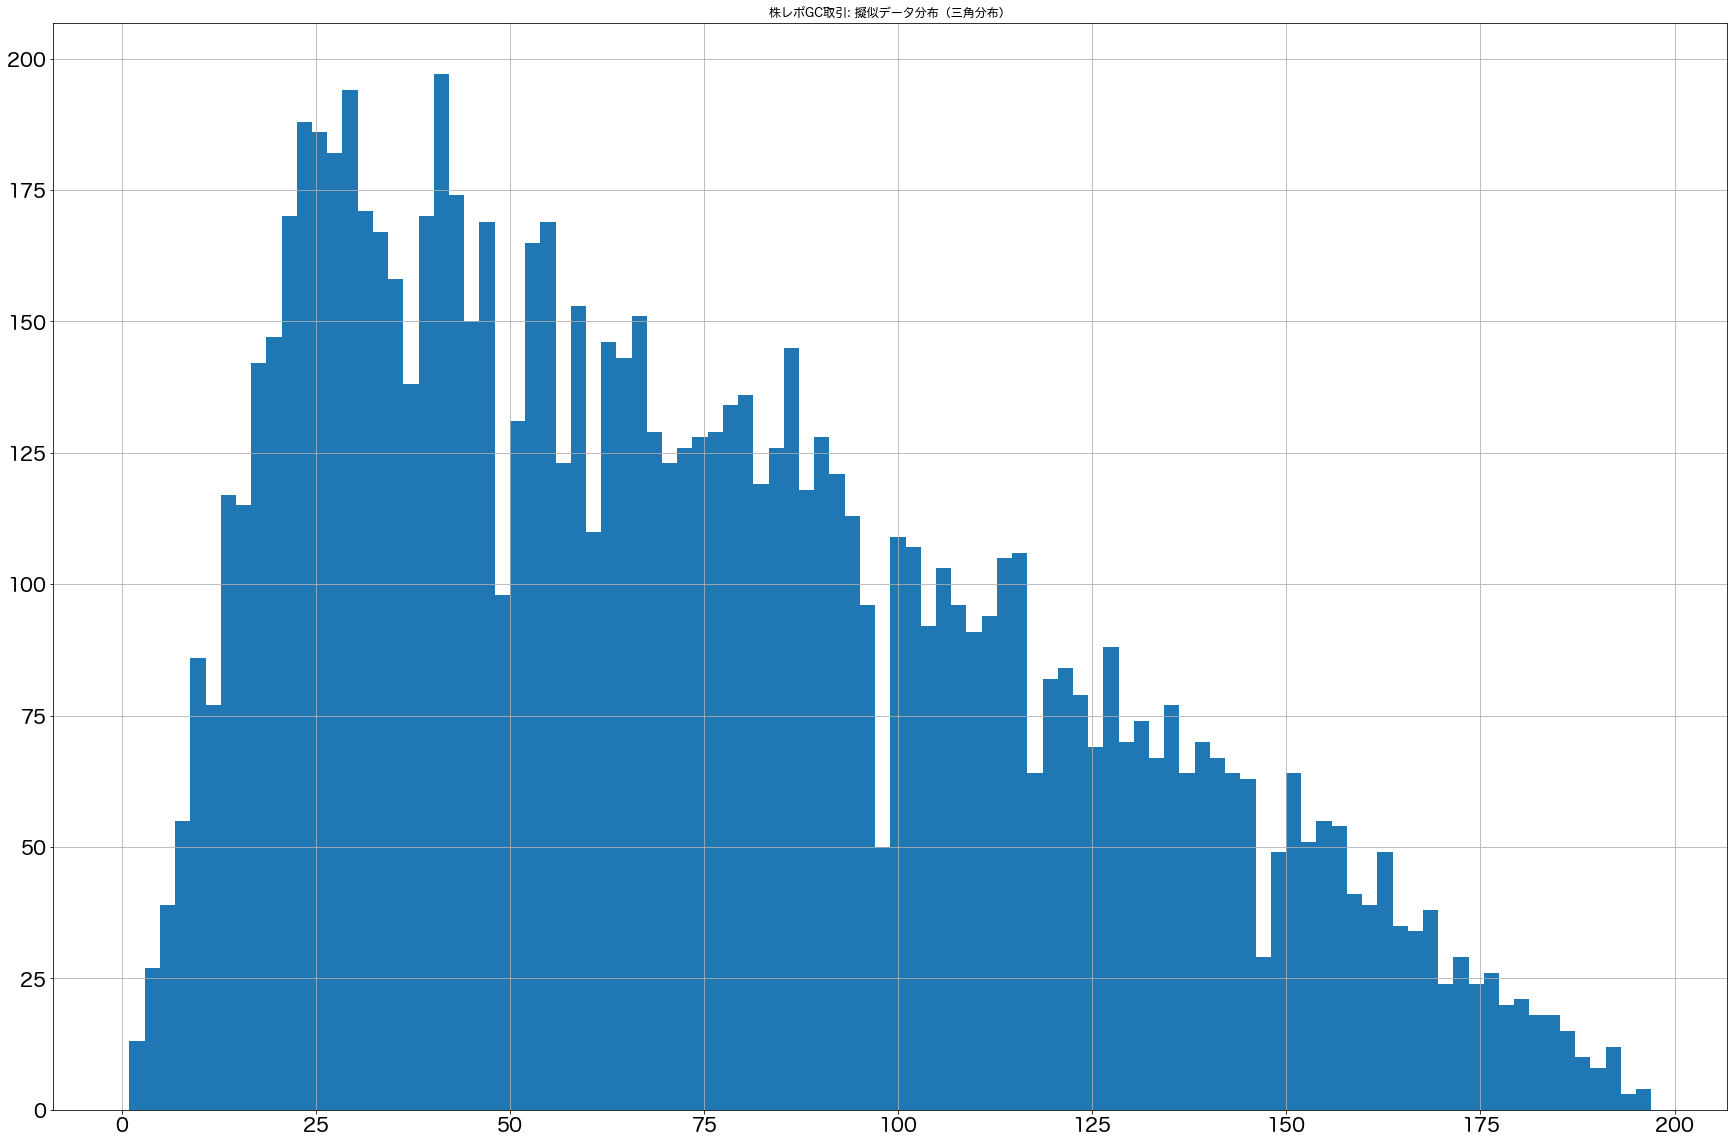

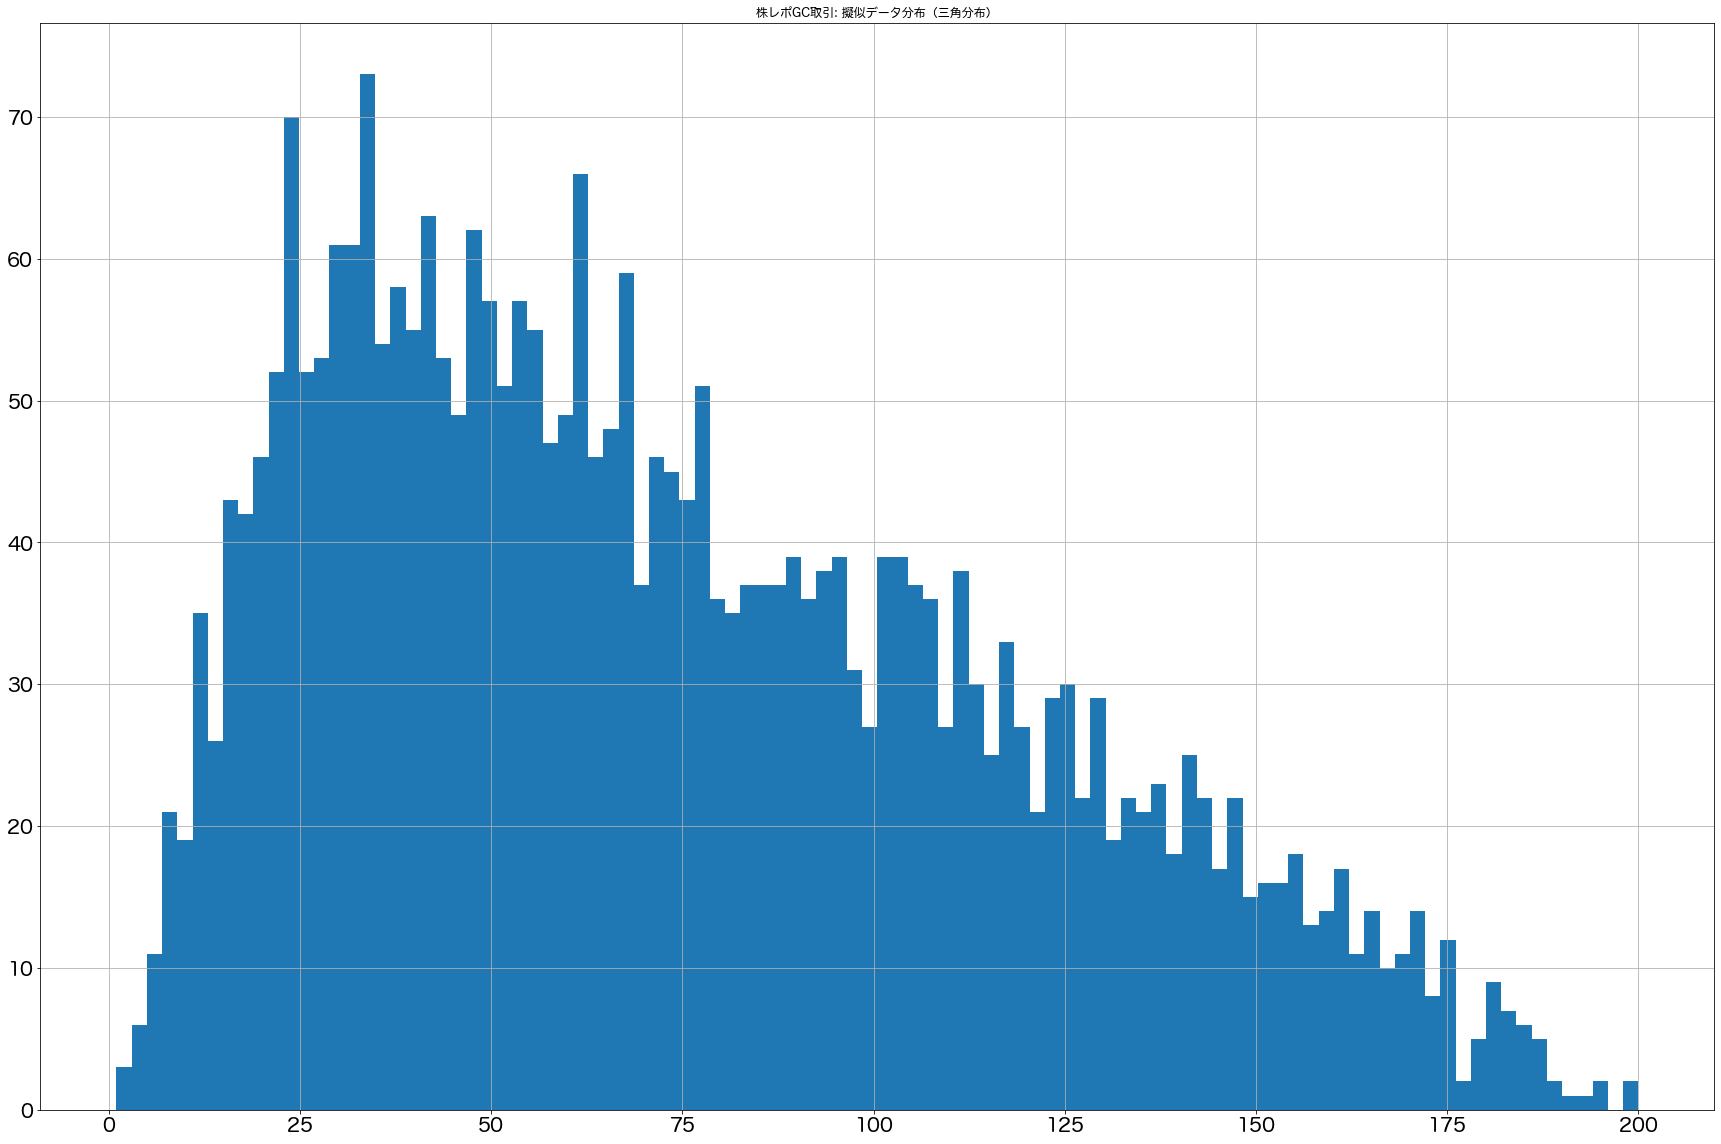

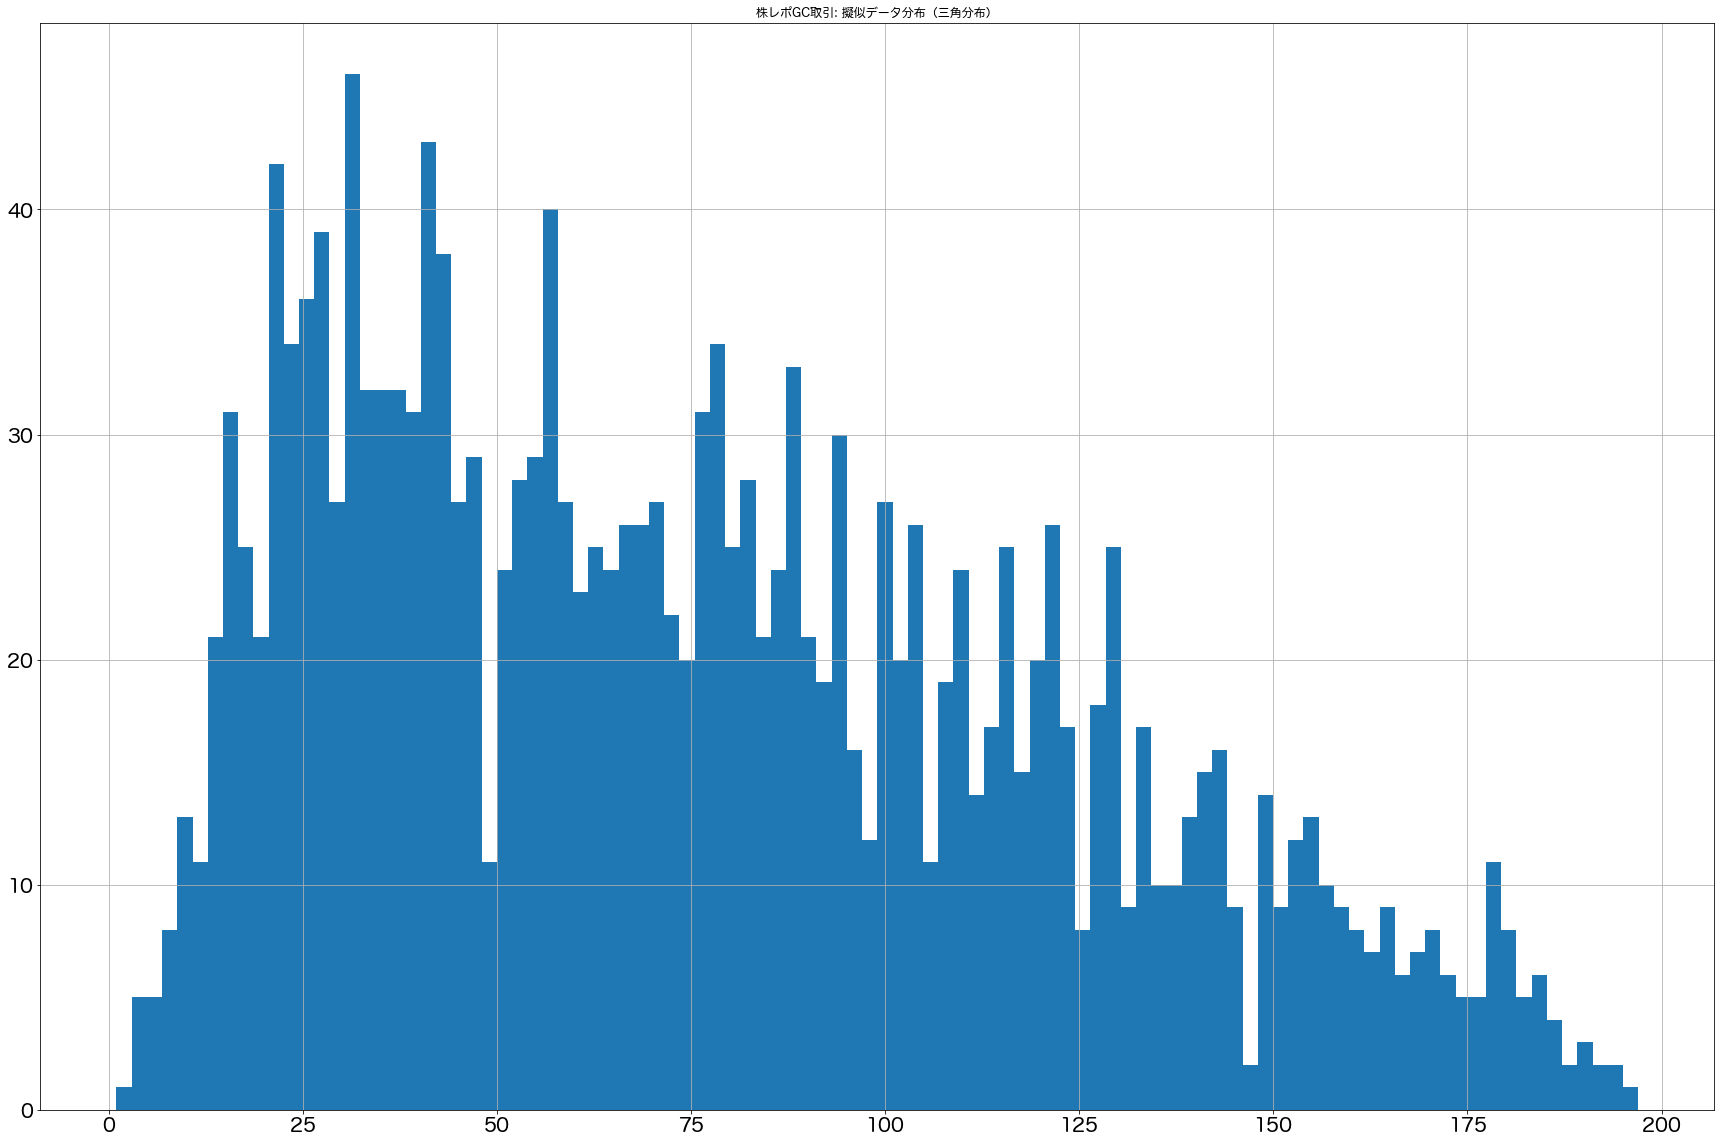

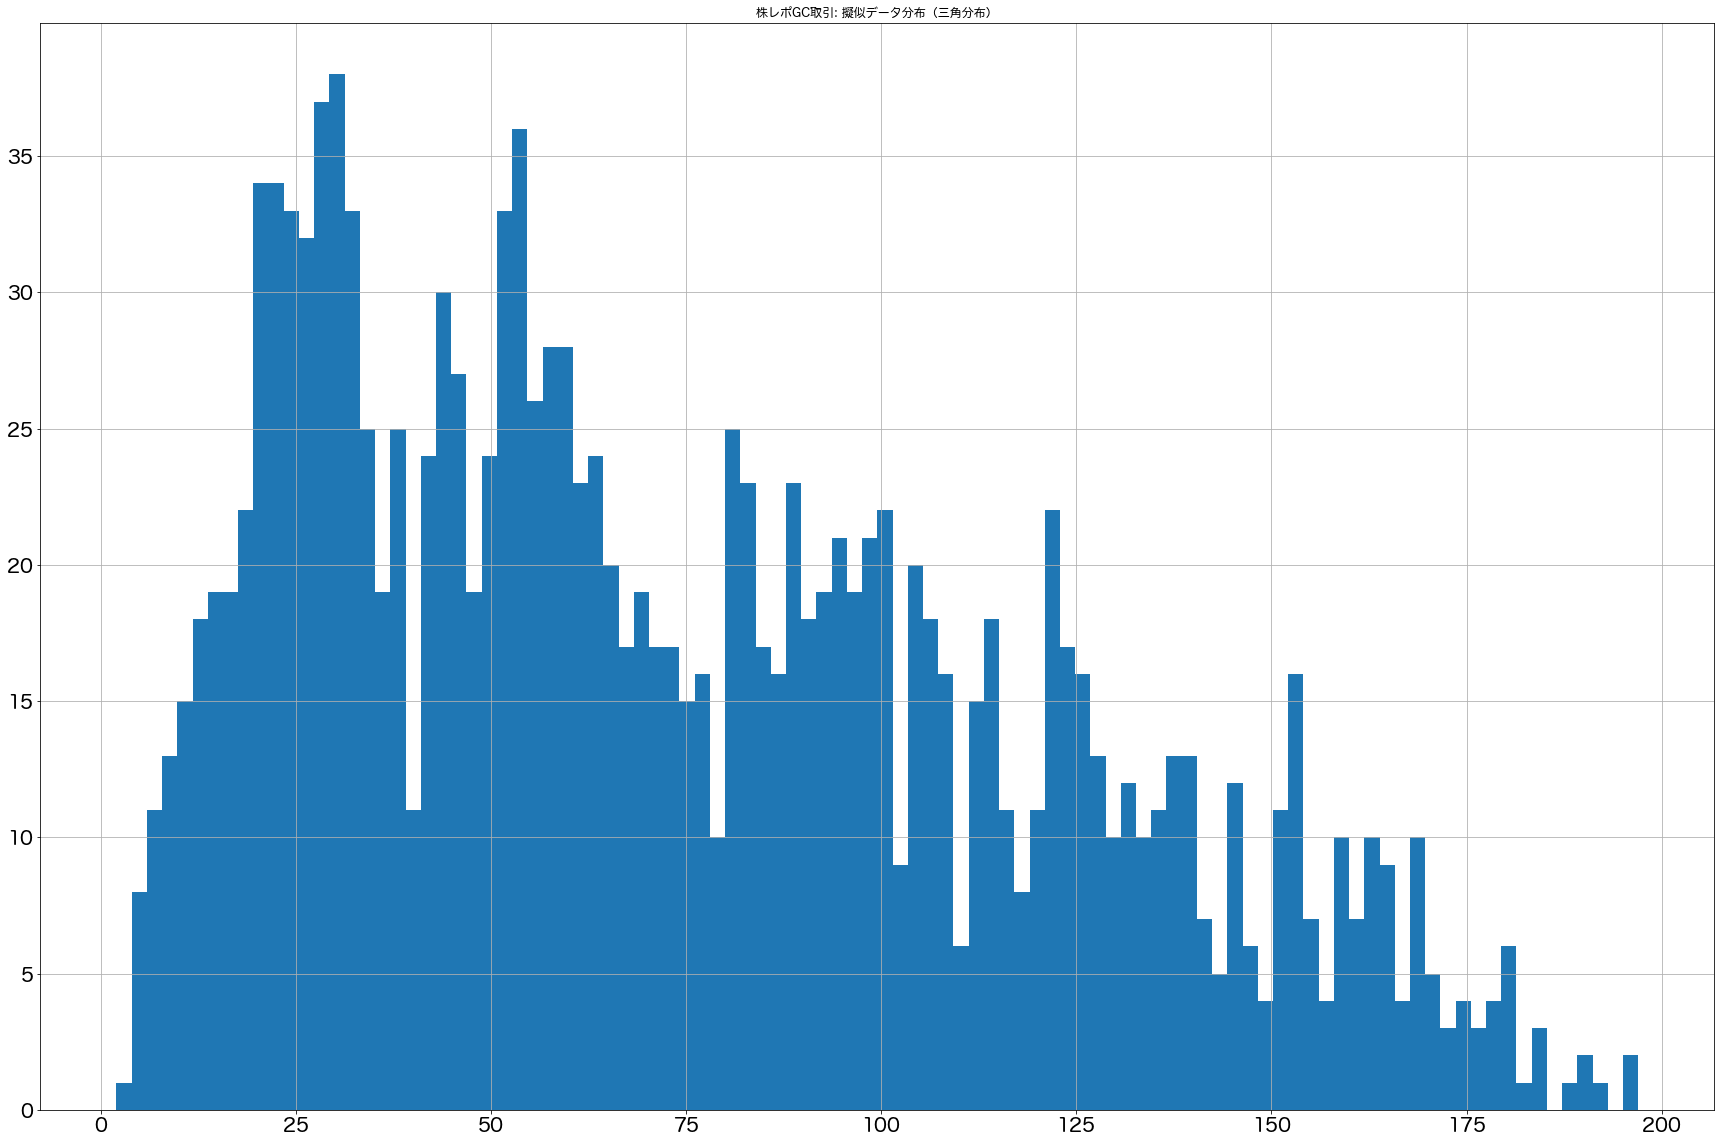

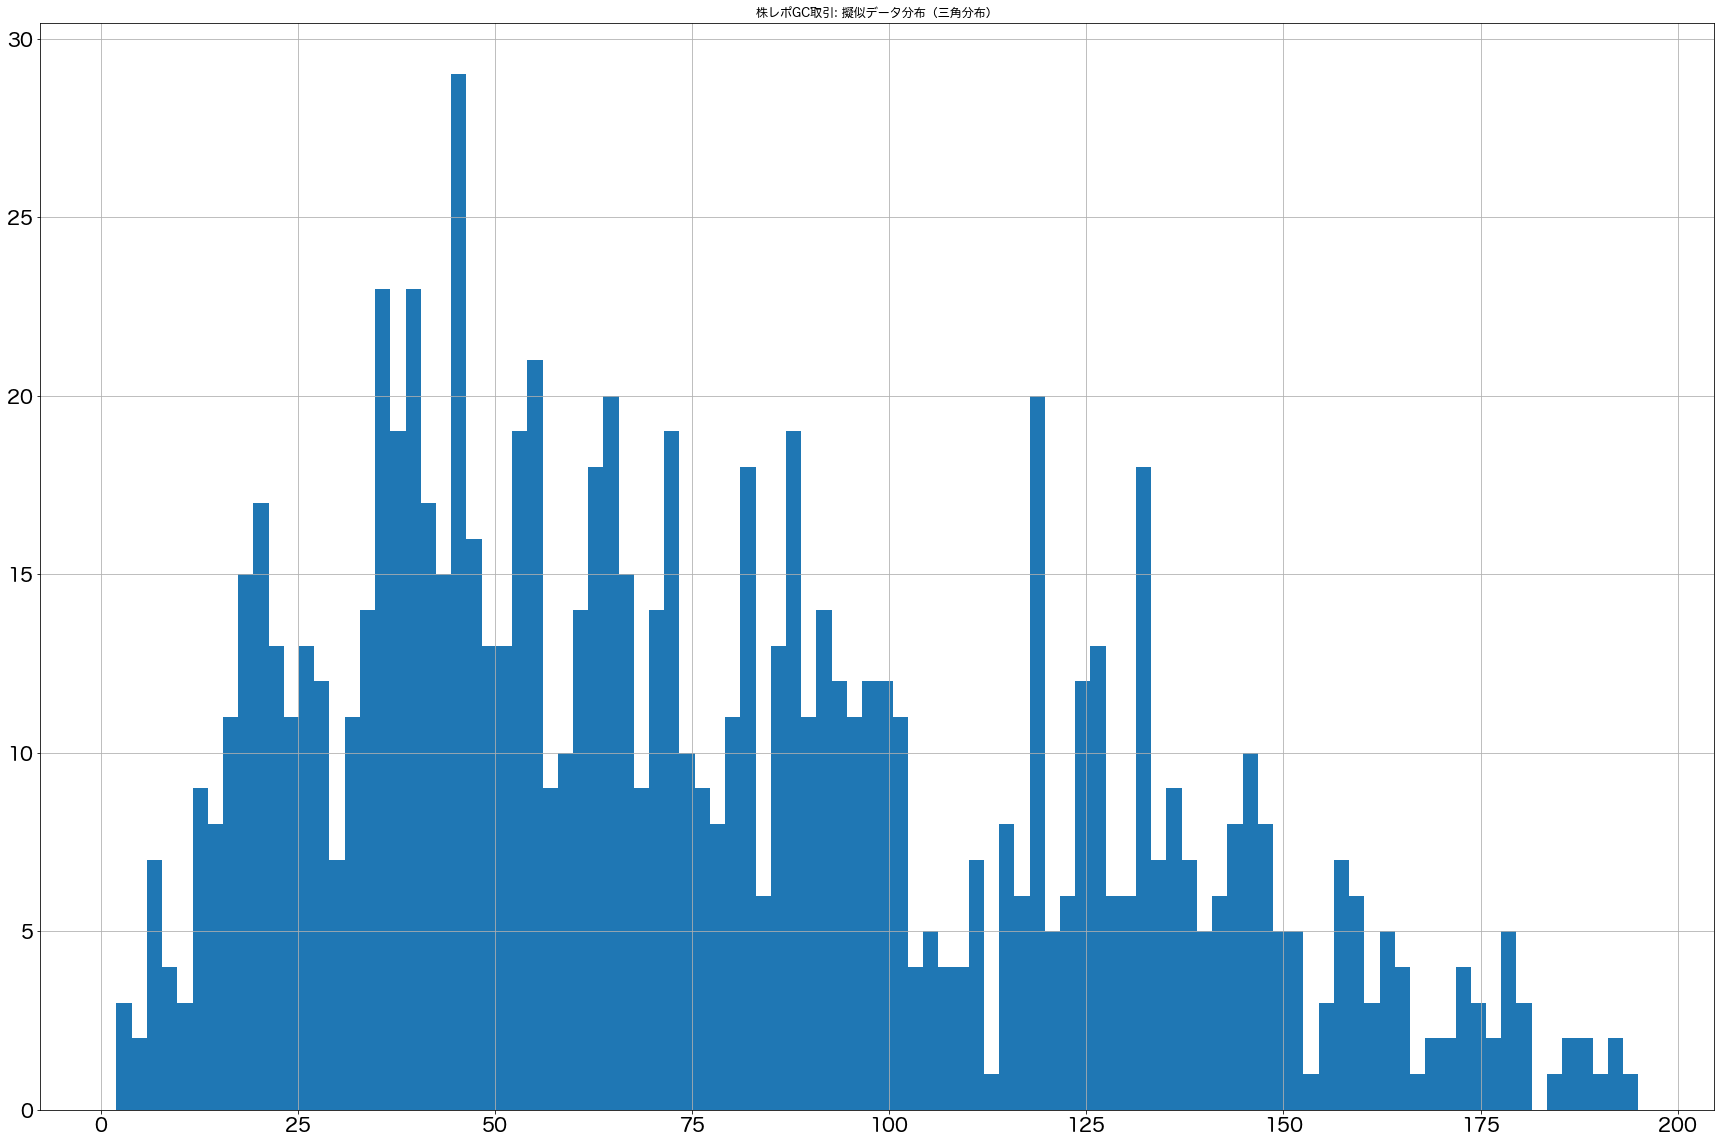

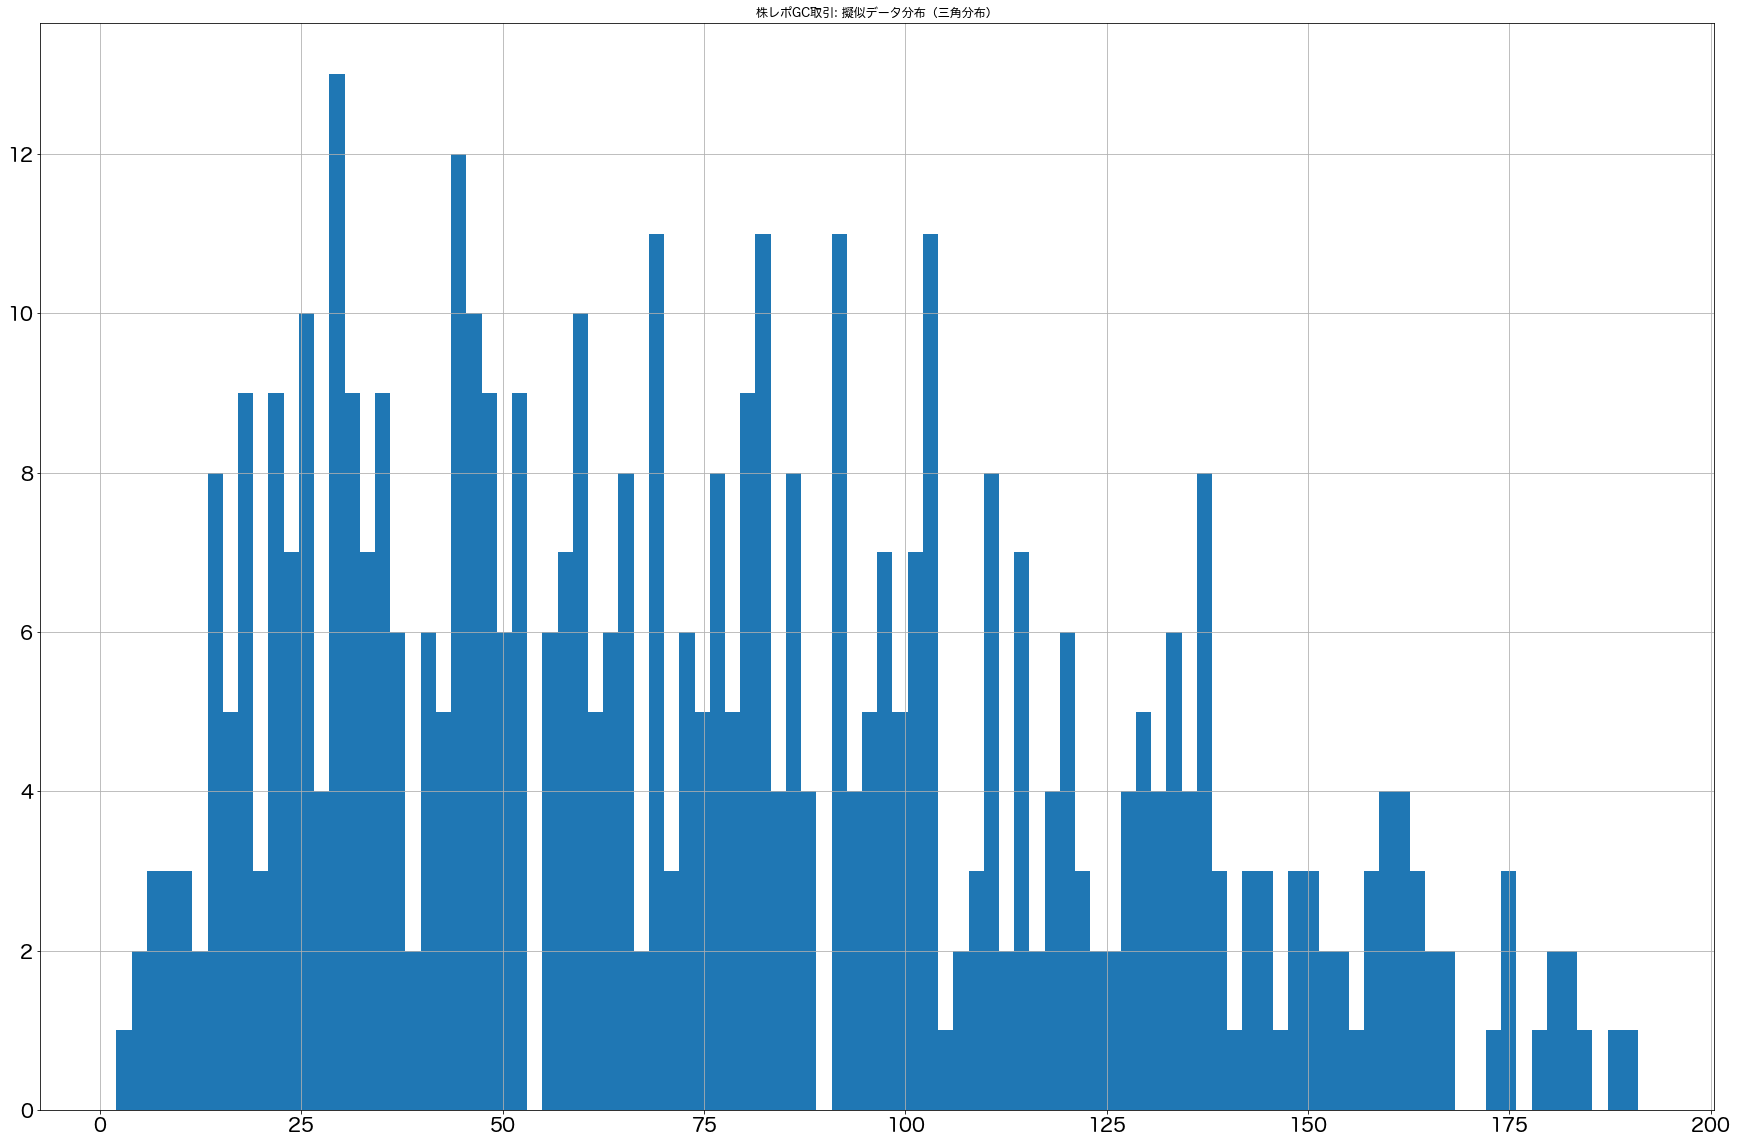

In [32]:
for _key, _value in b_trade_nums.items():
    _num = _value['gc']
    all_security_num_dfs[_key]['gc'] = get_gc_num_df(_num)
all_security_num_dfs

#### SC取引

株レポ: SC取引銘柄数
          1   2~10  11~50  51~100   101~
ratio  0.54   0.36    0.1       0    0.0
min    1.00   2.00   11.0      51  101.0
max    1.00  10.00   50.0     100  200.0
'=================================================='


Text(0.5, 1.0, '株レポSC取引: 銘柄数')

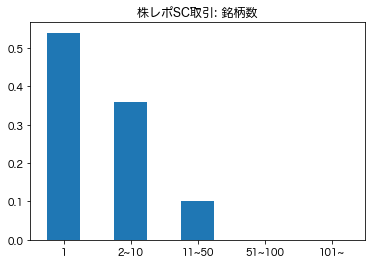

In [33]:
sc_security_num_dist = pd.DataFrame([[0.54, 0.36, 0.1, 0, 0.], [1, 2, 11, 51, 101], [1, 10, 50, 100, 200]],
                             columns=security_num_column_labels,
                             index=['ratio', 'min', 'max'])
sc_security_num_ave = 4.05
print('株レポ: SC取引銘柄数')
pprint(sc_security_num_dist)
pprint('='*50)

sc_security_num_dist.T['ratio'].plot(kind='bar', rot=0)
plt.title('株レポSC取引: 銘柄数')

Text(0.5, 1.0, '株レポSC取引: ヒストグラム')

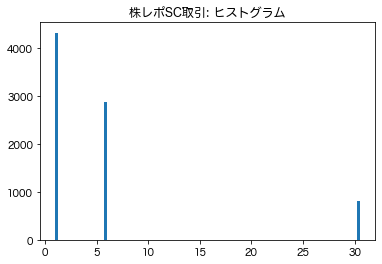

In [34]:
sc_trade_num = 8000
sc_ave_security_num_list = (sc_security_num_dist.T['min'] + sc_security_num_dist.T['max']) / 2
sc_security_num_sample = [[ave]*int(sc_security_num_dist.T['ratio'][index] * sc_trade_num)  for (index, ave) in enumerate(sc_ave_security_num_list)]

plt.hist(list(itertools.chain.from_iterable(sc_security_num_sample)), bins=100)
plt.title('株レポSC取引: ヒストグラム')

In [35]:
def get_sc_num_df(trade_num):
    sc_security_num_max = sc_security_num_dist['101~']['max']
    sc_security_num_min = sc_security_num_dist['1']['min'] - 1
    _nums = []
    for i in range(trade_num):
        _nums.append(np.random.choice(a=[1, np.random.randint(2, 11), np.random.randint(11, 51)],  p=[0.54, 0.36, 0.1]))
       
    mock_sc_security_num_df = pd.DataFrame(_nums, dtype=int)
    mock_sc_security_num_df.hist(bins=100, figsize=(30, 20), xlabelsize=20, ylabelsize=20)
    plt.title('株レポSC取引: 擬似データ分布')
    return mock_sc_security_num_df

,0
0,10
1,1
2,1
3,1
4,19
...,...
1753,10
1754,1
1755,1
1756,5


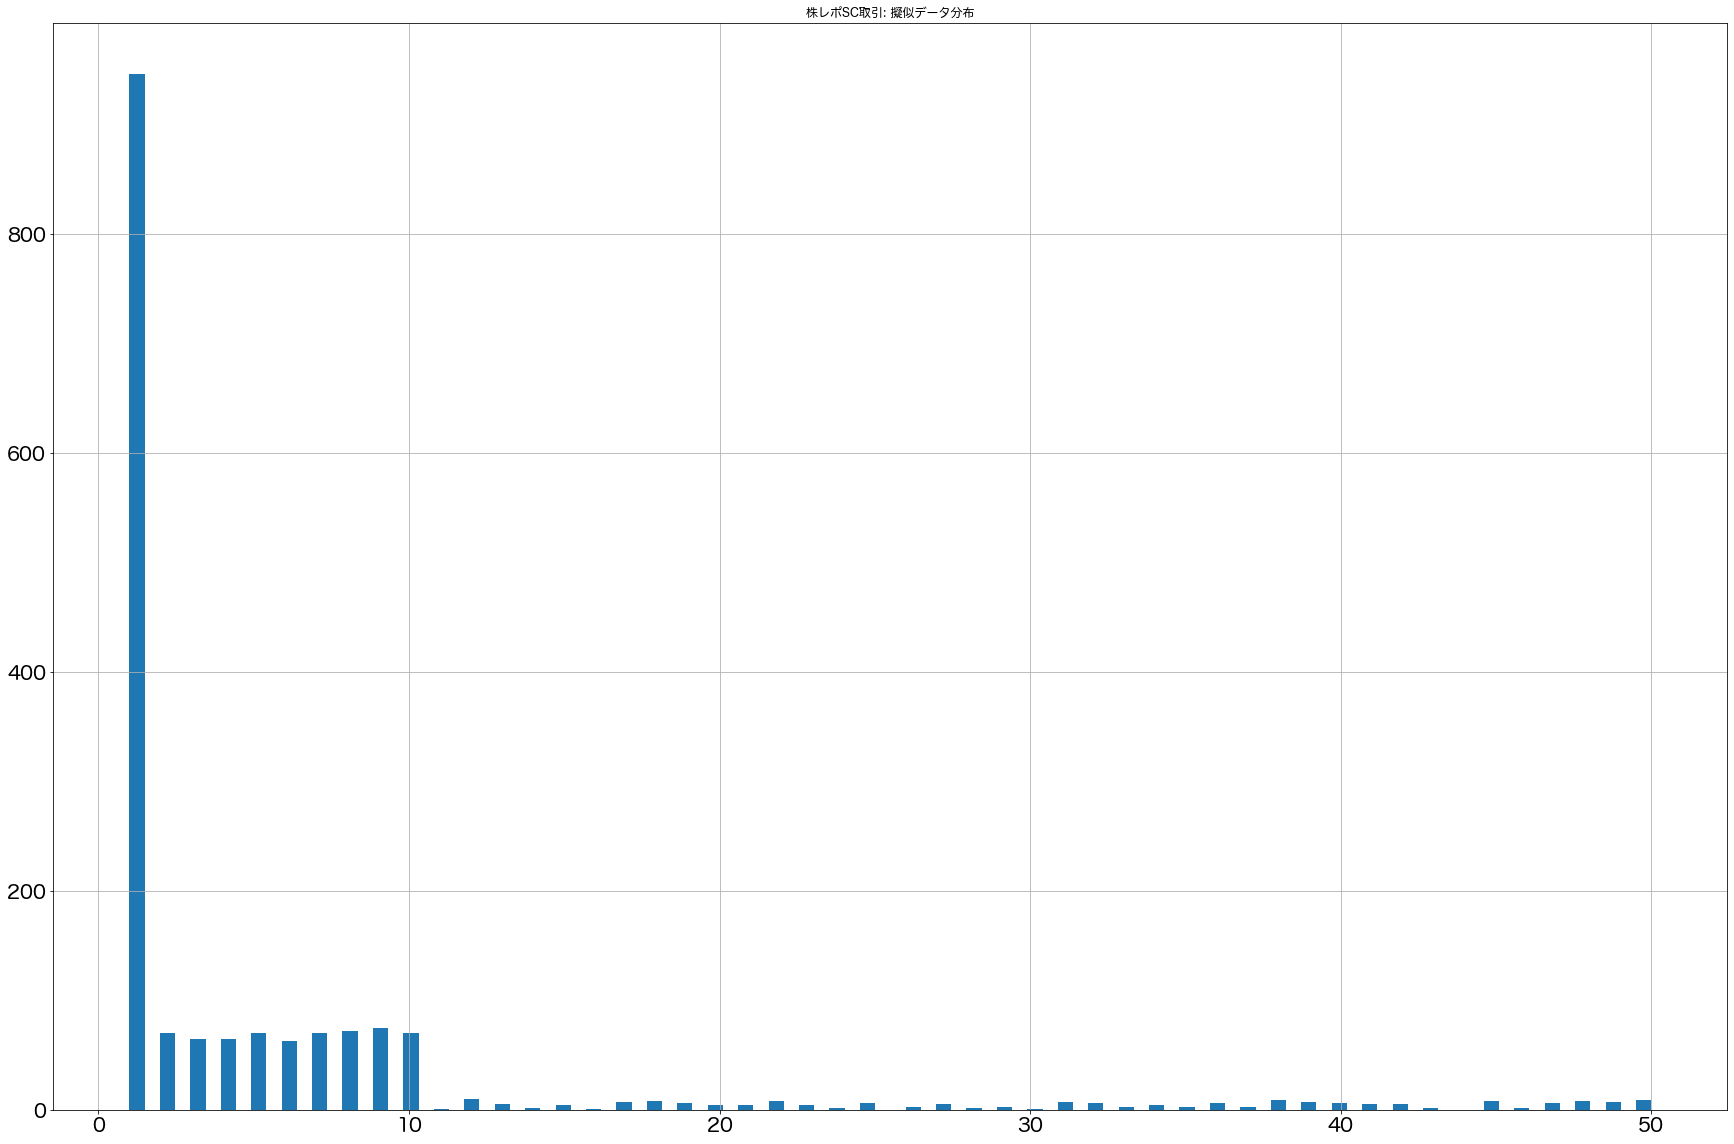

In [36]:
get_sc_num_df(b_security_nums['100%']['stock'])

{'100%': {'gc':         0
  0      26
  1      18
  2      64
  3      24
  4      70
  ...   ...
  6193   74
  6194   66
  6195   84
  6196  148
  6197   20
  
  [6198 rows x 1 columns],
  'sc':         0
  0       2
  1       7
  2      23
  3       1
  4       1
  ...    ..
  40082   9
  40083   7
  40084   1
  40085   6
  40086   1
  
  [40087 rows x 1 columns]},
 '150%': {'gc':         0
  0      15
  1      28
  2      46
  3     181
  4      30
  ...   ...
  9292  156
  9293   38
  9294    9
  9295   68
  9296   36
  
  [9297 rows x 1 columns],
  'sc':         0
  0      10
  1       1
  2       1
  3       1
  4      47
  ...    ..
  60126   8
  60127   1
  60128   6
  60129   1
  60130   5
  
  [60131 rows x 1 columns]},
 '50%': {'gc':         0
  0      39
  1      24
  2      40
  3      91
  4      79
  ...   ...
  3094   45
  3095  126
  3096   77
  3097   68
  3098  147
  
  [3099 rows x 1 columns],
  'sc':         0
  0       5
  1       1
  2       1
  3       1
  4    

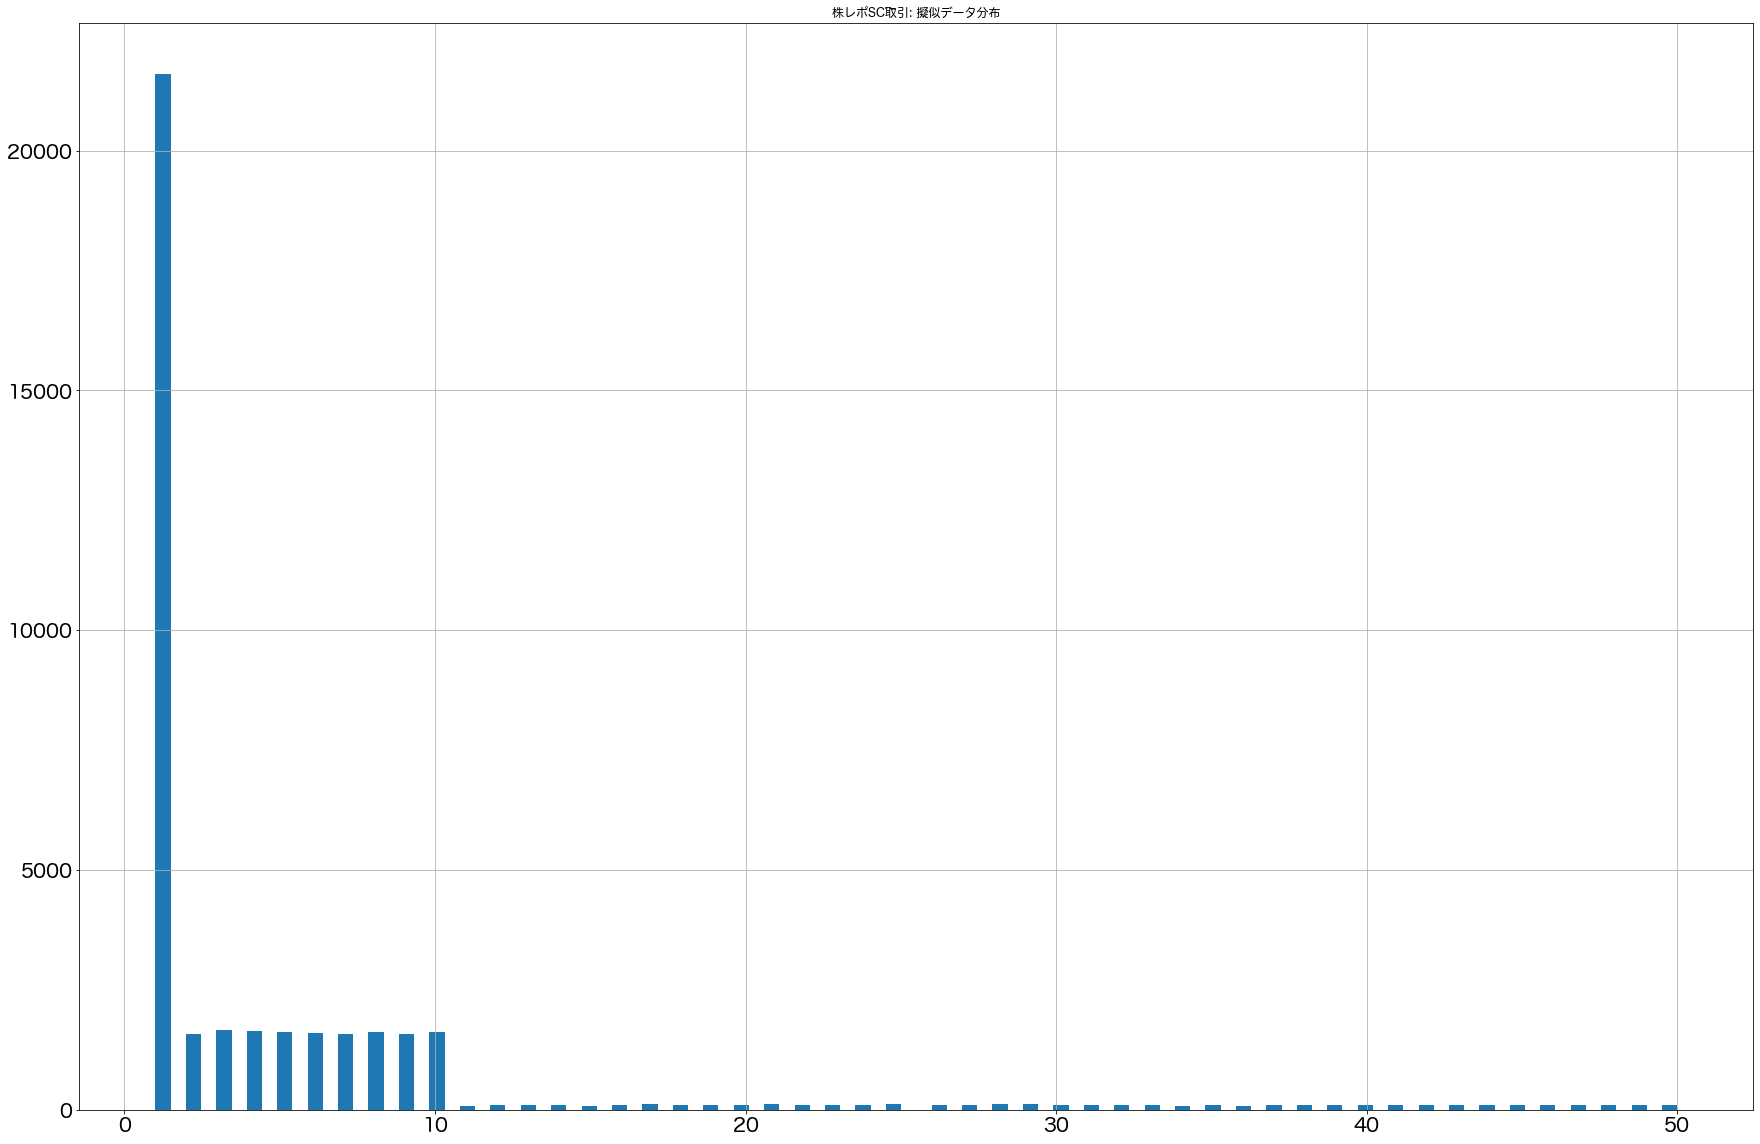

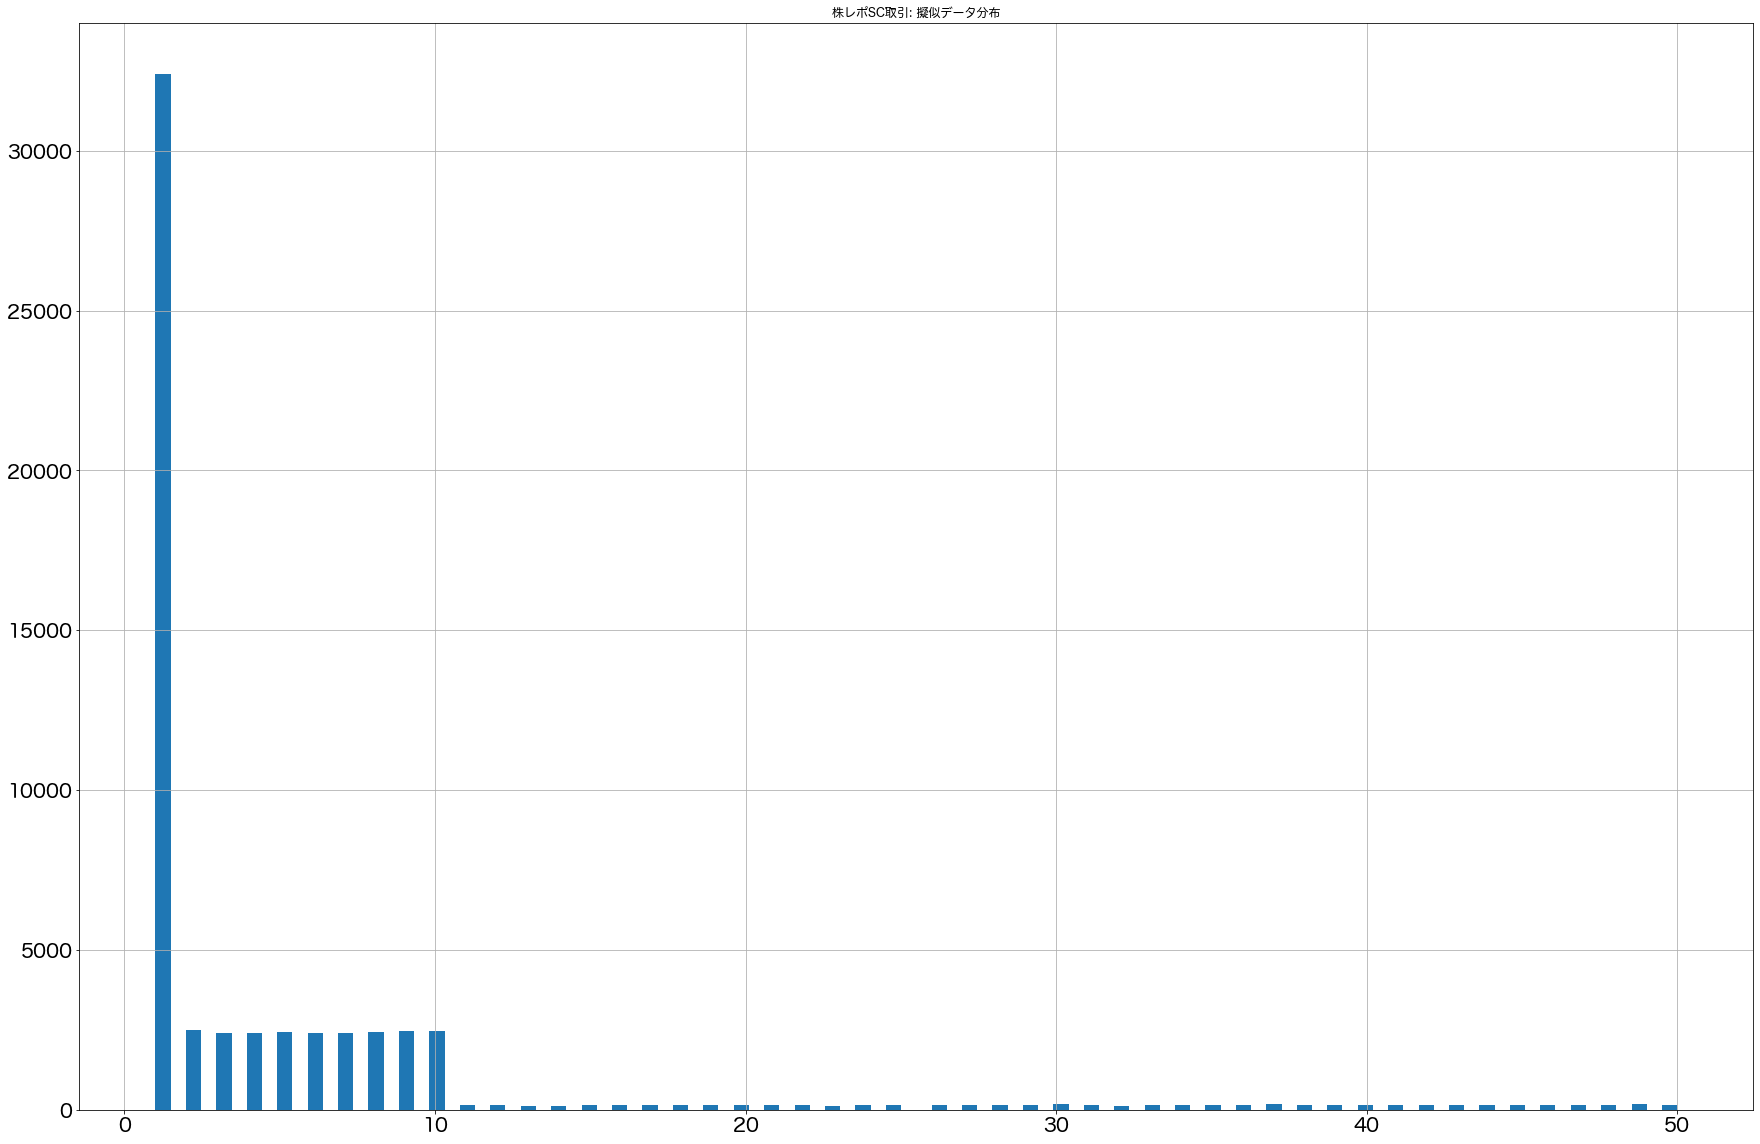

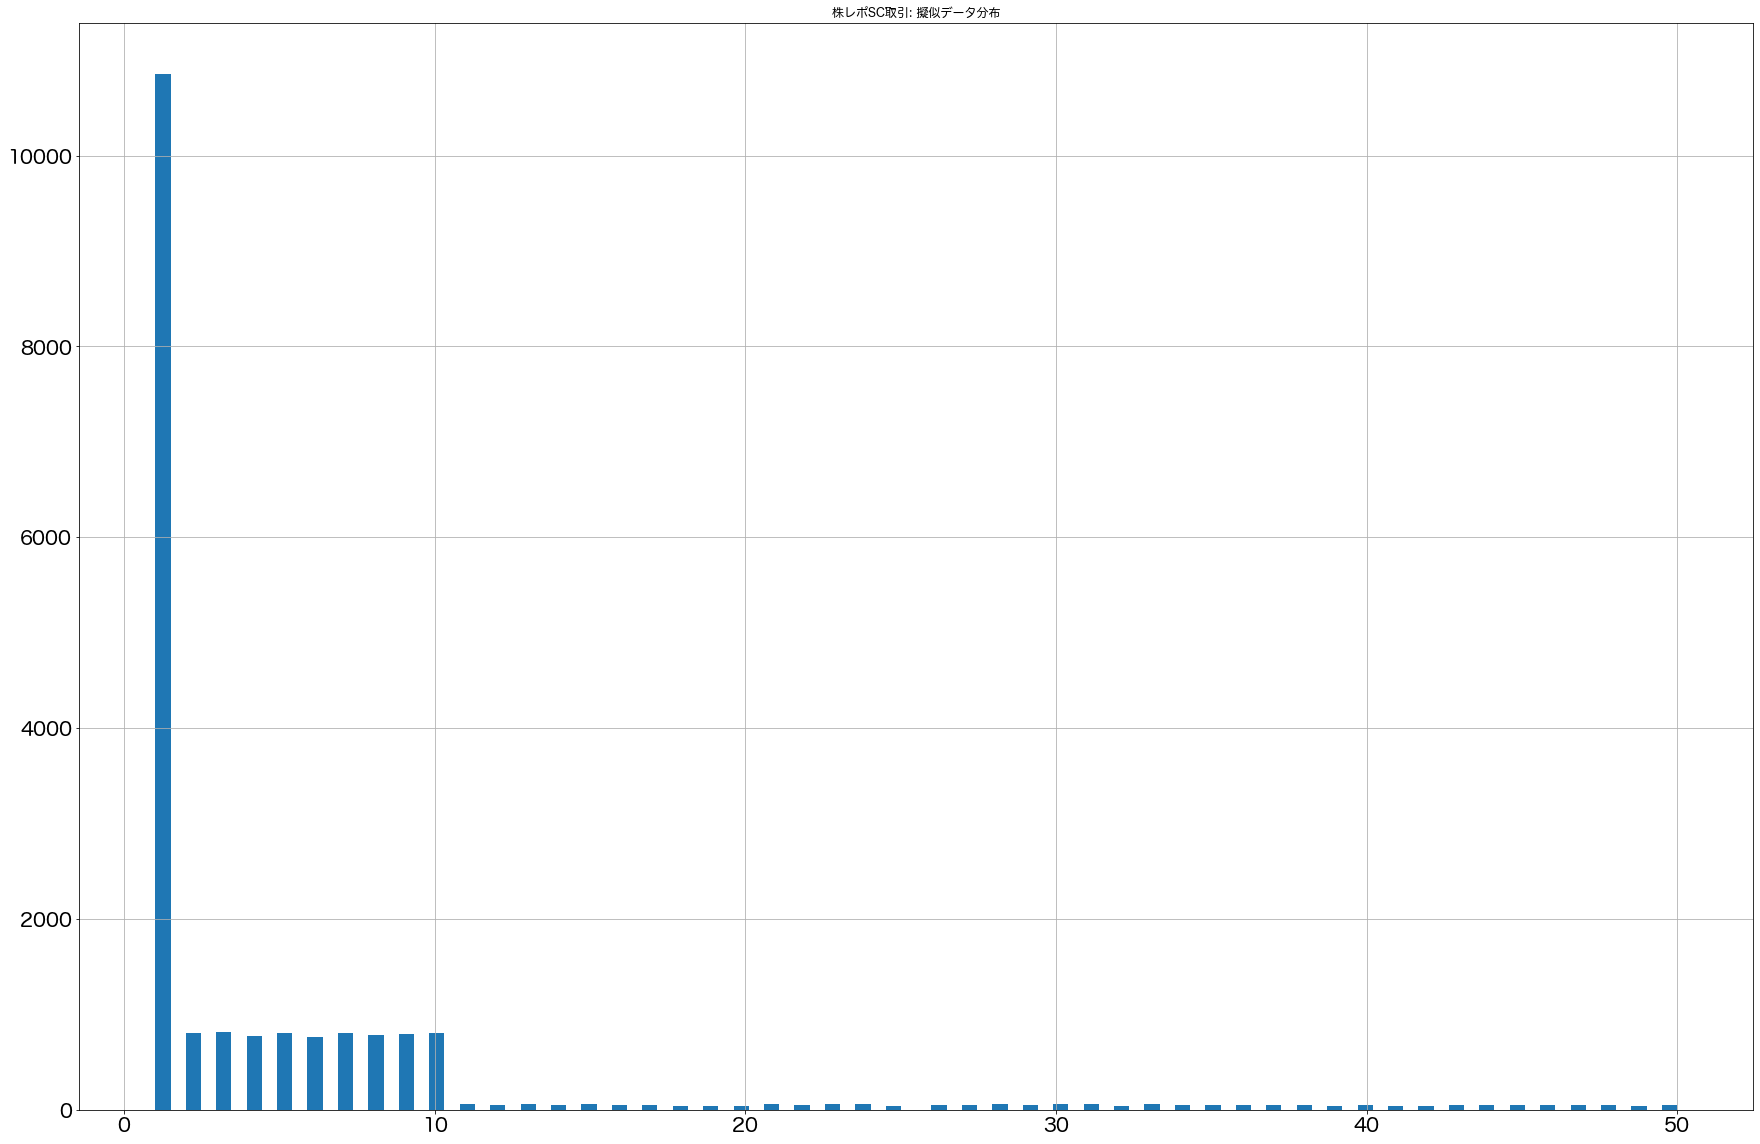

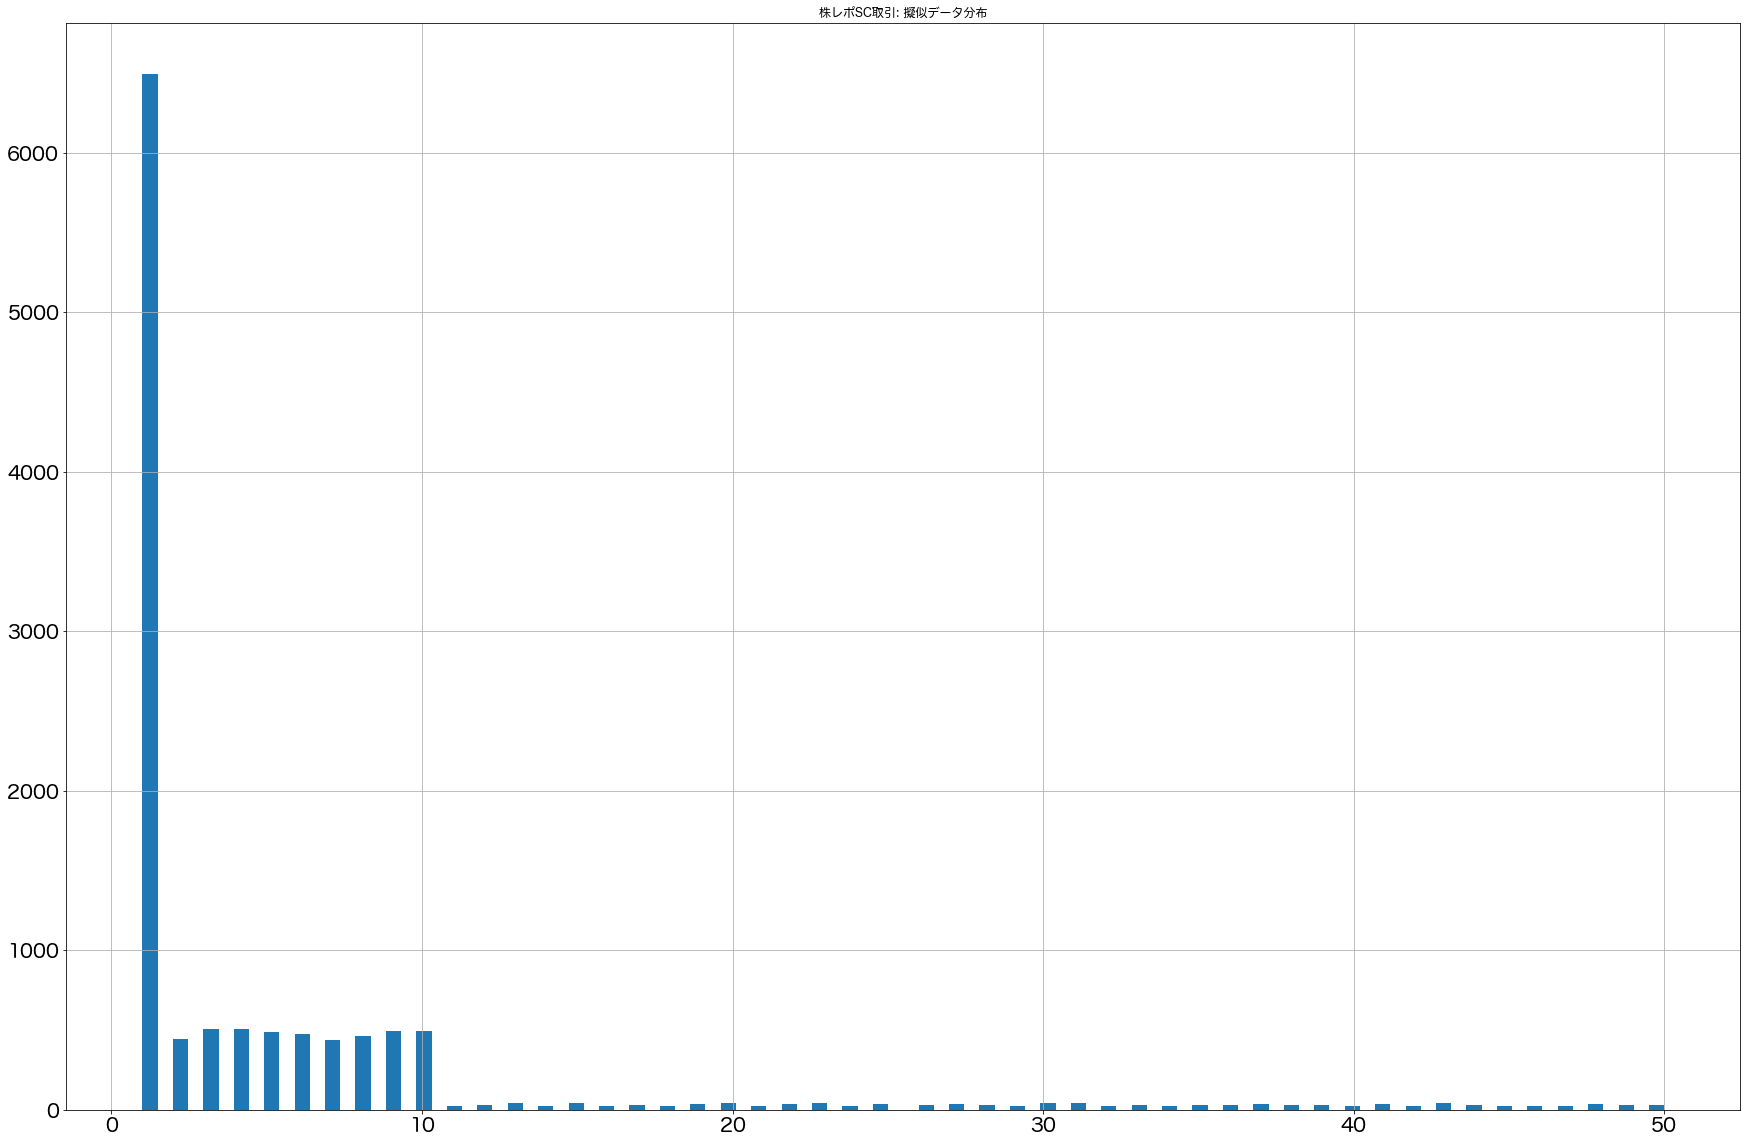

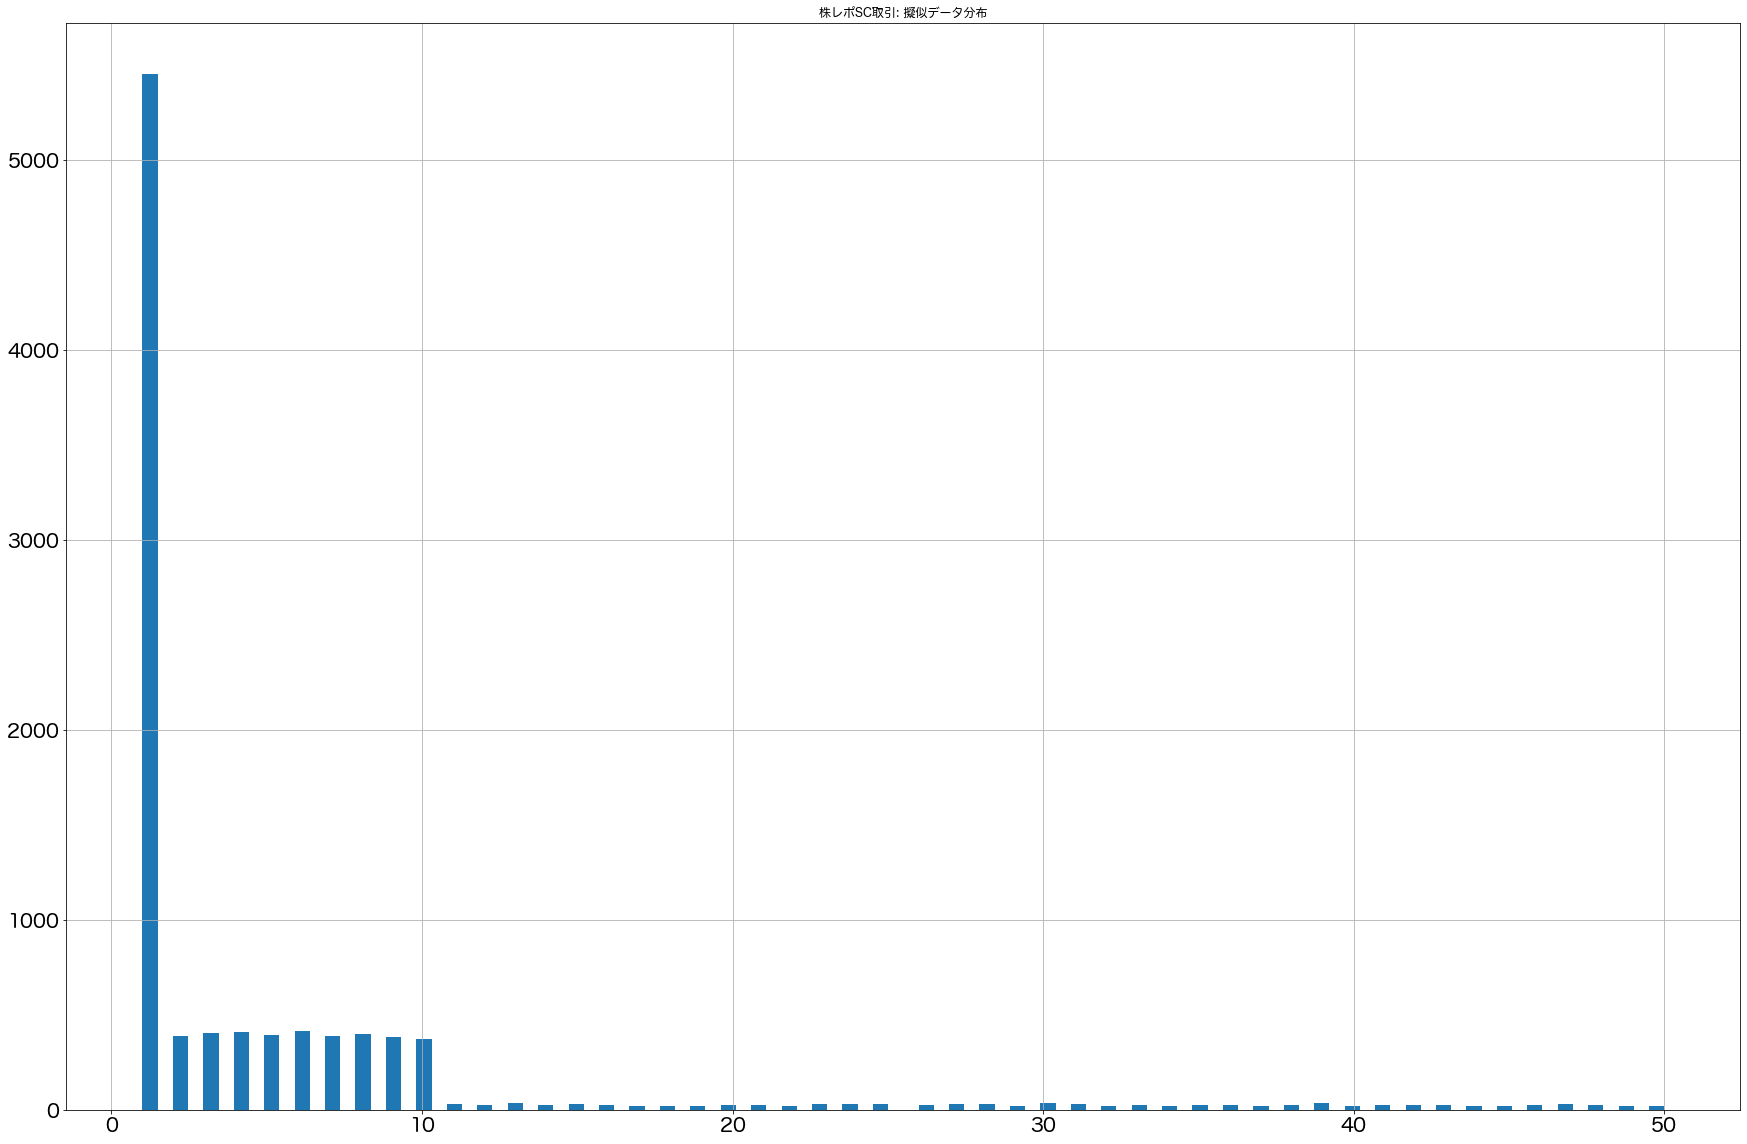

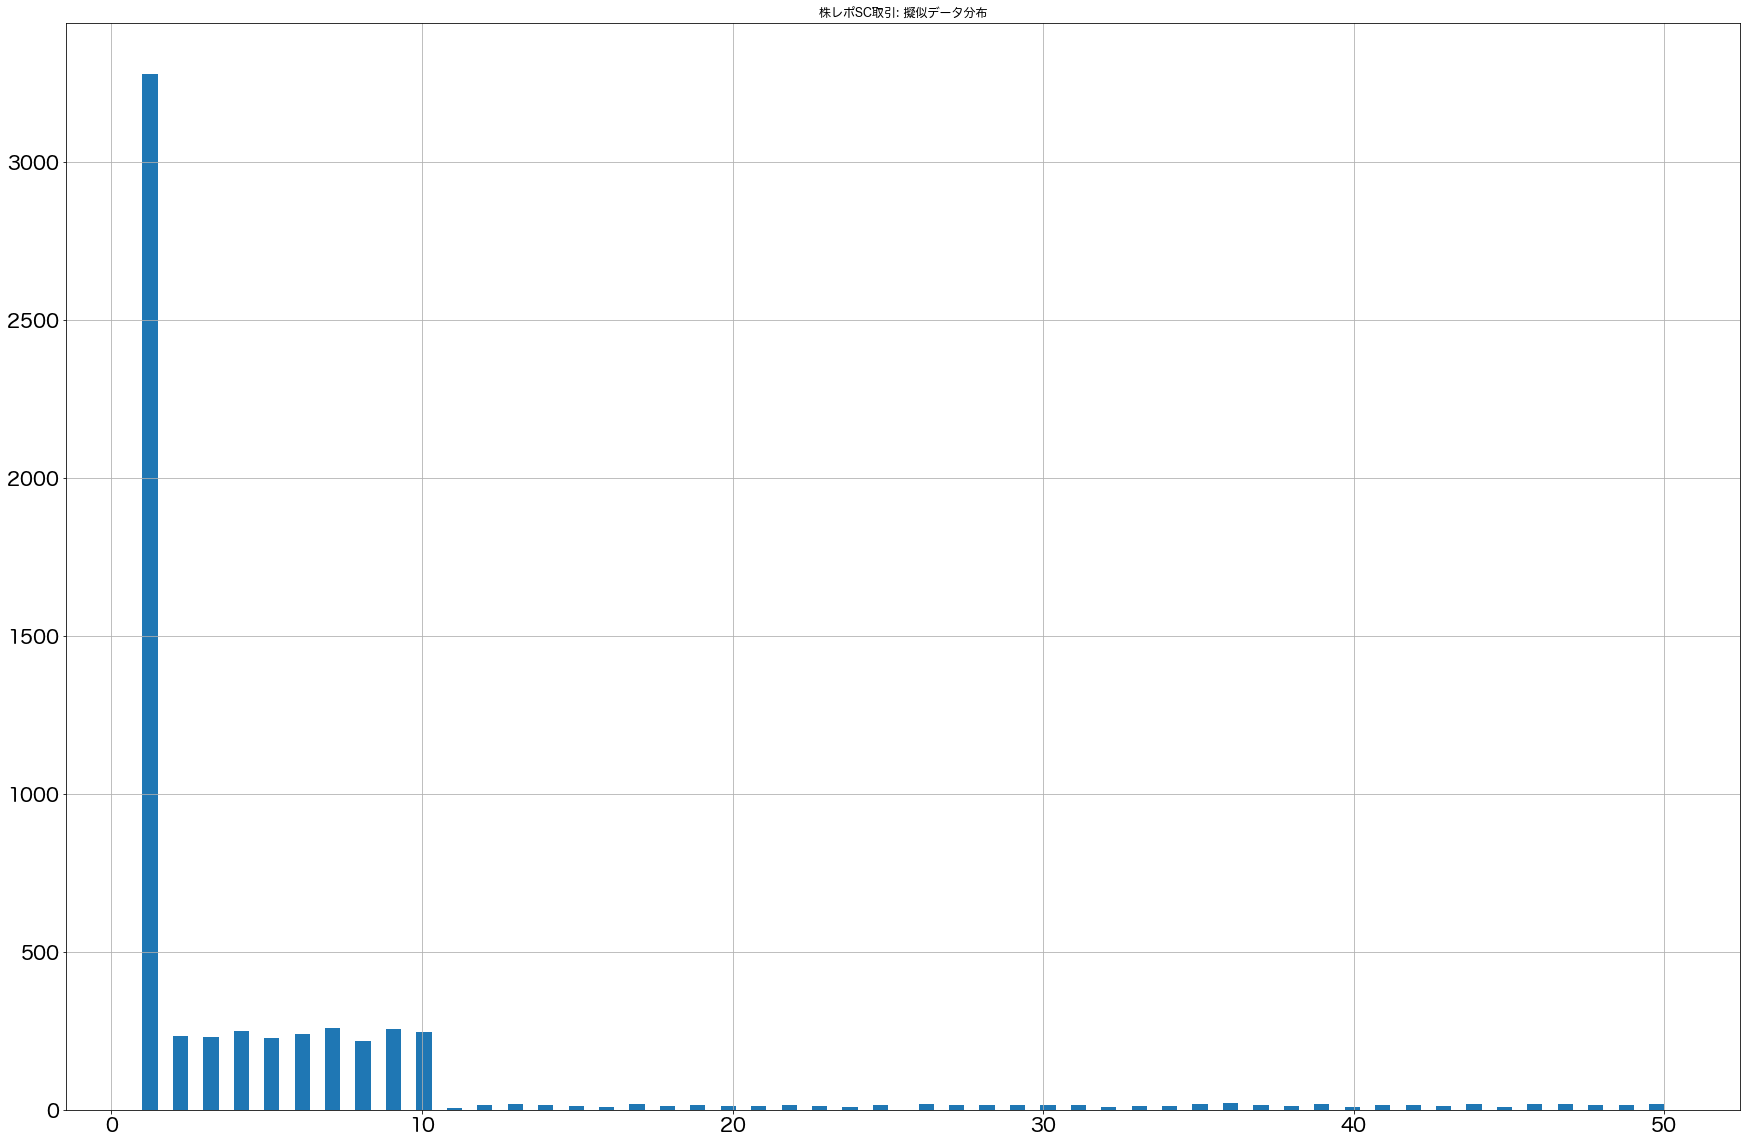

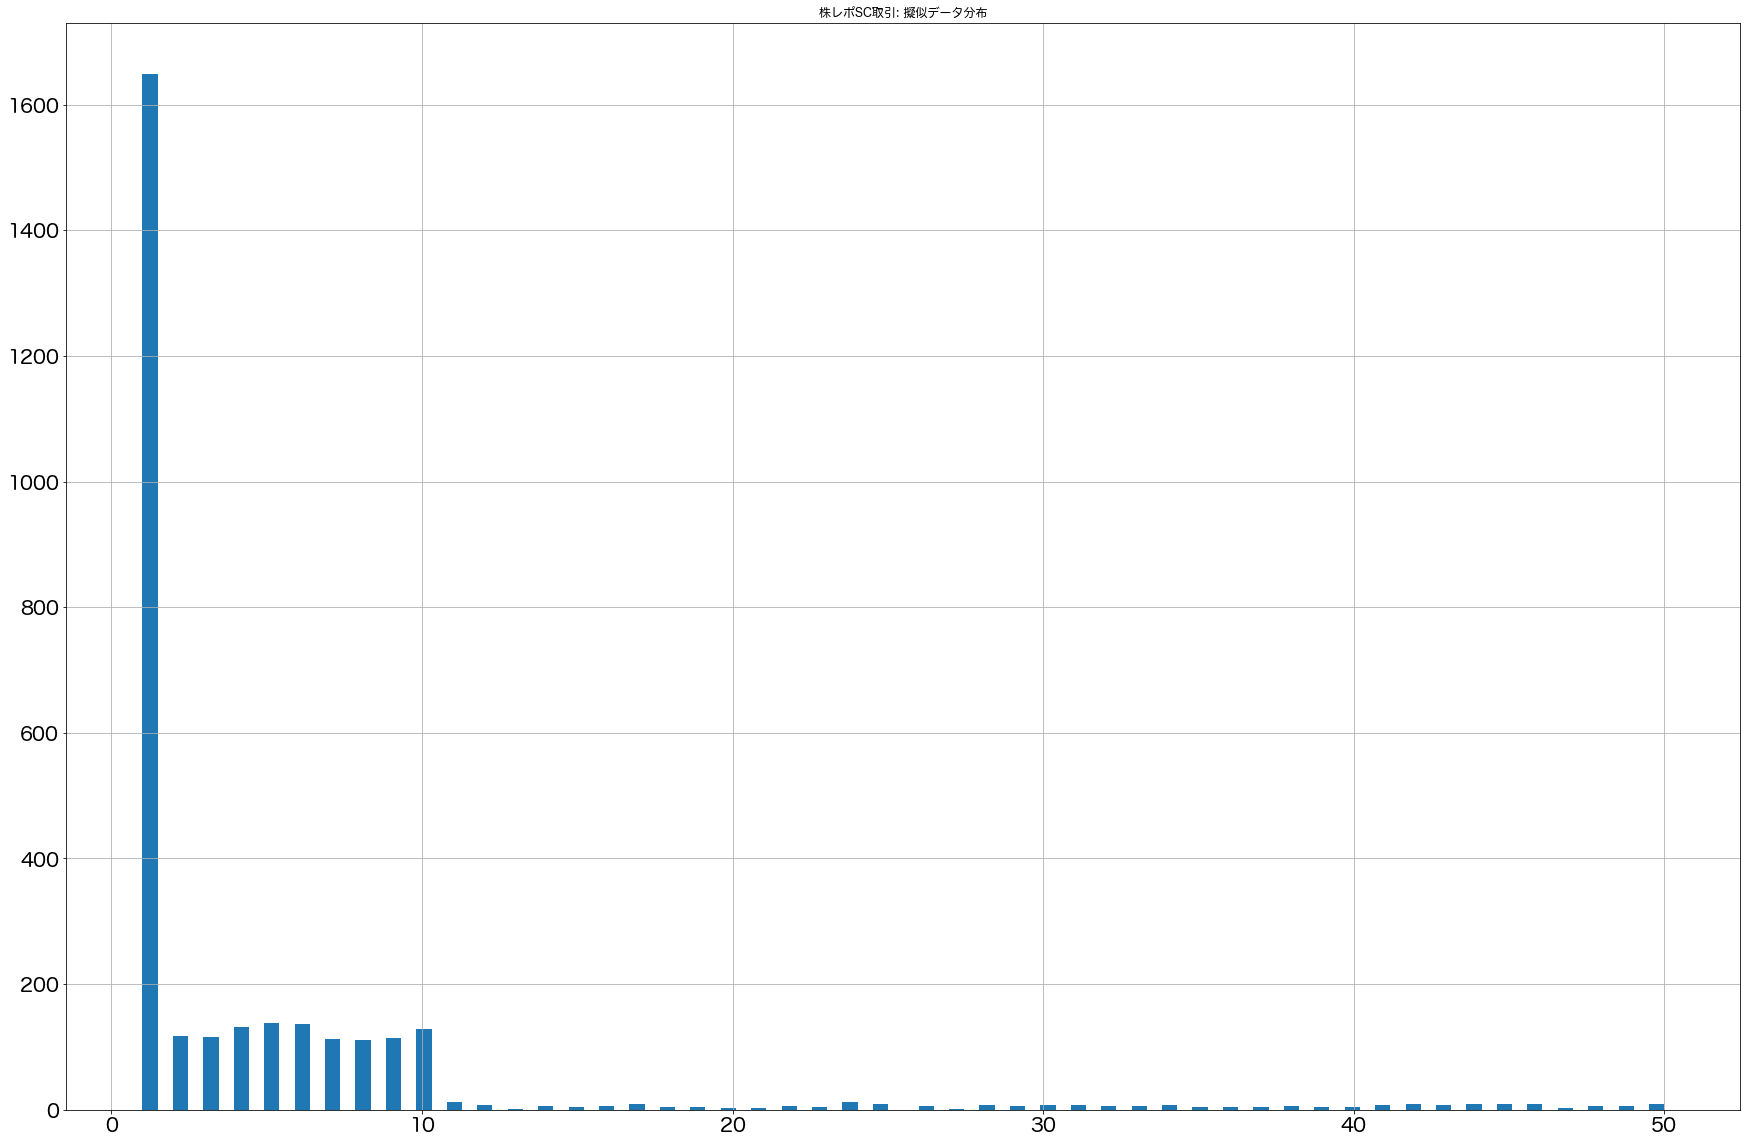

In [37]:
for _key, _value in b_trade_nums.items():
    _num = _value['sc']
    all_security_num_dfs[_key]['sc'] = get_sc_num_df(_num)
all_security_num_dfs

#### 債券レポ

債券レポ: 取引銘柄数
          1   2-5   6-10  11-50
ratio  0.69  0.27   0.03   0.01
min    1.00  2.00   6.00  11.00
max    1.00  5.00  10.00  30.00
'=================================================='


Text(0.5, 1.0, '債券レポ取引: 銘柄数')

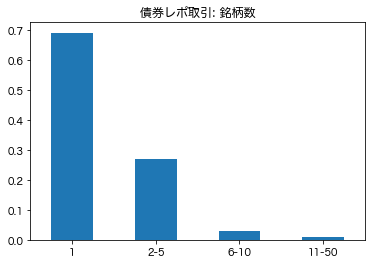

In [38]:
bond_security_num_dist = pd.DataFrame([[0.69, 0.27, 0.03, 0.01], [1, 2, 6, 11], [1, 5, 10, 30]],
                             columns=['1', '2-5', '6-10', '11-50'],
                             index=['ratio', 'min', 'max'])
bond_security_num_ave = 1.87
print('債券レポ: 取引銘柄数')
pprint(bond_security_num_dist)
pprint('='*50)

bond_security_num_dist.T['ratio'].plot(kind='bar', rot=0)
plt.title('債券レポ取引: 銘柄数')

Text(0.5, 1.0, '再建レポ取引: ヒストグラム')

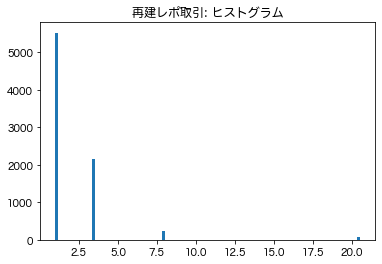

In [39]:
bond_trade_num = 8000
bond_ave_security_num_list = (bond_security_num_dist.T['min'] + bond_security_num_dist.T['max']) / 2
bond_security_num_sample = [[ave]*int(bond_security_num_dist.T['ratio'][index] * bond_trade_num)  for (index, ave) in enumerate(bond_ave_security_num_list)]

plt.hist(list(itertools.chain.from_iterable(bond_security_num_sample)), bins=100)
plt.title('再建レポ取引: ヒストグラム')

In [40]:
def get_bond_num_df(trade_num):
    bond_security_num_max = bond_security_num_dist['11-50']['max']
    bond_security_num_min = bond_security_num_dist['1']['min'] - 1
    _nums = []
    for i in range(trade_num):
        _nums.append(np.random.choice(a=[1, np.random.randint(2, 6), np.random.randint(6, 11), np.random.randint(11, 51)],  p=[0.69, 0.27, 0.03, 0.01]))
       
    mock_bond_security_num_df = pd.DataFrame(_nums, dtype=int)
    mock_bond_security_num_df.hist(bins=1000, figsize=(30, 20))
    plt.title('債券レポ取引: 擬似データ分布（三角分布）')
    return mock_bond_security_num_df

0    50
dtype: int64

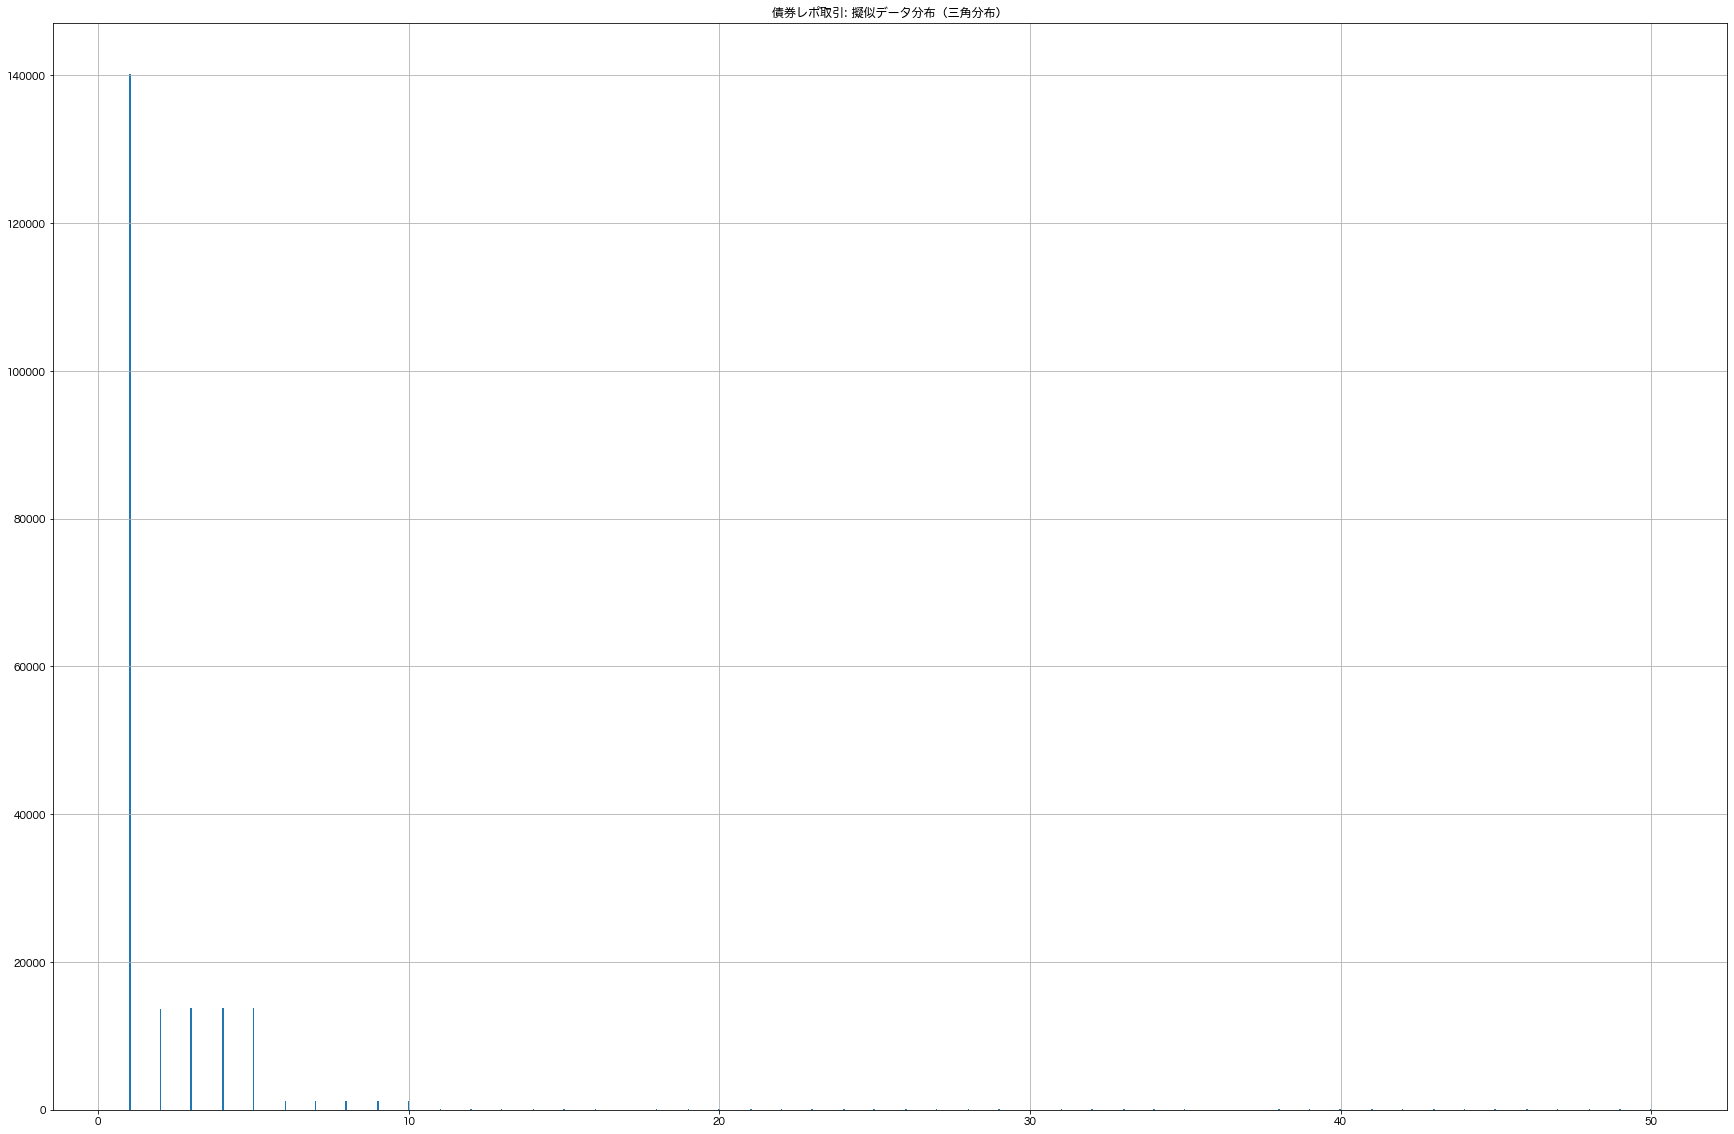

In [41]:
get_bond_num_df(b_trade_nums['100%']['bond']).max()

{'100%': {'gc':         0
  0      26
  1      18
  2      64
  3      24
  4      70
  ...   ...
  6193   74
  6194   66
  6195   84
  6196  148
  6197   20
  
  [6198 rows x 1 columns],
  'sc':         0
  0       2
  1       7
  2      23
  3       1
  4       1
  ...    ..
  40082   9
  40083   7
  40084   1
  40085   6
  40086   1
  
  [40087 rows x 1 columns],
  'bond':         0
  0       2
  1       1
  2       1
  3       1
  4       1
  ...    ..
  203063  1
  203064  3
  203065  1
  203066  1
  203067  4
  
  [203068 rows x 1 columns]},
 '150%': {'gc':         0
  0      15
  1      28
  2      46
  3     181
  4      30
  ...   ...
  9292  156
  9293   38
  9294    9
  9295   68
  9296   36
  
  [9297 rows x 1 columns],
  'sc':         0
  0      10
  1       1
  2       1
  3       1
  4      47
  ...    ..
  60126   8
  60127   1
  60128   6
  60129   1
  60130   5
  
  [60131 rows x 1 columns],
  'bond':         0
  0       1
  1       1
  2       1
  3       1
  4      

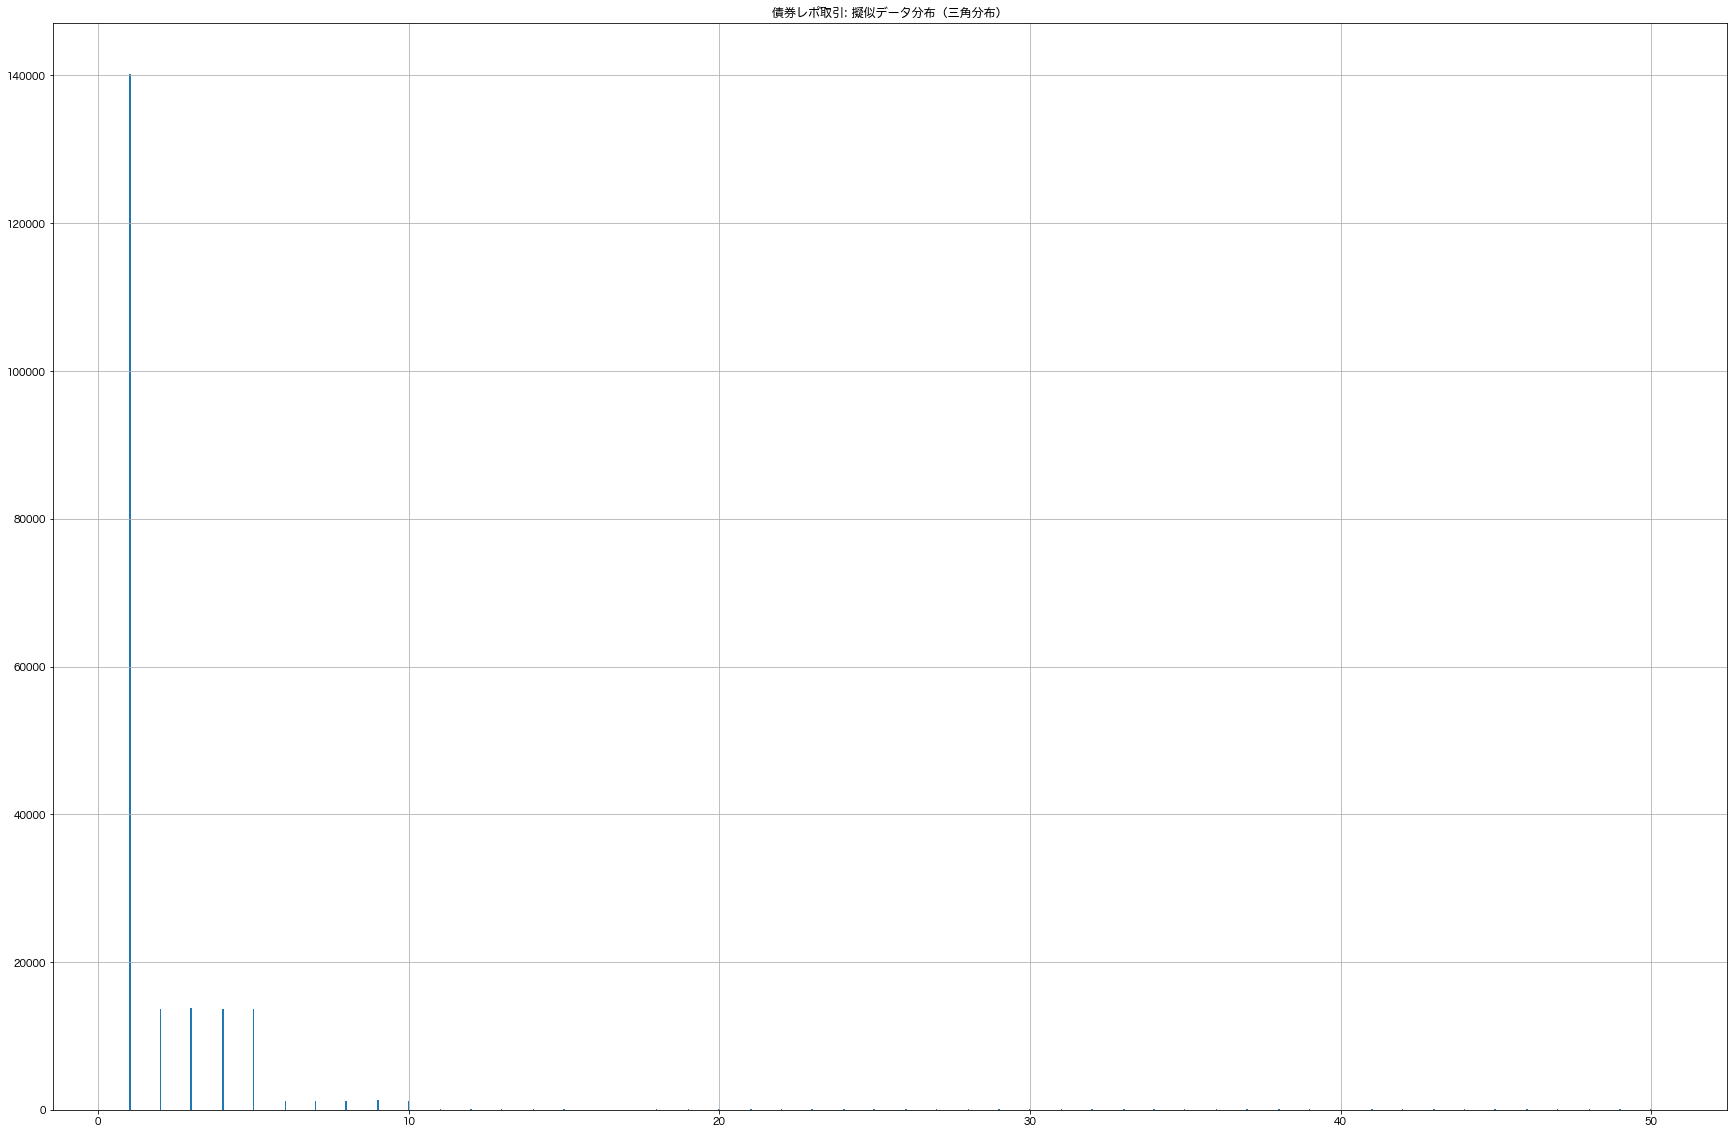

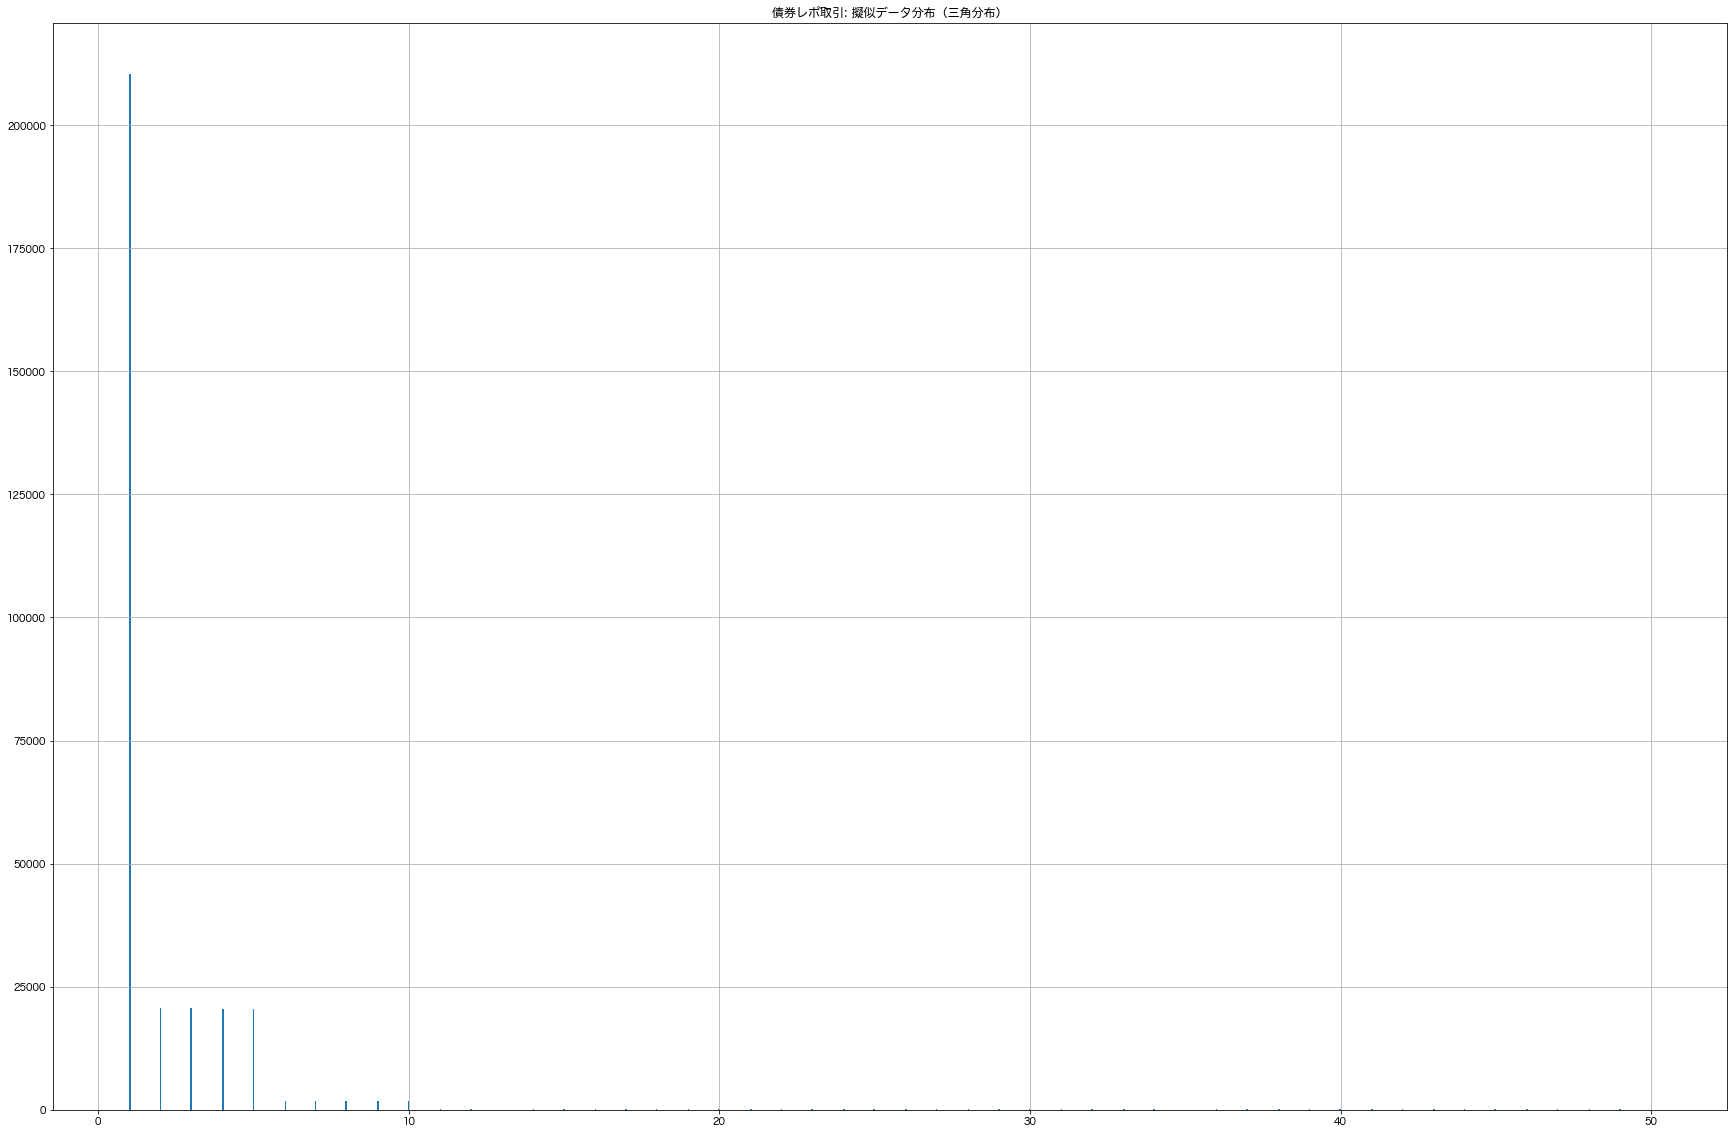

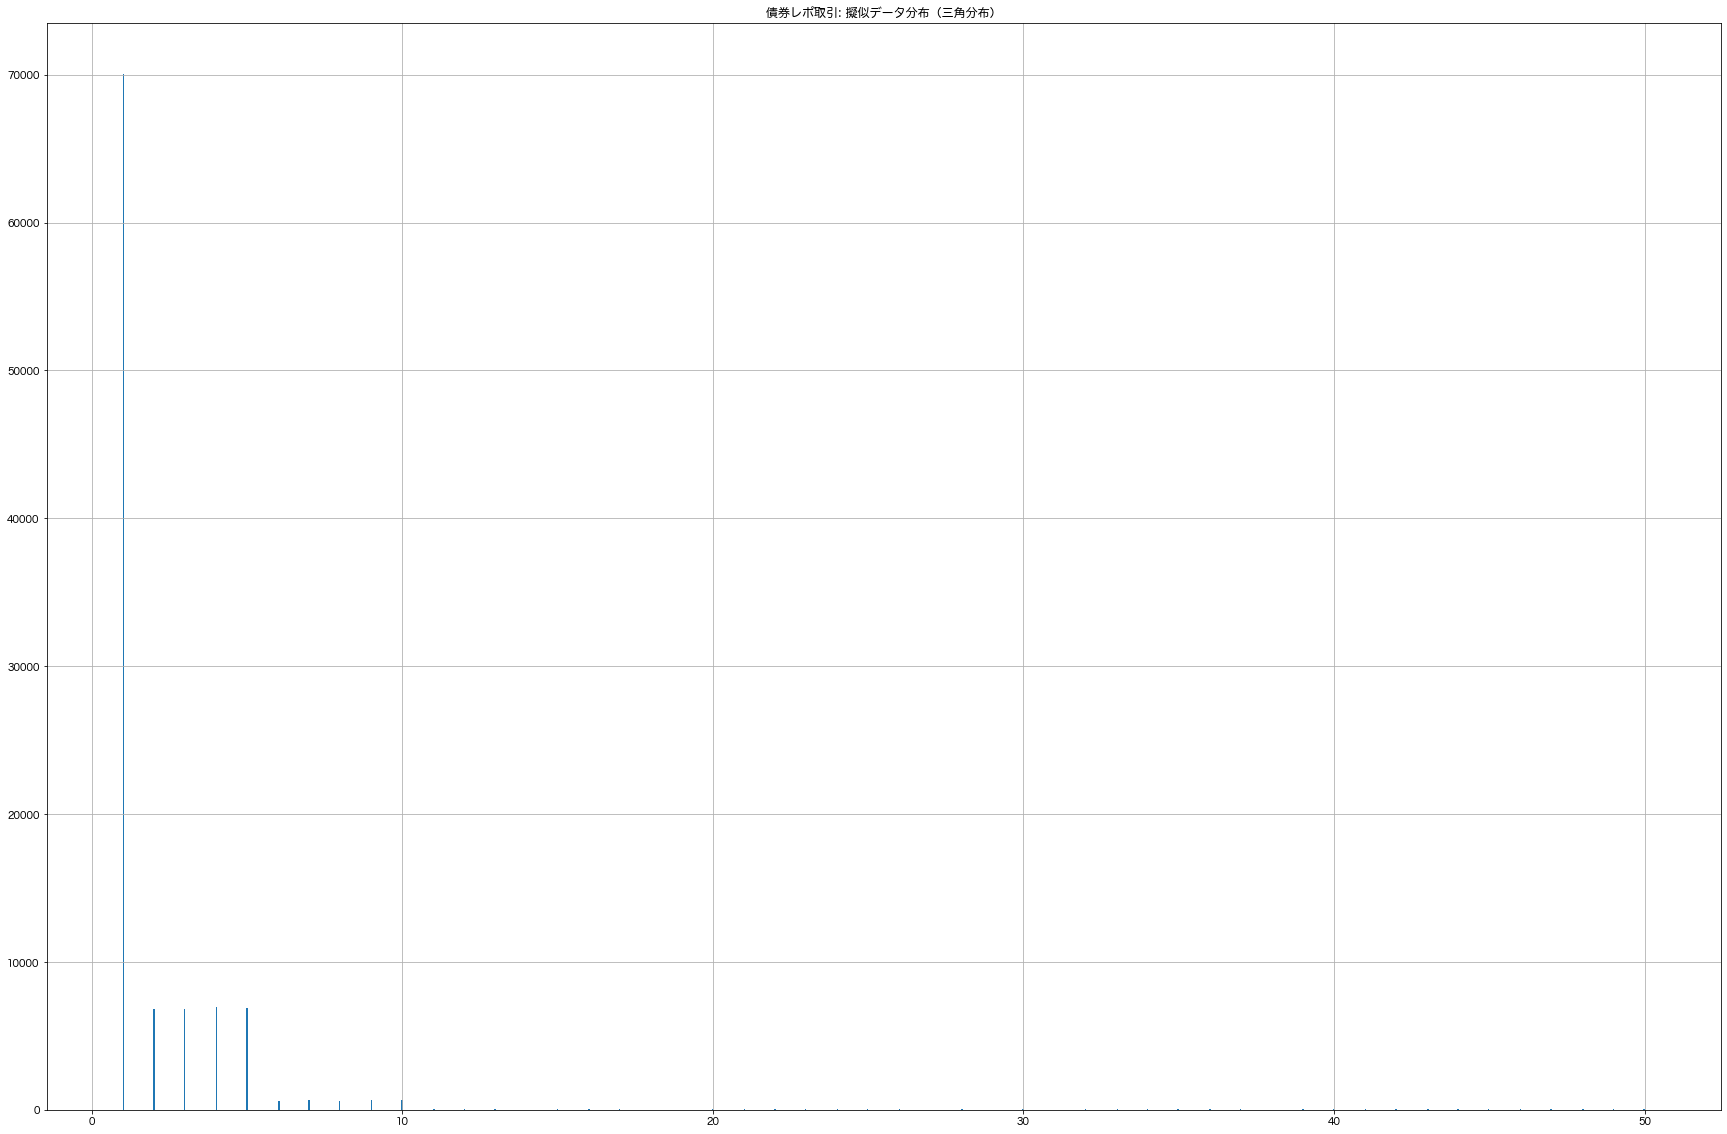

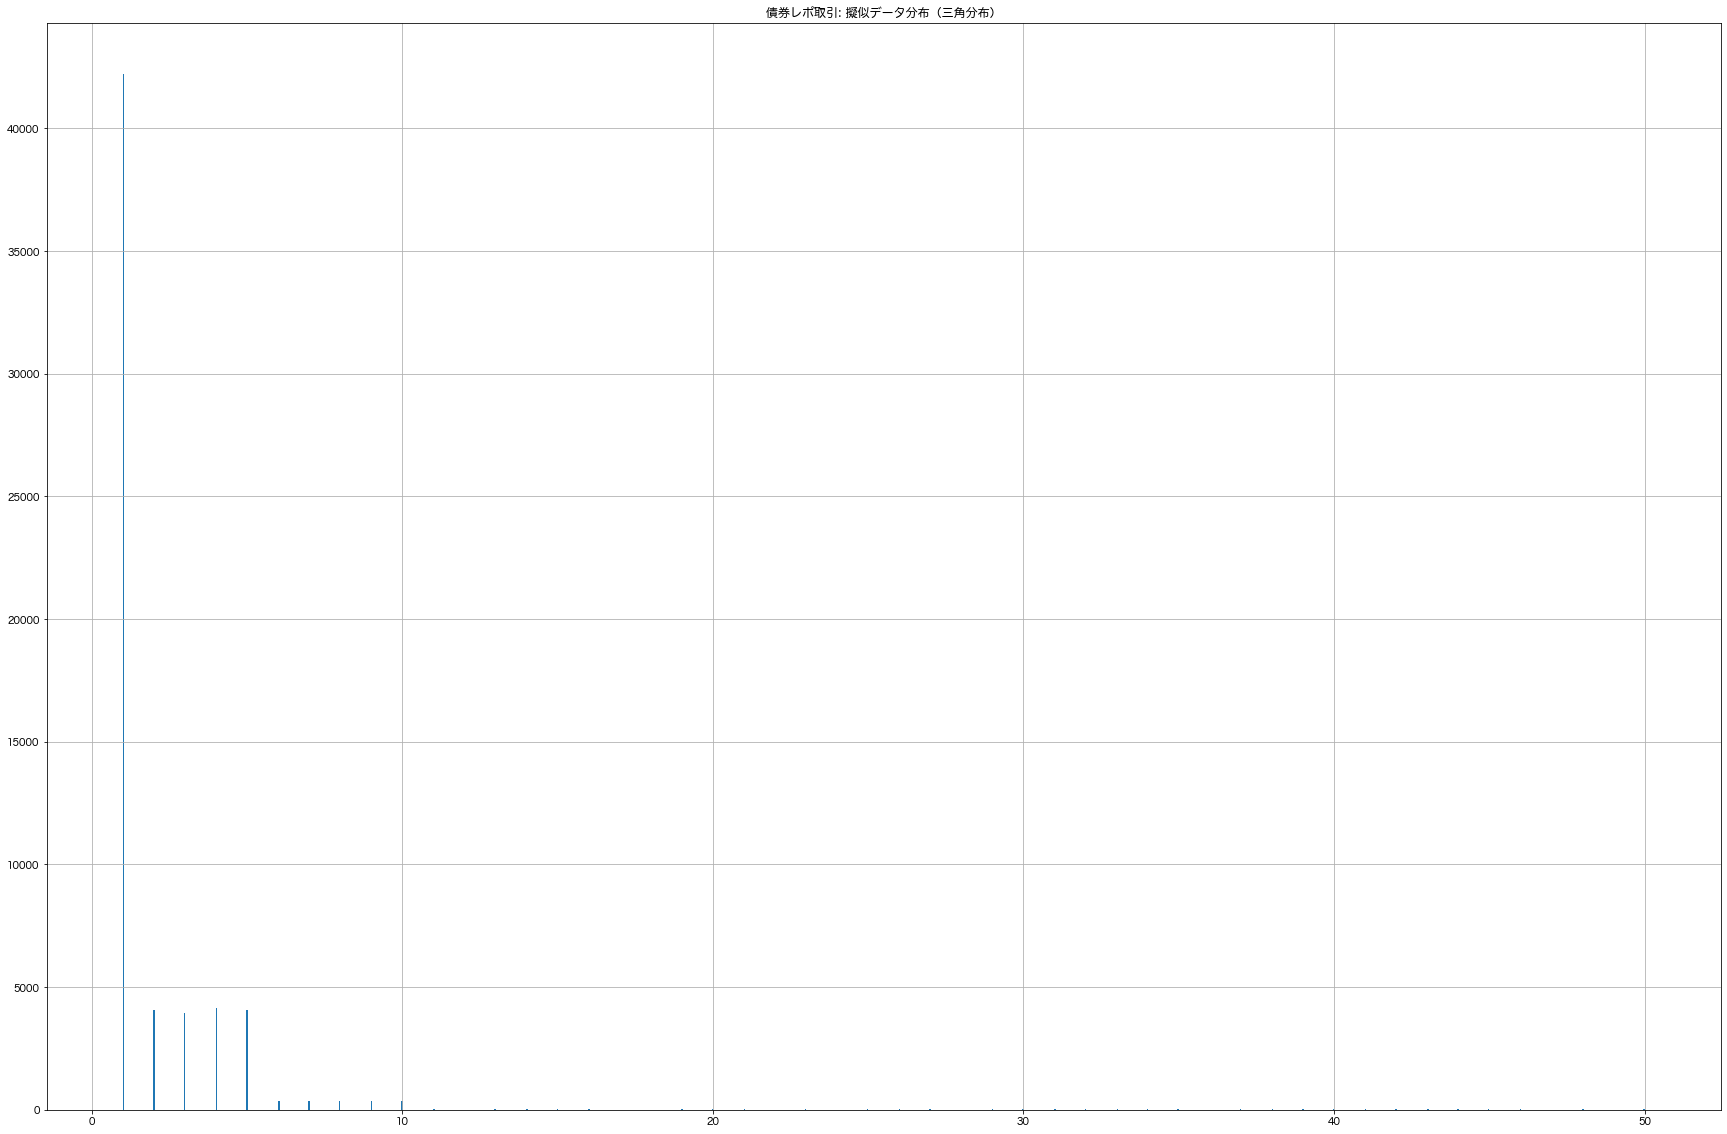

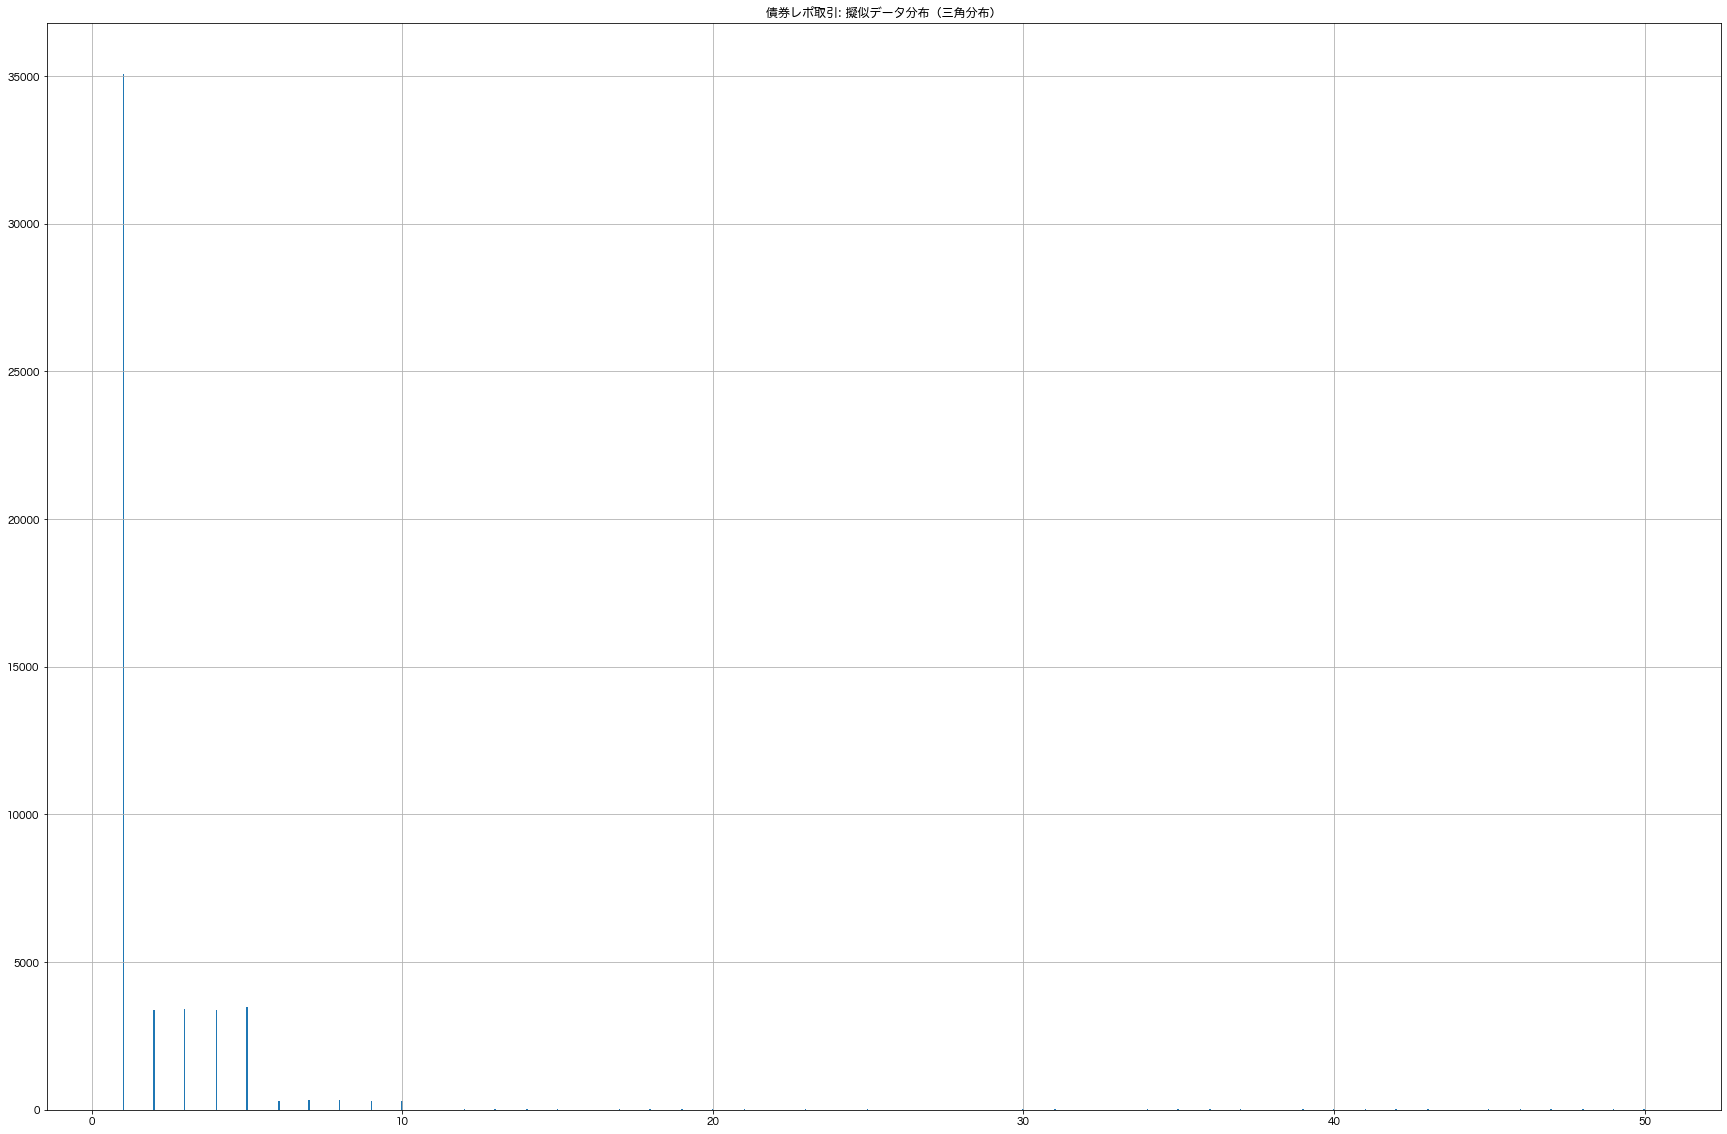

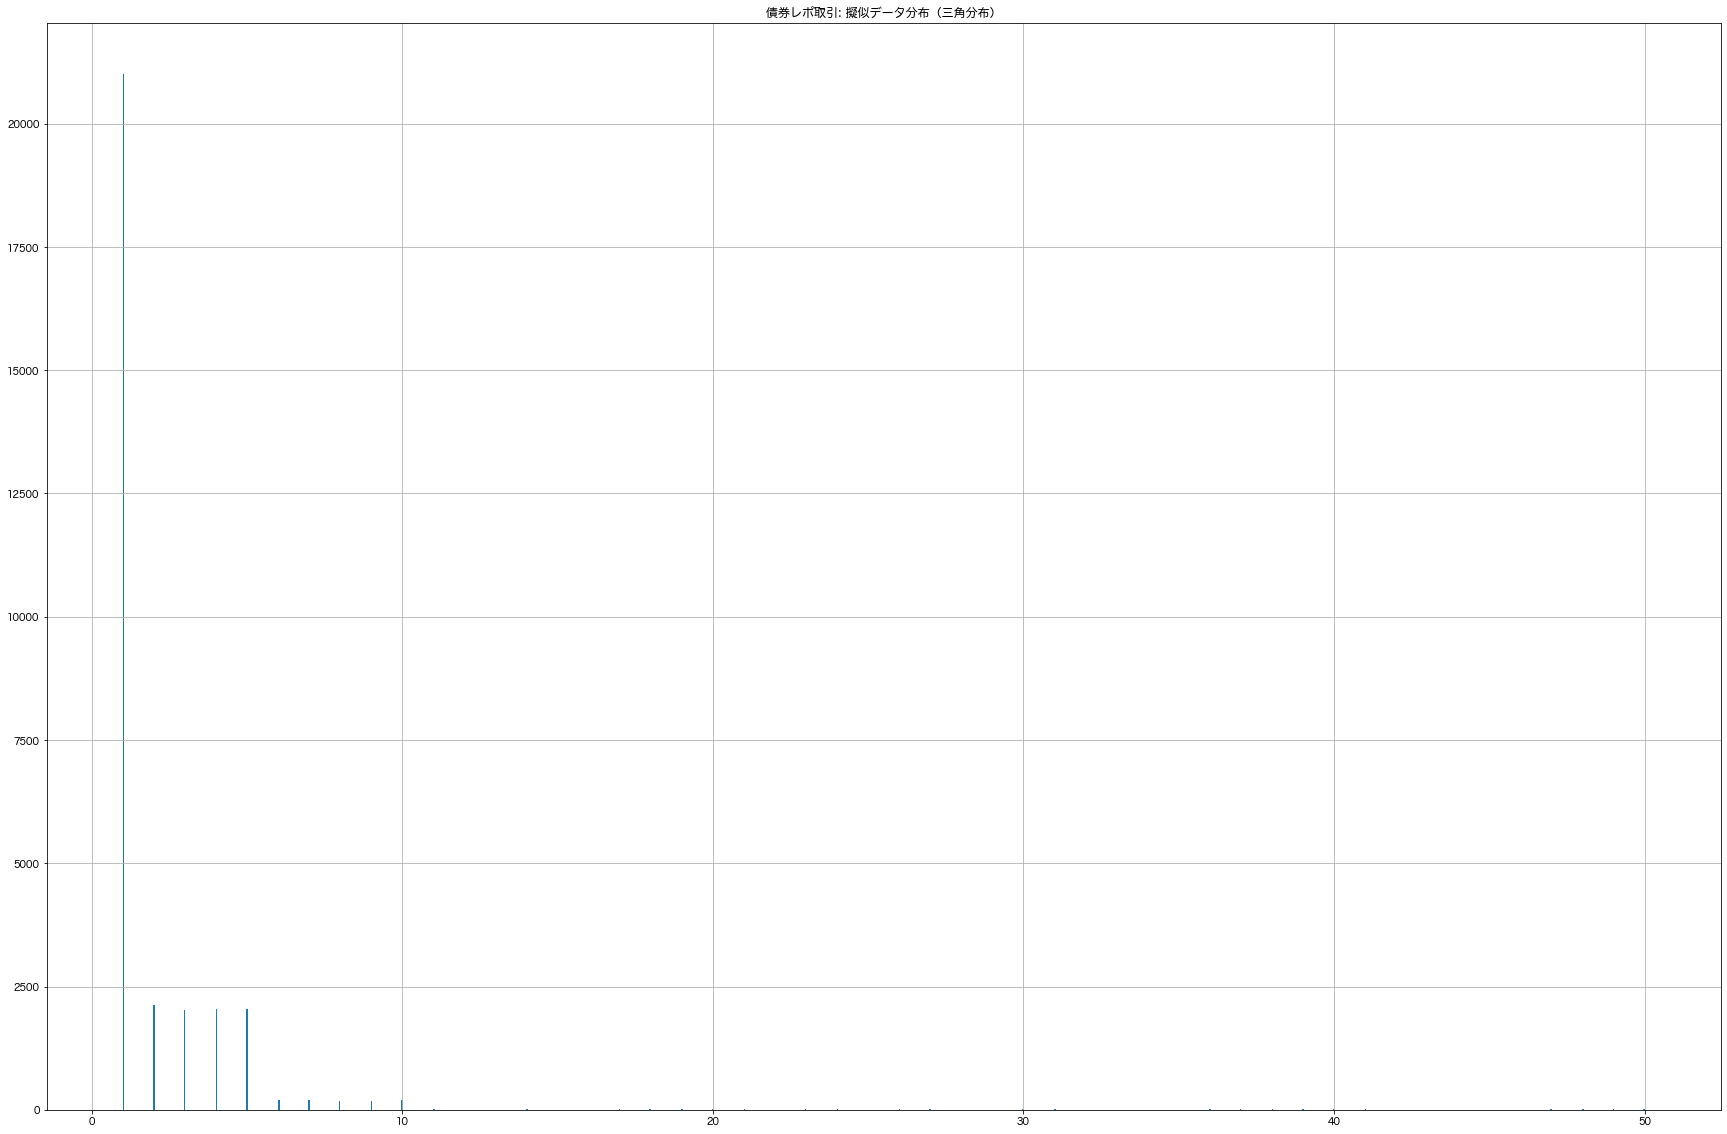

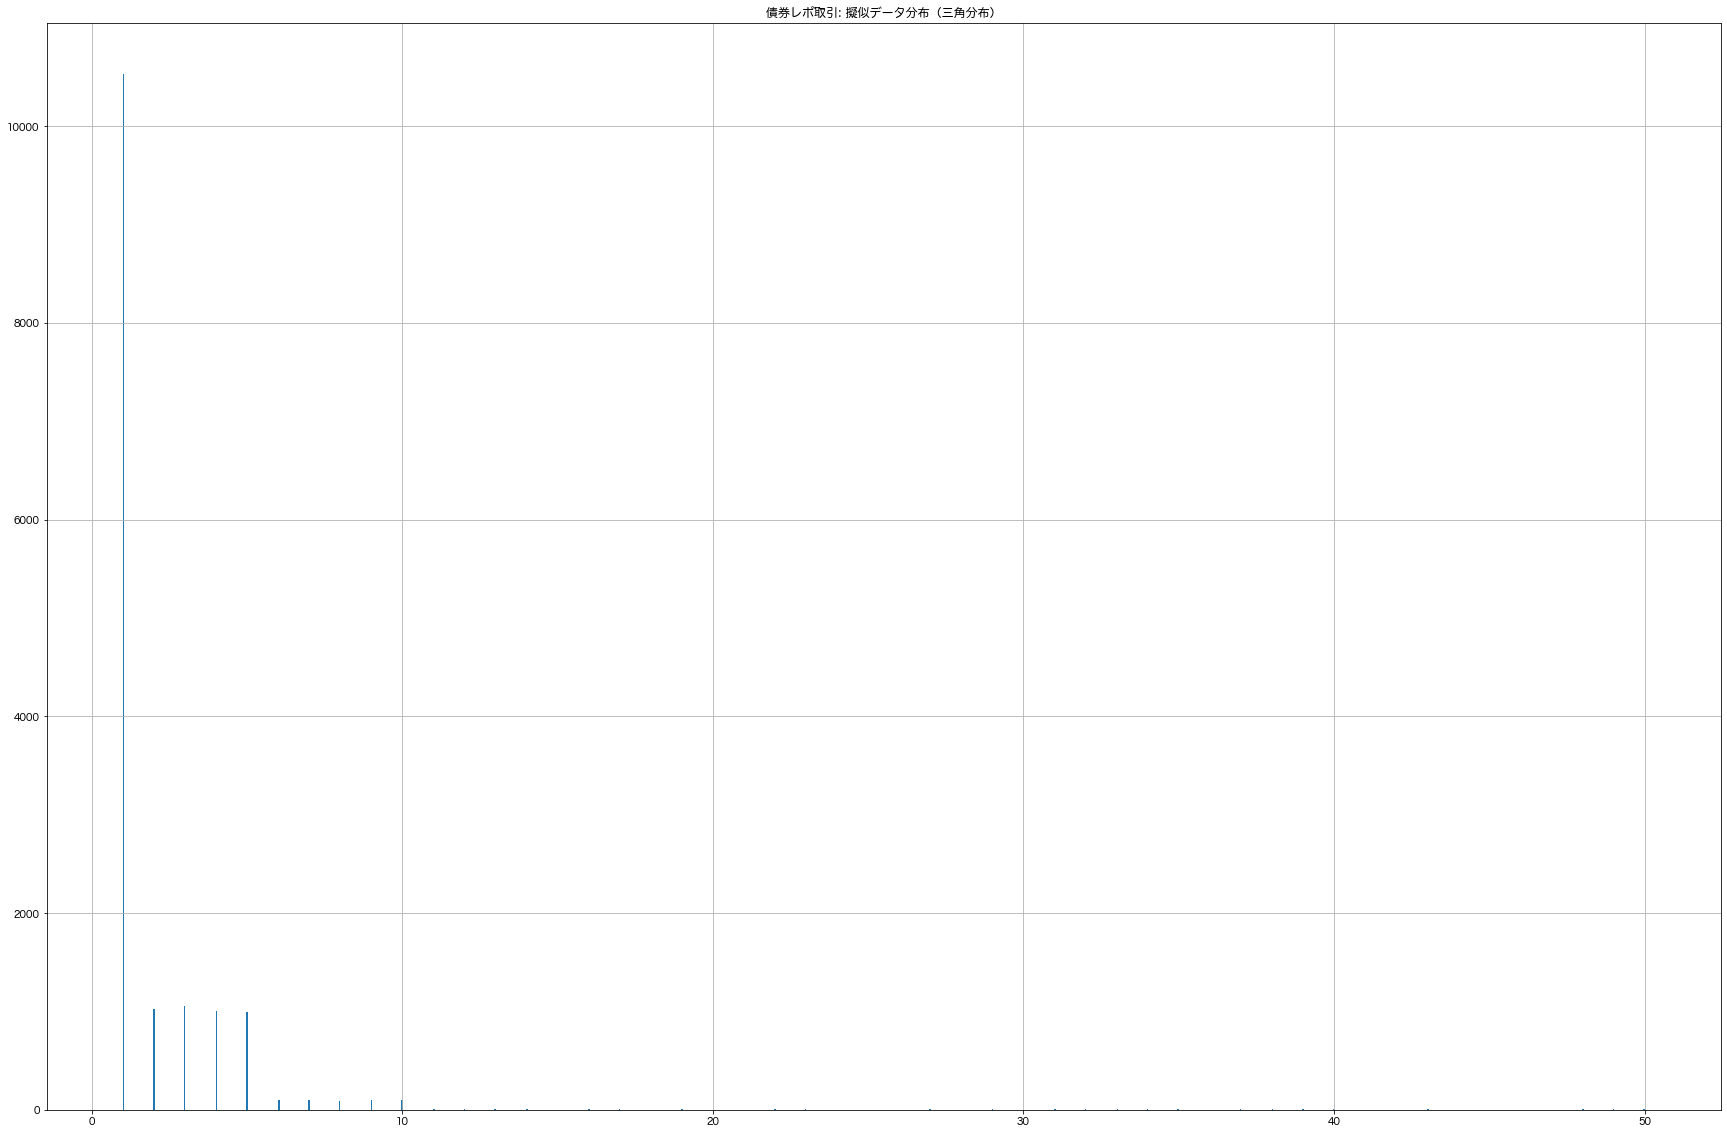

In [42]:
for _key, _value in b_trade_nums.items():
    _num = _value['bond']
    all_security_num_dfs[_key]['bond'] = get_bond_num_df(_num)
all_security_num_dfs

### 実験用CSV作成

#### 株レポ

##### createToken.csv

In [43]:
mock_gc_df = pd.DataFrame({'price': mock_gc_price_df[0], 'security_num': mock_gc_security_num_df[0]}, dtype=int)
mock_gc_df

NameError: name 'mock_gc_price_df' is not defined

In [44]:
stock_token_num = 2800
bond_token_num = 356

print(eval(sample_create_token_df['tokenId'][0]))
hex(eval(sample_create_token_df['tokenId'][1]))

14534201717928672332366944080943963275581073313804200410876330409119688163329


'0x2022111013215200000000000000000000000000000000000000000000000002'

In [45]:
participant_num = 20
participant_list = [chr(x + 65) for x in range(participant_num)]

In [46]:
# tokenId
initial_stock_tokenId = 0x2023010917021000000000000000000000000000000000000000000000000001
stock_tokenId_list = [str(hex(initial_stock_tokenId + i)) for i in range(stock_token_num)]

initial_bond_tokenId = 0x2023010917031000000000000000000000000000000000000000000000000001
bond_tokenId_list = [str(hex(initial_bond_tokenId + i)) for i in range(bond_token_num)]

In [47]:
# tokenName
stock_tokenName_list = [f'ST0{str(i).zfill(4)}' for i in range(stock_token_num)]
bond_tokenName_list = [f'ST1{str(i).zfill(4)}' for i in range(bond_token_num)]

In [48]:
# others
tokenTypeId = sample_create_token_df['tokenTypeId'][0]
stock_tokenTypeId_list = [tokenTypeId] * stock_token_num
bond_tokenTypeId_list = [tokenTypeId] * bond_token_num
updateTime = sample_create_token_df['updateTime'][0]
stock_updateTime_list = [updateTime] * stock_token_num
bond_updateTime_list = [updateTime] * bond_token_num
token_price = 5.0e+7
stock_price_list = [token_price] * stock_token_num
bond_price_list = [token_price] * bond_token_num

In [49]:
stock_create_token_df = pd.DataFrame([stock_tokenId_list, stock_tokenName_list, stock_price_list, stock_tokenTypeId_list, stock_updateTime_list], index=sample_create_token_df.columns).T
stock_create_token_df

,tokenId,tokenName,price,tokenTypeId,updateTime
0,0x20230109170210000000000000000000000000000000...,ST00000,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
1,0x20230109170210000000000000000000000000000000...,ST00001,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
2,0x20230109170210000000000000000000000000000000...,ST00002,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
3,0x20230109170210000000000000000000000000000000...,ST00003,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
4,0x20230109170210000000000000000000000000000000...,ST00004,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
...,...,...,...,...,...
2795,0x20230109170210000000000000000000000000000000...,ST02795,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
2796,0x20230109170210000000000000000000000000000000...,ST02796,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
2797,0x20230109170210000000000000000000000000000000...,ST02797,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
2798,0x20230109170210000000000000000000000000000000...,ST02798,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112


In [50]:
bond_create_token_df = pd.DataFrame([bond_tokenId_list, bond_tokenName_list, bond_price_list, bond_tokenTypeId_list, bond_updateTime_list], index=sample_create_token_df.columns).T
bond_create_token_df

,tokenId,tokenName,price,tokenTypeId,updateTime
0,0x20230109170310000000000000000000000000000000...,ST10000,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
1,0x20230109170310000000000000000000000000000000...,ST10001,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
2,0x20230109170310000000000000000000000000000000...,ST10002,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
3,0x20230109170310000000000000000000000000000000...,ST10003,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
4,0x20230109170310000000000000000000000000000000...,ST10004,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
...,...,...,...,...,...
351,0x20230109170310000000000000000000000000000000...,ST10351,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
352,0x20230109170310000000000000000000000000000000...,ST10352,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
353,0x20230109170310000000000000000000000000000000...,ST10353,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
354,0x20230109170310000000000000000000000000000000...,ST10354,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112


In [51]:
# JCTの行も追加する
# jct_row = pd.DataFrame({'tokenId': jct_tokenId, 'tokenName': 'JCT00000', 'price': jct_price, 'tokenTypeId': sample_create_token_df['tokenTypeId'][0], 'updateTime': sample_create_token_df['updateTime'][0]}, index=[0])

# total_create_token_df = pd.concat([jct_row, stock_create_token_df, bond_create_token_df], ignore_index=True).reset_index(drop=True)
total_create_token_df = pd.concat([stock_create_token_df, bond_create_token_df], ignore_index=True)
total_create_token_df

,tokenId,tokenName,price,tokenTypeId,updateTime
0,0x20230109170210000000000000000000000000000000...,ST00000,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
1,0x20230109170210000000000000000000000000000000...,ST00001,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
2,0x20230109170210000000000000000000000000000000...,ST00002,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
3,0x20230109170210000000000000000000000000000000...,ST00003,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
4,0x20230109170210000000000000000000000000000000...,ST00004,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
...,...,...,...,...,...
3151,0x20230109170310000000000000000000000000000000...,ST10351,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
3152,0x20230109170310000000000000000000000000000000...,ST10352,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
3153,0x20230109170310000000000000000000000000000000...,ST10353,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
3154,0x20230109170310000000000000000000000000000000...,ST10354,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112


In [52]:
total_create_token_df.to_csv(f'{data_relative_path}total_create_token.csv', index=False)

##### createTrade.csv

In [53]:
a_trade_num

11938

In [54]:
# 1種類のトークンが最大取引数を取るように調整しつつ、取引ごとにランダムで銘柄をサンプリングする
def sample_with_freq_token(freq_num, token_list, token_num_list):
    if (freq_num > len(token_num_list)):
        raise ValueError('freq_num is larger than the number of trades!!')
    
    tokenIds_list = []
    freq_token_id = token_list[0]
    count = freq_num
    
    for _num in token_num_list:
        if count > 0:
            tokenIds_list.append([freq_token_id] + list(token_list[1:].sample(_num - 1)))
            count -= 1
        else:
            tokenIds_list.append(list(token_list[1:].sample(_num)))
    
    return tokenIds_list

# lenderTokenIds_list = sample_with_freq_token(b_security_nums['100%']['stock'], st_list, all_security_num_dfs['100%']['gc'][0])
# print(lenderTokenIds_list[:5])

In [55]:
def get_trade_df(trade_num, initial_tradingId,  price_df, security_num_df, create_token_df, with_freq=False, freq_num=0):
    # tradingId
    tradingId_list = [str(hex(initial_tradingId + i)) for i in range(trade_num)]

    # lenderTokenIds, lenderTokenAmounts
    st_list = create_token_df['tokenId']
    lenderTokenIds_list = sample_with_freq_token(freq_num, st_list, security_num_df[0]) if with_freq else [list(st_list[1:].sample(security_num)) for security_num in security_num_df[0]]
    lenderTokenAmounts_list = []
    lender_token_total_price_list = []
    for i in range(trade_num):
        each_num = int(math.ceil((price_df[0][i] / token_price ) / security_num_df[0][i]))
        lenderTokenAmounts_list.append([each_num] * security_num_df[0][i])
        lender_token_total_price_list.append(each_num * security_num_df[0][i] * token_price)

    # borrowerTokenAmounts
    borrowerTokenAmounts_list = [[math.ceil(lender_total_price / jct_price)] for lender_total_price in lender_token_total_price_list]
    
    # others
#     lender_list, borrower_list = get_random_participants(trade_num, participant_num)
    lender_list = [sample_create_trading_df['lender'][0]] * trade_num # dummy 
    borrowerTokenIds_list = [sample_create_trading_df['borrowerTokenIds'][0]] * trade_num
    startTime_list = [sample_create_trading_df['startTime'][0]] * trade_num
    finishTime_list = [sample_create_trading_df['finishTime'][0]] * trade_num
    rate_list = [sample_create_trading_df['rate'][0]] * trade_num
    adjustmentToken_list = [sample_create_trading_df['adjustmentToken'][0]] * trade_num
    return pd.DataFrame([tradingId_list, lender_list, borrowerTokenIds_list, lenderTokenIds_list, borrowerTokenAmounts_list, lenderTokenAmounts_list, startTime_list, finishTime_list, rate_list, adjustmentToken_list], index=sample_create_trading_df.columns).T

In [56]:
# 多者間での取引を再現するためにborrower、lenderのリストをランダムに生成
def get_random_participants(trade_num, participant_num):
    _participant_list = [chr(x + 65) for x in range(participant_num)]
    _trade_participant_list = [random.sample(_participant_list, 2) for i in range(trade_num)]
    _user_ids = {}
    default_id = '0x0000000000000000000000000000000000000000000000000000000000000000'
    for i, _participant in enumerate(_participant_list):
        index_str = str(i + 1)
        index_str_len = len(index_str)
        _user_ids[_participant] = default_id[:-index_str_len] + index_str
    return _trade_participant_list, _participant_list, _user_ids

In [57]:
# lenderIdについては0x0000000000000000000000000000000000000000000000000000000000000001~0x00000000000000000000000000000000000000000000000000000000000020
# に固定してしまうためベタ打ちで
'0x0000000000000000000000000000000000000000000000000000000000000001' + '1'

'0x00000000000000000000000000000000000000000000000000000000000000011'

In [58]:
get_random_participants(20, 10)

([['D', 'I'],
  ['C', 'J'],
  ['B', 'A'],
  ['H', 'G'],
  ['A', 'C'],
  ['D', 'E'],
  ['C', 'I'],
  ['I', 'G'],
  ['H', 'I'],
  ['I', 'G'],
  ['G', 'H'],
  ['F', 'A'],
  ['I', 'H'],
  ['A', 'B'],
  ['B', 'E'],
  ['D', 'E'],
  ['F', 'C'],
  ['B', 'C'],
  ['G', 'H'],
  ['C', 'B']],
 ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
 {'A': '0x0000000000000000000000000000000000000000000000000000000000000001',
  'B': '0x0000000000000000000000000000000000000000000000000000000000000002',
  'C': '0x0000000000000000000000000000000000000000000000000000000000000003',
  'D': '0x0000000000000000000000000000000000000000000000000000000000000004',
  'E': '0x0000000000000000000000000000000000000000000000000000000000000005',
  'F': '0x0000000000000000000000000000000000000000000000000000000000000006',
  'G': '0x0000000000000000000000000000000000000000000000000000000000000007',
  'H': '0x0000000000000000000000000000000000000000000000000000000000000008',
  'I': '0x0000000000000000000000000000000000000000

In [59]:
ex_01 = get_trade_df(b_trade_nums['100%']['gc'], 0x2023010917115000000000000000000000000000000000000000000000000001, all_price_dfs['100%']['gc'], all_security_num_dfs['100%']['gc'], stock_create_token_df, True, 1700)
ex_01

,tradingId,lender,borrowerTokenIds,lenderTokenIds,borrowerTokenAmounts,lenderTokenAmounts,startTime,finishTime,rate,adjustmentToken
0,0x20230109171150000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917021000000000000000000000000000000...,[85802795000],"[6600215, 6600215, 6600215, 6600215, 6600215, ...",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
1,0x20230109171150000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917021000000000000000000000000000000...,[27533313000],"[3059257, 3059257, 3059257, 3059257, 3059257, ...",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
2,0x20230109171150000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917021000000000000000000000000000000...,[16673920000],"[521060, 521060, 521060, 521060, 521060, 52106...",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
3,0x20230109171150000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917021000000000000000000000000000000...,[14680872000],"[1223406, 1223406, 1223406, 1223406, 1223406, ...",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
4,0x20230109171150000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917021000000000000000000000000000000...,[67514860000],"[1928996, 1928996, 1928996, 1928996, 1928996, ...",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
...,...,...,...,...,...,...,...,...,...,...
6193,0x20230109171150000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917021000000000000000000000000000000...,[15256321000],"[412333, 412333, 412333, 412333, 412333, 41233...",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
6194,0x20230109171150000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917021000000000000000000000000000000...,[56948496000],"[1725712, 1725712, 1725712, 1725712, 1725712, ...",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
6195,0x20230109171150000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917021000000000000000000000000000000...,[8403024000],"[200072, 200072, 200072, 200072, 200072, 20007...",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
6196,0x20230109171150000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917021000000000000000000000000000000...,[29845162000],"[403313, 403313, 403313, 403313, 403313, 40331...",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...


In [60]:
# trade_num毎に各種create_trade_dfを作成し結合、csv形式で出力
initial_tradingIds = {
    'gc': 0x2023010918240000000000000000000000000000000000000000000000000001,
    'sc': 0x2023010918241000000000000000000000000000000000000000000000000001,
    'bond': 0x2023010918242000000000000000000000000000000000000000000000000001,
}

results = {}
    
for _percent, _obj in b_trade_nums.items():
    print(f'{_percent} starts:')
    pprint(_obj)
    file_name = f'{data_relative_path}create_trade_{_percent}.csv'
    create_trade_df_list = []
    for _type, _num in _obj.items():
        _initial_tradingId = initial_tradingIds[_type]
        _create_token_df = stock_create_token_df if _type in ['gc', 'sc'] else bond_create_token_df
        _security_category = 'stock' if _type in ['gc', 'sc'] else 'bond'
        _with_freq = _type in ['gc', 'bond']
        %time _create_trade_df = get_trade_df(_num, _initial_tradingId, all_price_dfs[_percent][_type], all_security_num_dfs[_percent][_type], _create_token_df, _with_freq, b_security_nums[_percent][_security_category])
        _create_trade_df['lock'] = [2] * _num
        _create_trade_df['margincallThreshold'] = [0] * _num
        _create_trade_df['adjustmentTokenTypeId'] = ['0x3078303030303100000000000000000000000000000000000000000000000000'] * _num
        _create_trade_df.drop('adjustmentToken', axis=1, inplace=True)
        
        create_trade_df_list.append(_create_trade_df)
    all_create_trades_df = pd.concat(create_trade_df_list, ignore_index=True)
    results[_percent] = all_create_trades_df
    all_create_trades_df.to_csv(file_name, index=False)
    print(f'{_percent} finished!')

100% starts:
{'bond': 203068, 'gc': 6198, 'sc': 40087}
CPU times: user 628 ms, sys: 4.69 ms, total: 633 ms
Wall time: 630 ms
CPU times: user 3.95 s, sys: 11.7 ms, total: 3.96 s
Wall time: 3.99 s
CPU times: user 13.3 s, sys: 83.8 ms, total: 13.4 s
Wall time: 13.4 s
100% finished!
150% starts:
{'bond': 304602, 'gc': 9297, 'sc': 60131}
CPU times: user 935 ms, sys: 5.29 ms, total: 940 ms
Wall time: 939 ms
CPU times: user 5.87 s, sys: 33.5 ms, total: 5.91 s
Wall time: 5.93 s
CPU times: user 19.9 s, sys: 155 ms, total: 20.1 s
Wall time: 20.1 s
150% finished!
50% starts:
{'bond': 101534, 'gc': 3099, 'sc': 20044}
CPU times: user 316 ms, sys: 3.5 ms, total: 320 ms
Wall time: 319 ms
CPU times: user 1.95 s, sys: 12.1 ms, total: 1.96 s
Wall time: 1.97 s
CPU times: user 6.67 s, sys: 58.2 ms, total: 6.73 s
Wall time: 6.72 s
50% finished!
30% starts:
{'bond': 60921, 'gc': 1860, 'sc': 12027}
CPU times: user 187 ms, sys: 1.08 ms, total: 188 ms
Wall time: 188 ms
CPU times: user 1.16 s, sys: 4.81 ms, tot

In [61]:
results['100%']

,tradingId,lender,borrowerTokenIds,lenderTokenIds,borrowerTokenAmounts,lenderTokenAmounts,startTime,finishTime,rate,lock,margincallThreshold,adjustmentTokenTypeId
0,0x20230109182400000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917021000000000000000000000000000000...,[85802795000],"[6600215, 6600215, 6600215, 6600215, 6600215, ...",1668054340,1668057940,100,2,0,0x30783030303031000000000000000000000000000000...
1,0x20230109182400000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917021000000000000000000000000000000...,[27533313000],"[3059257, 3059257, 3059257, 3059257, 3059257, ...",1668054340,1668057940,100,2,0,0x30783030303031000000000000000000000000000000...
2,0x20230109182400000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917021000000000000000000000000000000...,[16673920000],"[521060, 521060, 521060, 521060, 521060, 52106...",1668054340,1668057940,100,2,0,0x30783030303031000000000000000000000000000000...
3,0x20230109182400000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917021000000000000000000000000000000...,[14680872000],"[1223406, 1223406, 1223406, 1223406, 1223406, ...",1668054340,1668057940,100,2,0,0x30783030303031000000000000000000000000000000...
4,0x20230109182400000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917021000000000000000000000000000000...,[67514860000],"[1928996, 1928996, 1928996, 1928996, 1928996, ...",1668054340,1668057940,100,2,0,0x30783030303031000000000000000000000000000000...
...,...,...,...,...,...,...,...,...,...,...,...,...
249348,0x20230109182420000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917031000000000000000000000000000000...,[209858055000],[419716110],1668054340,1668057940,100,2,0,0x30783030303031000000000000000000000000000000...
249349,0x20230109182420000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917031000000000000000000000000000000...,[51132979500],"[34088653, 34088653, 34088653]",1668054340,1668057940,100,2,0,0x30783030303031000000000000000000000000000000...
249350,0x20230109182420000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917031000000000000000000000000000000...,[132876646500],[265753293],1668054340,1668057940,100,2,0,0x30783030303031000000000000000000000000000000...
249351,0x20230109182420000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917031000000000000000000000000000000...,[157646249000],[315292498],1668054340,1668057940,100,2,0,0x30783030303031000000000000000000000000000000...


In [62]:
all_create_token_df = pd.read_csv('../data/sample/csv/createToken_decode.csv')
all_create_token_df

,tokenId,tokenName,price,tokenTypeId,updateTime
0,0x20221110132152000000000000000000000000000000...,ST00001,10000000,0x30783030303031000000000000000000000000000000...,1668054112
1,0x20221110132152000000000000000000000000000000...,ST00002,10000000,0x30783030303031000000000000000000000000000000...,1668054112
2,0x20221110132152000000000000000000000000000000...,ST00003,10000000,0x30783030303031000000000000000000000000000000...,1668054112
3,0x20221110132152000000000000000000000000000000...,ST00004,10000000,0x30783030303031000000000000000000000000000000...,1668054112
4,0x20221110132152000000000000000000000000000000...,ST00005,10000000,0x30783030303031000000000000000000000000000000...,1668054112
...,...,...,...,...,...
351,0x20221110132152000000000000000000000000000000...,ST00352,10000000,0x30783030303031000000000000000000000000000000...,1668054112
352,0x20221110132152000000000000000000000000000000...,ST00353,10000000,0x30783030303031000000000000000000000000000000...,1668054112
353,0x20221110132152000000000000000000000000000000...,ST00354,10000000,0x30783030303031000000000000000000000000000000...,1668054112
354,0x20221110132152000000000000000000000000000000...,ST00355,10000000,0x30783030303031000000000000000000000000000000...,1668054112


In [63]:
# 作成した取引数ごとのcreateTradingファイルを20者に分割していく
all_create_trade_results = {}
for _percent, _obj in b_trade_nums.items():
    print(f'{_percent} starts///')
    _file_name = f'{data_relative_path}create_trade_{_percent}.csv'
    _create_trade = pd.read_csv(_file_name)
    all_create_trade_results[file_name] = _create_trade
    _trade_num_all = sum(_obj.values())
    print(f'trade num: {_trade_num_all}')
    trade_participant_list, participant_list, user_ids = get_random_participants(_trade_num_all, participant_num)
    
    create_trade_df_list = []
    
    cur = 0
    for participant in participant_list:
        borrower = participant
        _trade_participant_list = list(filter(lambda x: x[0] == borrower, trade_participant_list))
        _trade_num = len(_trade_participant_list)
        _result_df = _create_trade.iloc[cur:cur+_trade_num, :]
#         pprint(_result_df['lender'])
        _result_df['lender'] = [user_ids[_participant[1]] for _participant in _trade_participant_list]
        _result_df = _result_df.reset_index(drop=True)
        _result_df.to_csv(f'{data_relative_path}{_percent}/create_trade_{borrower}.csv', index=False)
        create_trade_df_list.append(_result_df)
        cur += _trade_num

#         print(f'{_percent}_{borrower}:')
#         pprint(_result_df)
#         print('*'*50)
    
    create_trade_all_df = pd.concat(create_trade_df_list, ignore_index=True)
    print(f'total unique num: {create_trade_all_df["tradingId"].nunique()}')
    for participant in participant_list:
        lender = participant
        _df = create_trade_all_df.query(f'lender == "{user_ids[lender]}"')['tradingId']
        _df.to_csv(f'{data_relative_path}{_percent}/accept_trade_{lender}.csv', index=False)
        print(f'{_percent}_{lender}:')
        pprint(_df)


100% starts///
trade num: 249353


/var/folders/7c/jl9q60jd1558_fg0tfx8254r0000gn/T/ipykernel_58435/3240913921.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _result_df['lender'] = [user_ids[_participant[1]] for _participant in _trade_participant_list]


total unique num: 249353
100%_A:
12471     0x20230109182410000000000000000000000000000000...
12486     0x20230109182410000000000000000000000000000000...
12502     0x20230109182410000000000000000000000000000000...
12508     0x20230109182410000000000000000000000000000000...
12513     0x20230109182410000000000000000000000000000000...
                                ...                        
249234    0x20230109182420000000000000000000000000000000...
249245    0x20230109182420000000000000000000000000000000...
249261    0x20230109182420000000000000000000000000000000...
249304    0x20230109182420000000000000000000000000000000...
249309    0x20230109182420000000000000000000000000000000...
Name: tradingId, Length: 12401, dtype: object
100%_B:
18        0x20230109182400000000000000000000000000000000...
23        0x20230109182400000000000000000000000000000000...
26        0x20230109182400000000000000000000000000000000...
46        0x20230109182400000000000000000000000000000000...
108       0x2

100%_S:
2         0x20230109182400000000000000000000000000000000...
12        0x20230109182400000000000000000000000000000000...
24        0x20230109182400000000000000000000000000000000...
27        0x20230109182400000000000000000000000000000000...
51        0x20230109182400000000000000000000000000000000...
                                ...                        
249171    0x20230109182420000000000000000000000000000000...
249173    0x20230109182420000000000000000000000000000000...
249190    0x20230109182420000000000000000000000000000000...
249193    0x20230109182420000000000000000000000000000000...
249251    0x20230109182420000000000000000000000000000000...
Name: tradingId, Length: 12492, dtype: object
100%_T:
9         0x20230109182400000000000000000000000000000000...
42        0x20230109182400000000000000000000000000000000...
56        0x20230109182400000000000000000000000000000000...
67        0x20230109182400000000000000000000000000000000...
75        0x20230109182400000000000000

/var/folders/7c/jl9q60jd1558_fg0tfx8254r0000gn/T/ipykernel_58435/3240913921.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _result_df['lender'] = [user_ids[_participant[1]] for _participant in _trade_participant_list]


total unique num: 374030
150%_A:
18765     0x20230109182410000000000000000000000000000000...
18770     0x20230109182410000000000000000000000000000000...
18775     0x20230109182410000000000000000000000000000000...
18781     0x20230109182410000000000000000000000000000000...
18842     0x20230109182410000000000000000000000000000000...
                                ...                        
373952    0x20230109182420000000000000000000000000000000...
373959    0x20230109182420000000000000000000000000000000...
373990    0x20230109182420000000000000000000000000000000...
374001    0x20230109182420000000000000000000000000000000...
374013    0x20230109182420000000000000000000000000000000...
Name: tradingId, Length: 18893, dtype: object
150%_B:
2         0x20230109182400000000000000000000000000000000...
13        0x20230109182400000000000000000000000000000000...
29        0x20230109182400000000000000000000000000000000...
45        0x20230109182400000000000000000000000000000000...
55        0x2

150%_M:
77        0x20230109182400000000000000000000000000000000...
84        0x20230109182400000000000000000000000000000000...
120       0x20230109182400000000000000000000000000000000...
150       0x20230109182400000000000000000000000000000000...
182       0x20230109182400000000000000000000000000000000...
                                ...                        
373840    0x20230109182420000000000000000000000000000000...
373869    0x20230109182420000000000000000000000000000000...
373891    0x20230109182420000000000000000000000000000000...
373962    0x20230109182420000000000000000000000000000000...
374020    0x20230109182420000000000000000000000000000000...
Name: tradingId, Length: 18943, dtype: object
150%_N:
21        0x20230109182400000000000000000000000000000000...
62        0x20230109182400000000000000000000000000000000...
86        0x20230109182400000000000000000000000000000000...
101       0x20230109182400000000000000000000000000000000...
111       0x20230109182400000000000000

/var/folders/7c/jl9q60jd1558_fg0tfx8254r0000gn/T/ipykernel_58435/3240913921.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _result_df['lender'] = [user_ids[_participant[1]] for _participant in _trade_participant_list]


total unique num: 124677
50%_A:
6310      0x20230109182410000000000000000000000000000000...
6317      0x20230109182410000000000000000000000000000000...
6343      0x20230109182410000000000000000000000000000000...
6361      0x20230109182410000000000000000000000000000000...
6397      0x20230109182410000000000000000000000000000000...
                                ...                        
124452    0x20230109182420000000000000000000000000000000...
124496    0x20230109182420000000000000000000000000000000...
124569    0x20230109182420000000000000000000000000000000...
124588    0x20230109182420000000000000000000000000000000...
124598    0x20230109182420000000000000000000000000000000...
Name: tradingId, Length: 6200, dtype: object
50%_B:
33        0x20230109182400000000000000000000000000000000...
65        0x20230109182400000000000000000000000000000000...
77        0x20230109182400000000000000000000000000000000...
90        0x20230109182400000000000000000000000000000000...
105       0x2023

50%_Q:
8         0x20230109182400000000000000000000000000000000...
15        0x20230109182400000000000000000000000000000000...
25        0x20230109182400000000000000000000000000000000...
58        0x20230109182400000000000000000000000000000000...
70        0x20230109182400000000000000000000000000000000...
                                ...                        
124577    0x20230109182420000000000000000000000000000000...
124605    0x20230109182420000000000000000000000000000000...
124611    0x20230109182420000000000000000000000000000000...
124621    0x20230109182420000000000000000000000000000000...
124628    0x20230109182420000000000000000000000000000000...
Name: tradingId, Length: 6246, dtype: object
50%_R:
1         0x20230109182400000000000000000000000000000000...
17        0x20230109182400000000000000000000000000000000...
23        0x20230109182400000000000000000000000000000000...
32        0x20230109182400000000000000000000000000000000...
76        0x20230109182400000000000000000

/var/folders/7c/jl9q60jd1558_fg0tfx8254r0000gn/T/ipykernel_58435/3240913921.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _result_df['lender'] = [user_ids[_participant[1]] for _participant in _trade_participant_list]


total unique num: 74808
30%_A:
3772     0x20230109182410000000000000000000000000000000...
3782     0x20230109182410000000000000000000000000000000...
3812     0x20230109182410000000000000000000000000000000...
3856     0x20230109182410000000000000000000000000000000...
3880     0x20230109182410000000000000000000000000000000...
                               ...                        
74716    0x20230109182420000000000000000000000000000000...
74720    0x20230109182420000000000000000000000000000000...
74723    0x20230109182420000000000000000000000000000000...
74748    0x20230109182420000000000000000000000000000000...
74764    0x20230109182420000000000000000000000000000000...
Name: tradingId, Length: 3766, dtype: object
30%_B:
19       0x20230109182400000000000000000000000000000000...
25       0x20230109182400000000000000000000000000000000...
48       0x20230109182400000000000000000000000000000000...
70       0x20230109182400000000000000000000000000000000...
74       0x202301091824000000000

trade num: 62339


/var/folders/7c/jl9q60jd1558_fg0tfx8254r0000gn/T/ipykernel_58435/3240913921.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _result_df['lender'] = [user_ids[_participant[1]] for _participant in _trade_participant_list]


total unique num: 62339
25%_A:
3066     0x20230109182410000000000000000000000000000000...
3068     0x20230109182410000000000000000000000000000000...
3080     0x20230109182410000000000000000000000000000000...
3100     0x20230109182410000000000000000000000000000000...
3121     0x20230109182410000000000000000000000000000000...
                               ...                        
62244    0x20230109182420000000000000000000000000000000...
62250    0x20230109182420000000000000000000000000000000...
62261    0x20230109182420000000000000000000000000000000...
62306    0x20230109182420000000000000000000000000000000...
62326    0x20230109182420000000000000000000000000000000...
Name: tradingId, Length: 3102, dtype: object
25%_B:
14       0x20230109182400000000000000000000000000000000...
30       0x20230109182400000000000000000000000000000000...
37       0x20230109182400000000000000000000000000000000...
38       0x20230109182400000000000000000000000000000000...
40       0x202301091824000000000

trade num: 37403


/var/folders/7c/jl9q60jd1558_fg0tfx8254r0000gn/T/ipykernel_58435/3240913921.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _result_df['lender'] = [user_ids[_participant[1]] for _participant in _trade_participant_list]


total unique num: 37403
15%_A:
1802     0x20230109182410000000000000000000000000000000...
1805     0x20230109182410000000000000000000000000000000...
1813     0x20230109182410000000000000000000000000000000...
1846     0x20230109182410000000000000000000000000000000...
1850     0x20230109182410000000000000000000000000000000...
                               ...                        
37308    0x20230109182420000000000000000000000000000000...
37317    0x20230109182420000000000000000000000000000000...
37356    0x20230109182420000000000000000000000000000000...
37372    0x20230109182420000000000000000000000000000000...
37380    0x20230109182420000000000000000000000000000000...
Name: tradingId, Length: 1888, dtype: object
15%_B:
13       0x20230109182400000000000000000000000000000000...
22       0x20230109182400000000000000000000000000000000...
26       0x20230109182400000000000000000000000000000000...
27       0x20230109182400000000000000000000000000000000...
34       0x202301091824000000000

/var/folders/7c/jl9q60jd1558_fg0tfx8254r0000gn/T/ipykernel_58435/3240913921.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _result_df['lender'] = [user_ids[_participant[1]] for _participant in _trade_participant_list]


total unique num: 18703
7.5%_A:
911      0x20230109182410000000000000000000000000000000...
936      0x20230109182410000000000000000000000000000000...
983      0x20230109182410000000000000000000000000000000...
990      0x20230109182410000000000000000000000000000000...
993      0x20230109182410000000000000000000000000000000...
                               ...                        
18628    0x20230109182420000000000000000000000000000000...
18641    0x20230109182420000000000000000000000000000000...
18675    0x20230109182420000000000000000000000000000000...
18681    0x20230109182420000000000000000000000000000000...
18690    0x20230109182420000000000000000000000000000000...
Name: tradingId, Length: 978, dtype: object
7.5%_B:
1        0x20230109182400000000000000000000000000000000...
12       0x20230109182400000000000000000000000000000000...
33       0x20230109182400000000000000000000000000000000...
51       0x20230109182400000000000000000000000000000000...
72       0x20230109182400000000

In [64]:
b_trade_nums

{'100%': {'gc': 6198, 'sc': 40087, 'bond': 203068},
 '150%': {'gc': 9297, 'sc': 60131, 'bond': 304602},
 '50%': {'gc': 3099, 'sc': 20044, 'bond': 101534},
 '30%': {'gc': 1860, 'sc': 12027, 'bond': 60921},
 '25%': {'gc': 1550, 'sc': 10022, 'bond': 50767},
 '15%': {'gc': 928, 'sc': 6014, 'bond': 30461},
 '7.5%': {'gc': 465, 'sc': 3007, 'bond': 15231}}

In [65]:
ex3 = results['150%']['lenderTokenIds']
fl_list = []
for _list in ex3:
    fl_list.extend(_list)
print(pd.Series(fl_list).describe())
top = pd.Series(fl_list).describe()['top']
print('=======')
print('top: ', top)
fl_list = list(filter(lambda x: x != top, fl_list))
pd.Series(fl_list).describe()

count                                               1703795
unique                                                 3156
top       0x20230109170310000000000000000000000000000000...
freq                                                   7530
dtype: object
top:  0x2023010917031000000000000000000000000000000000000000000000000001


count                                               1696265
unique                                                 3155
top       0x20230109170210000000000000000000000000000000...
freq                                                   2637
dtype: object

In [66]:
results['7.5%'][:a_trade_num].to_csv(f'{data_relative_path}create_trade_A.csv', index=False)

In [67]:
results['7.5%'][:a_trade_num]

,tradingId,lender,borrowerTokenIds,lenderTokenIds,borrowerTokenAmounts,lenderTokenAmounts,startTime,finishTime,rate,lock,margincallThreshold,adjustmentTokenTypeId
0,0x20230109182400000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917021000000000000000000000000000000...,[38918880000],"[960960, 960960, 960960, 960960, 960960, 96096...",1668054340,1668057940,100,2,0,0x30783030303031000000000000000000000000000000...
1,0x20230109182400000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917021000000000000000000000000000000...,[21521923500],"[843997, 843997, 843997, 843997, 843997, 84399...",1668054340,1668057940,100,2,0,0x30783030303031000000000000000000000000000000...
2,0x20230109182400000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917021000000000000000000000000000000...,[44529175000],"[1436425, 1436425, 1436425, 1436425, 1436425, ...",1668054340,1668057940,100,2,0,0x30783030303031000000000000000000000000000000...
3,0x20230109182400000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917021000000000000000000000000000000...,[8648895000],"[182082, 182082, 182082, 182082, 182082, 18208...",1668054340,1668057940,100,2,0,0x30783030303031000000000000000000000000000000...
4,0x20230109182400000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917021000000000000000000000000000000...,[26118946000],"[442694, 442694, 442694, 442694, 442694, 44269...",1668054340,1668057940,100,2,0,0x30783030303031000000000000000000000000000000...
...,...,...,...,...,...,...,...,...,...,...,...,...
11933,0x20230109182420000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917031000000000000000000000000000000...,[138987700000],"[55595080, 55595080, 55595080, 55595080, 55595...",1668054340,1668057940,100,2,0,0x30783030303031000000000000000000000000000000...
11934,0x20230109182420000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917031000000000000000000000000000000...,[335848175500],[671696351],1668054340,1668057940,100,2,0,0x30783030303031000000000000000000000000000000...
11935,0x20230109182420000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917031000000000000000000000000000000...,[95433327000],[190866654],1668054340,1668057940,100,2,0,0x30783030303031000000000000000000000000000000...
11936,0x20230109182420000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917031000000000000000000000000000000...,[245043941000],[490087882],1668054340,1668057940,100,2,0,0x30783030303031000000000000000000000000000000...


##### updateToken

In [68]:
sample_update_token_df

,tokenId,price,updateTime
0,0x20221110132152000000000000000000000000000000...,9000000,1668054263
1,0x20221110132152000000000000000000000000000000...,9000000,1668054263
2,0x20221110132152000000000000000000000000000000...,9000000,1668054263
3,0x20221110132152000000000000000000000000000000...,9000000,1668054263
4,0x20221110132152000000000000000000000000000000...,9000000,1668054263
...,...,...,...
351,0x20221110132152000000000000000000000000000000...,9000000,1668054263
352,0x20221110132152000000000000000000000000000000...,9000000,1668054263
353,0x20221110132152000000000000000000000000000000...,9000000,1668054263
354,0x20221110132152000000000000000000000000000000...,9000000,1668054263


In [69]:
total_update_token_df = total_create_token_df.copy()
total_update_token_df = total_update_token_df.drop(labels=['tokenName', 'tokenTypeId'], axis=1)
total_update_token_df

,tokenId,price,updateTime
0,0x20230109170210000000000000000000000000000000...,50000000.0,1668054112
1,0x20230109170210000000000000000000000000000000...,50000000.0,1668054112
2,0x20230109170210000000000000000000000000000000...,50000000.0,1668054112
3,0x20230109170210000000000000000000000000000000...,50000000.0,1668054112
4,0x20230109170210000000000000000000000000000000...,50000000.0,1668054112
...,...,...,...
3151,0x20230109170310000000000000000000000000000000...,50000000.0,1668054112
3152,0x20230109170310000000000000000000000000000000...,50000000.0,1668054112
3153,0x20230109170310000000000000000000000000000000...,50000000.0,1668054112
3154,0x20230109170310000000000000000000000000000000...,50000000.0,1668054112


In [70]:
# 日々の価格変化率をランダムで割り当てる
min_daily_change = -0.12
max_daily_change = 0.15
price_change_list = []
for i in range(stock_token_num + bond_token_num):
    price_change_list.append(1 + min_daily_change + np.random.rand() * (max_daily_change - min_daily_change))
price_change_list

[0.9650877420107509,
 1.1488898680403257,
 1.0589005292367537,
 1.1184932173419342,
 1.0450314649707537,
 1.0563978492288806,
 1.0217056234728301,
 0.9583395546331125,
 0.9595858047204141,
 0.9472455119942595,
 0.9608140085377412,
 1.0590339092757002,
 1.0282983859216563,
 0.9110760303678204,
 0.9883344118153329,
 0.9586975231393343,
 1.1316334181804453,
 1.1272315660747705,
 0.9460825207090231,
 1.0057480460895878,
 1.0386030294824982,
 0.8859247954985248,
 1.0270080699689406,
 0.9807370919045731,
 0.9316044469343527,
 0.9400951817284366,
 1.1199452550711417,
 1.1294693486548686,
 0.9548138810599269,
 1.1488860372360032,
 0.9372721016260894,
 0.8990589174094086,
 0.9361469621239928,
 0.8820210238694286,
 1.0843876397236194,
 0.9202754543405338,
 1.0402470126181282,
 0.9060594979305387,
 0.9572016105601151,
 1.085842576078937,
 1.131881430217948,
 1.1238262548439555,
 1.045469492192441,
 0.9858157038139344,
 0.8922083123776131,
 0.8911647537237768,
 0.906779495967297,
 1.00164040636890

In [71]:
new_price_list = total_update_token_df['price'] * price_change_list
total_update_token_df['price'] = new_price_list.astype('int')

In [72]:
total_update_token_df

,tokenId,price,updateTime
0,0x20230109170210000000000000000000000000000000...,48254387,1668054112
1,0x20230109170210000000000000000000000000000000...,57444493,1668054112
2,0x20230109170210000000000000000000000000000000...,52945026,1668054112
3,0x20230109170210000000000000000000000000000000...,55924660,1668054112
4,0x20230109170210000000000000000000000000000000...,52251573,1668054112
...,...,...,...
3151,0x20230109170310000000000000000000000000000000...,45721192,1668054112
3152,0x20230109170310000000000000000000000000000000...,53160591,1668054112
3153,0x20230109170310000000000000000000000000000000...,52856996,1668054112
3154,0x20230109170310000000000000000000000000000000...,48171467,1668054112


In [73]:
total_update_token_df.to_csv(f'{data_relative_path}total_update_token.csv', index=False)

##### generateToken

In [74]:
# generate_token_df = pd.DataFrame(index=[], columns=['tokenId', 'userId'])
# _dict = {'tokenId': [10], 'userId': [20]}
# pd.concat([generate_token_df, pd.DataFrame(_dict)], ignore_index=True)

generate_token_dict = {'tokenId': [], 'userId': []}
for tokenId in list(total_create_token_df['tokenId']):
    for participant in participant_list:
        generate_token_dict['tokenId'].append(tokenId)
        generate_token_dict['userId'].append(user_ids[participant])

generate_token_df = pd.DataFrame(generate_token_dict)
generate_token_df['addAmount'] = [int(1e+15)] * len(generate_token_df)

In [75]:
generate_token_df.to_csv(f'{data_relative_path}total_generate_token.csv', index=False)

In [76]:
participant_list
user_ids

{'A': '0x0000000000000000000000000000000000000000000000000000000000000001',
 'B': '0x0000000000000000000000000000000000000000000000000000000000000002',
 'C': '0x0000000000000000000000000000000000000000000000000000000000000003',
 'D': '0x0000000000000000000000000000000000000000000000000000000000000004',
 'E': '0x0000000000000000000000000000000000000000000000000000000000000005',
 'F': '0x0000000000000000000000000000000000000000000000000000000000000006',
 'G': '0x0000000000000000000000000000000000000000000000000000000000000007',
 'H': '0x0000000000000000000000000000000000000000000000000000000000000008',
 'I': '0x0000000000000000000000000000000000000000000000000000000000000009',
 'J': '0x0000000000000000000000000000000000000000000000000000000000000010',
 'K': '0x0000000000000000000000000000000000000000000000000000000000000011',
 'L': '0x0000000000000000000000000000000000000000000000000000000000000012',
 'M': '0x0000000000000000000000000000000000000000000000000000000000000013',
 'N': '0x000

##### updateTrade

In [77]:
update_trade_df = pd.DataFrame(index=[], columns=['tradingId'])

for _percent, _obj in b_trade_nums.items():
    print(_percent)
    accept_trade_df_list = []
#     update_trade_df = pd.DataFrame(index=[], columns=['tradingId'])
    for _participant in participant_list:
        _accept_trade_df = pd.read_csv(f'{data_relative_path}{_percent}/accept_trade_{_participant}.csv')
        print(_accept_trade_df['tradingId'].nunique())
        accept_trade_df_list.append(_accept_trade_df)
    update_trade_df = pd.concat(accept_trade_df_list, ignore_index=True)
    update_trade_df.to_csv(f'{data_relative_path}{_percent}/update_trade.csv')
    print(len(update_trade_df['tradingId']))
    print(update_trade_df['tradingId'].nunique())
    pprint(update_trade_df)
    

100%
12401
12352
12472
12311
12754
12266
12355
12750
12445
12578
12412
12363
12342
12426
12447
12560
12704
12440
12492
12483
249353
249353
                                                tradingId
0       0x20230109182410000000000000000000000000000000...
1       0x20230109182410000000000000000000000000000000...
2       0x20230109182410000000000000000000000000000000...
3       0x20230109182410000000000000000000000000000000...
4       0x20230109182410000000000000000000000000000000...
...                                                   ...
249348  0x20230109182420000000000000000000000000000000...
249349  0x20230109182420000000000000000000000000000000...
249350  0x20230109182420000000000000000000000000000000...
249351  0x20230109182420000000000000000000000000000000...
249352  0x20230109182420000000000000000000000000000000...

[249353 rows x 1 columns]
150%
18893
18881
18565
18959
18822
18486
18591
18610
18714
18612
18610
18814
18943
18420
18611
18764
18693
18732
18809
18501
374030
374030

In [78]:
results['100%']['tradingId']

0         0x20230109182400000000000000000000000000000000...
1         0x20230109182400000000000000000000000000000000...
2         0x20230109182400000000000000000000000000000000...
3         0x20230109182400000000000000000000000000000000...
4         0x20230109182400000000000000000000000000000000...
                                ...                        
249348    0x20230109182420000000000000000000000000000000...
249349    0x20230109182420000000000000000000000000000000...
249350    0x20230109182420000000000000000000000000000000...
249351    0x20230109182420000000000000000000000000000000...
249352    0x20230109182420000000000000000000000000000000...
Name: tradingId, Length: 249353, dtype: object

## 相談事項

- ### 分布


- ### 銘柄種類


- ### 取引種類の統合


- ### price, update

## その他